# Intro to D4M Associative Arrays

Display Matlab D4M help pages.

In [ ]:
%% Add D4M to Path
addpath('/home/gridsan/tools/d4m_api/matlab_src')
DBinit

help D4M

## Create, Display, Save an Associative Array

Create lists of row, column, and values substrings. Note: the last character in the string is the divider. It can be any character. Common choices are ",", " ", tab, and newline.

In [3]:
row = 'a,a,a,a,a,a,a,aa,aaa,b,bb,bbb,a,aa,aaa,b,bb,bbb,';
column = 'a,aa,aaa,b,bb,bbb,a,a,a,a,a,a,a,aa,aaa,b,bb,bbb,';
values = 'a-a,a-aa,a-aaa,a-b,a-bb,a-bbb,a-a,aa-a,aaa-a,b-a,bb-a,bbb-a,a-a,aa-aa,aaa-aaa,b-b,bb-bb,bbb-bbb,';

Create an associtavie array, A, from row, column, and values.

In [4]:
A = Assoc(row,column,values);

Display the associative array in tabular form.

In [5]:
displayFull(  A  );

    a,    aa,   aaa,    b,  bb,   bbb,    
a,  a-a,  a-aa, a-aaa,  a-b,a-bb, a-bbb,  
aa, aa-a, aa-aa,                          
aaa,aaa-a,      aaa-aaa,                  
b,  b-a,                b-b,              
bb, bb-a,                   bb-bb,        
bbb,bbb-a,                        bbb-bbb,


Convert values to 0 and 1.

In [6]:
displayFull(  Abs0(A)  );

    a,aa,aaa,b,bb,bbb,
a,  1,1, 1,  1,1, 1,  
aa, 1,1,              
aaa,1,   1,           
b,  1,       1,       
bb, 1,         1,     
bbb,1,            1,  


Save associative array to a CSV file.

In [7]:
Assoc2CSV(A,char(10),',','data/A.csv');

## Read and Select Sub Associative Arrays

Read CSV file into an associative array.

In [7]:
A = ReadCSV('data/A.csv');

Select a subset of rows.

In [8]:
displayFull(  A('a,b,',:)  );

  a,  aa,  aaa,  b,  bb,  bbb,  
a,a-a,a-aa,a-aaa,a-b,a-bb,a-bbb,
b,b-a,           b-b,           


Convert values to 0 and 1.

In [ ]:
displayFull(  Abs0(A('a,b,',:))  );

Select a subset of columns.

In [ ]:
displayFull(  A(:,'a,b,')  );

Convert values to 0 and 1.

In [ ]:
displayFull(  Abs0(A(:,'a,b,'))  );

# Analyze Entities in News Articles

Load entities from 10,000 news articles and print the first few rows.

In [8]:
A = ReadCSV('data/entity.csv');

displayFull(  A(1:5,:)  );

      doc,                entity,     position,   type,    
1,    19960825_13108.txt, addis ababa,54;132;974;,LOCATION,
10,   19960821_6808.txt,  aden,       212;,       LOCATION,
100,  19960902_27945.txt, africa,     730;1176;,  LOCATION,
1000, 19961031_156588.txt,argentina,  1;12;419;,  LOCATION,
10000,19961017_122599.txt,greensboro, 41;,        LOCATION,


Show dimensions and number entries of A.

In [9]:
disp( [size(A),nnz(A)] );

       47089           4      188356


Plot transpose of the dense data.

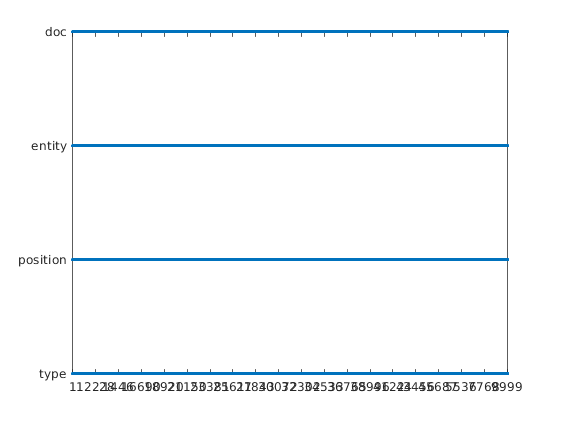

In [10]:
spy(  transpose(A)  )

## Construct and Display a Sparse Associative Array of the Data

Grab doc, entity, position, and type columns and combine type and entity with '|' seperator.

In [11]:
[row col doc]      = A(:,'doc,');              % Get doc column.
[row col entity]   = A(:,'entity,');           % Get entity column.
[row col position] = A(:,'position,');         % Get position column.
[row col type]     = A(:,'type,');             % Get type column.
typeEntity = CatStr(type,'|',entity);          % Interleave type and entity strings.

Create a sparse associative array of all the data and plot a few row.

In [12]:
E = Assoc(doc,typeEntity,position);

Display dimensions of data and number of non-zero entries of A.

In [13]:
disp( [size(E), nnz(E)]  );

        9974        3657       47089


Plot transpose of the sparse data.

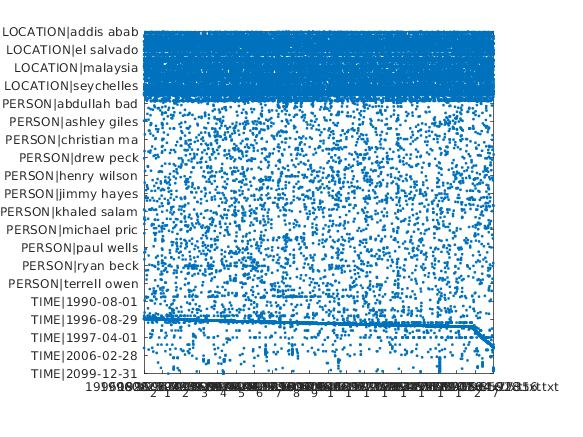

In [14]:
spy(  transpose(E)  );

## Analyze Relationships

Define relationships to examine.

In [15]:
p = 'PERSON|michael chang,';
P = StartsWith('PERSON|,');
L = StartsWith('LOCATION|,');

Show all people mentioned in news articles with "p".

In [16]:
pFriend = Col(E(Row(E(:,p)),P))

pFriend =
PERSON|alex obrien,PERSON|amy frazier,PERSON|ann hobbs,PERSON|byron black,PERSON|javier sanchez,PERSON|jonathan stark,PERSON|lindsay davenport,PERSON|mary joe fernandez,PERSON|michael chang,PERSON|michael joyce,PERSON|todd martin,PERSON|virginia wade,


Show the most common locations associated with the friends of "p".

In [21]:
sum(  E(:,pFriend).' * E(:,L)  ,1) > 15

(1,LOCATION|croatia,)     19
(1,LOCATION|germany,)     16
(1,LOCATION|spain,)     23
(1,LOCATION|united states,)     22


Do it all in 1 line of code.

In [22]:
sum(  E(:,Col(E(Row(E(:,p)),P))).' * E(:,L)  ,1) > 15

(1,LOCATION|croatia,)     19
(1,LOCATION|germany,)     16
(1,LOCATION|spain,)     23
(1,LOCATION|united states,)     22


Scale to multiple people at once.

In [ ]:
p = 'PERSON|michael chang,PERSON|don king,PERSON|james joyce,';
sum(  E(:,Col(E(Row(E(:,p)),P))).' * E(:,L)  ,1) > 15

# Analyze DNA Data

Read in bacteria reference DNA and palm sample DNA data into an associative arrays.

In [23]:
DNAwordsize = 10;
Eref = SplitSequenceCSV('data/bacteria.csv',DNAwordsize);
Esamp = SplitSequenceCSV('data/palm.csv',DNAwordsize);

In [25]:
Eref

(AB000699.1_1-1501,,aaaaaattca,)     1
(AB000701.1_1-1501,,aaaaacctta,)     1
(AB000702.1_1-1501,,aaaaacctta,)     1
(AB001521.1_1-1560,,aaaaacctta,)     1
(AB002661.1_1-1440,,aaaaagaact,)     1
(AB000701.1_1-1501,,aaaaagcacc,)     1
(AB000702.1_1-1501,,aaaaagcacc,)     1
(AB002655.1_1-1462,,aaaaagccga,)     1
(AB002653.1_1-1372,,aaaaagccgt,)     1
(AB002649.1_1-1433,,aaaaagctgg,)     1
(AB002650.1_1-1433,,aaaaagctgg,)     1
(AB003380.1_1-2573,,aaaaatgatc,)     1
(AB000700.1_1-1501,,aaaaattatg,)     1
(AB000699.1_1-1501,,aaaaattctg,)     1
(AB001520.1_1-1428,,aaaaattttt,)     1
(AB003379.1_1-1455,,aaaacaggtg,)     1
(AB002483.1_1-1499,,aaaacccatt,)     1
(AB002517.1_1-1500,,aaaacccatt,)     1
(AB000106.1_1-1343,,aaaactcaaa,)     1
(AB001439.1_1-1538,,aaaactcaaa,)     1
(AB001440.1_1-1538,,aaaactcaaa,)     1
(AB001441.1_1-1538,,aaaactcaaa,)     1
(AB001442.1_1-1538,,aaaactcaaa,)     1
(AB001443.1_1-1538,,aaaactcaaa,)     1
(AB001444.1_1-1538,,aaaactcaaa,)     1
(AB001445.1_1-1538,,aaaac

(AB001801.1_1-1507,,aaagcacttt,)     1
(AB001802.1_1-1507,,aaagcacttt,)     1
(AB001803.1_1-1507,,aaagcacttt,)     1
(AB001804.1_1-1507,,aaagcacttt,)     1
(AB001805.1_1-1507,,aaagcacttt,)     1
(AB001806.1_1-1507,,aaagcacttt,)     1
(AB001807.1_1-1507,,aaagcacttt,)     1
(AB001808.1_1-1507,,aaagcacttt,)     1
(AB001809.1_1-1507,,aaagcacttt,)     1
(AB001810.1_1-1507,,aaagcacttt,)     1
(AB001811.1_1-1507,,aaagcacttt,)     1
(AB001812.1_1-1507,,aaagcacttt,)     1
(AB001813.1_1-1507,,aaagcacttt,)     1
(AB001814.1_1-1507,,aaagcacttt,)     1
(AB001815.1_1-1507,,aaagcacttt,)     1
(AB001816.1_1-1507,,aaagcacttt,)     1
(AB002656.1_1-1461,,aaagcacttt,)     1
(AB002658.1_1-1461,,aaagcacttt,)     1
(AB000701.1_1-1501,,aaagcagggg,)     1
(AB000702.1_1-1501,,aaagcagggg,)     1
(AB001836.2_1-1510,,aaagcatggg,)     1
(AB001837.2_1-1510,,aaagcatggg,)     1
(AB002636.1_1-1436,,aaagcatggg,)     1
(AB002479.1_1-1450,,aaagccaatc,)     1
(AB002516.1_1-1450,,aaagccaatc,)     1
(AB001724.1_1-1449,,aaagc

(AB000278.1_1-1410,,aacaggatta,)     1
(AB000391.1_1-1471,,aacaggatta,)     1
(AB001774.1_1-1508,,aacaggatta,)     1
(AB001775.1_1-1508,,aacaggatta,)     1
(AB001776.1_1-1508,,aacaggatta,)     1
(AB001777.1_1-1508,,aacaggatta,)     1
(AB002518.1_1-1416,,aacaggatta,)     1
(AB002522.1_1-1416,,aacaggatta,)     1
(AB002523.1_1-1496,,aacaggatta,)     1
(AB002525.1_1-1457,,aacaggatta,)     1
(AB000479.1_1-1326,,aacataccct,)     1
(AB000480.1_1-1326,,aacataccct,)     1
(AB001520.1_1-1428,,aacatctata,)     1
(AB002658.1_1-1461,,aacattccga,)     1
(AB003380.1_1-2573,,aacattcctg,)     1
(AB002485.1_1-1506,,aaccactgta,)     1
(AB002485.1_1-1506,,aaccagaaag,)     1
(AB002486.1_1-1507,,aaccagaaag,)     1
(AB002487.1_1-1507,,aaccagaaag,)     1
(AB002488.1_1-1507,,aaccagaaag,)     1
(AB002489.1_1-1507,,aaccagaaag,)     1
(AB002490.1_1-1507,,aaccagaaag,)     1
(AB002491.1_1-1507,,aaccagaaag,)     1
(AB002492.1_1-1507,,aaccagaaag,)     1
(AB002493.1_1-1507,,aaccagaaag,)     1
(AB002494.1_1-1507,,aacca

(AB001777.1_1-1508,,aacgagcgca,)     1
(AB002485.1_1-1506,,aacgagcgca,)     1
(AB002486.1_1-1507,,aacgagcgca,)     1
(AB002487.1_1-1507,,aacgagcgca,)     1
(AB002488.1_1-1507,,aacgagcgca,)     1
(AB002489.1_1-1507,,aacgagcgca,)     1
(AB002490.1_1-1507,,aacgagcgca,)     1
(AB002491.1_1-1507,,aacgagcgca,)     1
(AB002492.1_1-1507,,aacgagcgca,)     1
(AB002493.1_1-1507,,aacgagcgca,)     1
(AB002494.1_1-1507,,aacgagcgca,)     1
(AB002495.1_1-1507,,aacgagcgca,)     1
(AB002496.1_1-1507,,aacgagcgca,)     1
(AB002497.1_1-1507,,aacgagcgca,)     1
(AB002498.1_1-1507,,aacgagcgca,)     1
(AB002499.1_1-1507,,aacgagcgca,)     1
(AB002500.1_1-1507,,aacgagcgca,)     1
(AB002501.1_1-1507,,aacgagcgca,)     1
(AB002502.1_1-1507,,aacgagcgca,)     1
(AB002503.1_1-1507,,aacgagcgca,)     1
(AB002504.1_1-1507,,aacgagcgca,)     1
(AB002505.1_1-1507,,aacgagcgca,)     1
(AB002506.1_1-1507,,aacgagcgca,)     1
(AB002507.1_1-1507,,aacgagcgca,)     1
(AB002508.1_1-1507,,aacgagcgca,)     1
(AB002509.1_1-1507,,aacga

(AB001446.1_1-1538,,aactgaagag,)     1
(AB001447.1_1-1538,,aactgaagag,)     1
(AB001448.1_1-1538,,aactgaagag,)     1
(AB001449.1_1-1538,,aactgaagag,)     1
(AB001450.1_1-1538,,aactgaagag,)     1
(AB002640.1_1-1470,,aactgacact,)     1
(AB003164.1_1-1436,,aactgacact,)     1
(AB002481.1_1-1500,,aactgacgct,)     1
(AB002483.1_1-1499,,aactgacgct,)     1
(AB002484.1_1-1429,,aactgacgct,)     1
(AB002517.1_1-1500,,aactgacgct,)     1
(AB002651.1_1-1475,,aactgacgct,)     1
(AB000393.2_1-1510,,aactgagaca,)     1
(AB003379.1_1-1455,,aactgagaca,)     1
(AB003384.1_1-1433,,aactgagaca,)     1
(AB003386.1_1-1427,,aactgagaca,)     1
(AB003387.1_1-1426,,aactgagaca,)     1
(AB003388.1_1-1373,,aactgagaca,)     1
(AB003403.1_1-1423,,aactgagaca,)     1
(AB003385.1_1-1433,,aactgagact,)     1
(AB001836.2_1-1510,,aactgattat,)     1
(AB001837.2_1-1510,,aactgattat,)     1
(AB000389.1_1-1508,,aactgcattt,)     1
(AB002630.1_1-1514,,aactgcattt,)     1
(AB002518.1_1-1416,,aactgctcca,)     1
(AB002523.1_1-1496,,aactg

(AB001440.1_1-1538,,aagcgttaat,)     1
(AB001441.1_1-1538,,aagcgttaat,)     1
(AB001442.1_1-1538,,aagcgttaat,)     1
(AB001443.1_1-1538,,aagcgttaat,)     1
(AB001444.1_1-1538,,aagcgttaat,)     1
(AB001445.1_1-1538,,aagcgttaat,)     1
(AB001446.1_1-1538,,aagcgttaat,)     1
(AB001447.1_1-1538,,aagcgttaat,)     1
(AB001448.1_1-1538,,aagcgttaat,)     1
(AB001449.1_1-1538,,aagcgttaat,)     1
(AB001450.1_1-1538,,aagcgttaat,)     1
(AB001724.1_1-1449,,aagcgttatc,)     1
(AB002636.1_1-1436,,aagcgttatc,)     1
(AB003168.1_1-1438,,aagcgttatc,)     1
(AB001836.2_1-1510,,aagcgttgtc,)     1
(AB001837.2_1-1510,,aagcgttgtc,)     1
(AB002644.1_1-1485,,aagcgttgtc,)     1
(AB001519.1_1-1457,,aagctaacgc,)     1
(AB000278.1_1-1410,,aagctagcga,)     1
(AB003165.1_1-1436,,aagctagggg,)     1
(AB003401.1_1-1491,,aagctcgaag,)     1
(AB002518.1_1-1416,,aagctctgtt,)     1
(AB002522.1_1-1416,,aagctctgtt,)     1
(AB002523.1_1-1496,,aagctctgtt,)     1
(AB002525.1_1-1457,,aagctctgtt,)     1
(AB002643.1_1-1433,,aagct

(AB002503.1_1-1507,,aaggggagag,)     1
(AB002504.1_1-1507,,aaggggagag,)     1
(AB002505.1_1-1507,,aaggggagag,)     1
(AB002506.1_1-1507,,aaggggagag,)     1
(AB002507.1_1-1507,,aaggggagag,)     1
(AB002508.1_1-1507,,aaggggagag,)     1
(AB002509.1_1-1507,,aaggggagag,)     1
(AB002510.1_1-1507,,aaggggagag,)     1
(AB002511.1_1-1507,,aaggggagag,)     1
(AB002512.1_1-1507,,aaggggagag,)     1
(AB002513.1_1-1507,,aaggggagag,)     1
(AB001774.1_1-1508,,aaggggagca,)     1
(AB001775.1_1-1508,,aaggggagca,)     1
(AB001776.1_1-1508,,aaggggagca,)     1
(AB001777.1_1-1508,,aaggggagca,)     1
(AB003380.1_1-2573,,aaggggcgcc,)     1
(AB000479.1_1-1326,,aagggggcaa,)     1
(AB000480.1_1-1326,,aagggggcaa,)     1
(AB000482.1_1-1318,,aagggggtgg,)     1
(AB001774.1_1-1508,,aagggtgaaa,)     1
(AB001775.1_1-1508,,aagggtgaaa,)     1
(AB001776.1_1-1508,,aagggtgaaa,)     1
(AB001777.1_1-1508,,aagggtgaaa,)     1
(AB003457.1_1-1441,,aagggtgcgt,)     1
(AB002659.1_1-1458,,aagggttgct,)     1
(AB000699.1_1-1501,,aaggt

(AB002512.1_1-1507,,aagtctgacc,)     1
(AB002513.1_1-1507,,aagtctgacc,)     1
(AB003438.1_1-485,,aagtctgacg,)     1
(AB002661.1_1-1440,,aagtctgatg,)     1
(AB003167.1_1-1439,,aagtctgccg,)     1
(AB003163.1_1-1437,,aagtctgctg,)     1
(AB003169.1_1-1437,,aagtctgctg,)     1
(AB001774.1_1-1508,,aagtctgtgg,)     1
(AB001775.1_1-1508,,aagtctgtgg,)     1
(AB001776.1_1-1508,,aagtctgtgg,)     1
(AB001777.1_1-1508,,aagtctgtgg,)     1
(AB003166.1_1-1439,,aagtctgtgg,)     1
(AB003164.1_1-1436,,aagtcttcgg,)     1
(AB003389.1_1-1432,,aagtgccata,)     1
(AB003401.1_1-1491,,aagtgccata,)     1
(AB003390.1_1-1422,,aagtgcccta,)     1
(AB002641.1_1-1469,,aagtggaatt,)     1
(AB000390.2_1-1428,,aagtgggtag,)     1
(AB002640.1_1-1470,,aagtgttaga,)     1
(AB002645.1_1-1442,,aagtgttaga,)     1
(AB002514.1_1-1258,,aagttaaagg,)     1
(AB003163.1_1-1437,,aagttagggg,)     1
(AB003169.1_1-1437,,aagttagggg,)     1
(AB001520.1_1-1428,,aagttgcaaa,)     1
(AB002479.1_1-1450,,aagttgggca,)     1
(AB002516.1_1-1450,,aagttg

(AB003441.1_1-484,,aatggacgaa,)     1
(AB003443.1_1-484,,aatggacgaa,)     1
(AB002640.1_1-1470,,aatggacggt,)     1
(AB003457.1_1-1441,,aatggaggca,)     1
(AB002630.1_1-1514,,aatggcaggt,)     1
(AB001518.1_1-1447,,aatggcatgt,)     1
(AB002638.1_1-1424,,aatggccggt,)     1
(AB003392.1_1-1433,,aatggcgtaa,)     1
(AB003393.1_1-1433,,aatggcgtaa,)     1
(AB003388.1_1-1373,,aatgggaggt,)     1
(AB001724.1_1-1449,,aatgggcgaa,)     1
(AB002634.1_1-1419,,aatgggcgaa,)     1
(AB002646.1_1-1429,,aatgggcgaa,)     1
(AB002647.1_1-1472,,aatgggcgaa,)     1
(AB002659.1_1-1458,,aatgggcgaa,)     1
(AB002660.1_1-1456,,aatgggcgaa,)     1
(AB000479.1_1-1326,,aatgggcgca,)     1
(AB000480.1_1-1326,,aatgggcgca,)     1
(AB002647.1_1-1472,,aatgggcggt,)     1
(AB001521.1_1-1560,,aatgggggaa,)     1
(AB002514.1_1-1258,,aatgggggca,)     1
(AB003386.1_1-1427,,aatggggggt,)     1
(AB002648.1_1-1383,,aatgggtagc,)     1
(AB003164.1_1-1436,,aatggtcggg,)     1
(AB002656.1_1-1461,,aatggtcggt,)     1
(AB002658.1_1-1461,,aatggtc

(AB002481.1_1-1500,,acaccacgag,)     1
(AB002483.1_1-1499,,acaccacgag,)     1
(AB002484.1_1-1429,,acaccacgag,)     1
(AB002517.1_1-1500,,acaccacgag,)     1
(AB002647.1_1-1472,,acaccacgag,)     1
(AB000106.1_1-1343,,acaccagtgg,)     1
(AB001439.1_1-1538,,acaccagtgg,)     1
(AB001440.1_1-1538,,acaccagtgg,)     1
(AB001441.1_1-1538,,acaccagtgg,)     1
(AB001442.1_1-1538,,acaccagtgg,)     1
(AB001443.1_1-1538,,acaccagtgg,)     1
(AB001444.1_1-1538,,acaccagtgg,)     1
(AB001445.1_1-1538,,acaccagtgg,)     1
(AB001446.1_1-1538,,acaccagtgg,)     1
(AB001447.1_1-1538,,acaccagtgg,)     1
(AB001448.1_1-1538,,acaccagtgg,)     1
(AB001449.1_1-1538,,acaccagtgg,)     1
(AB001450.1_1-1538,,acaccagtgg,)     1
(AB001724.1_1-1449,,acaccagtgg,)     1
(AB001836.2_1-1510,,acaccagtgg,)     1
(AB001837.2_1-1510,,acaccagtgg,)     1
(AB002644.1_1-1485,,acaccagtgg,)     1
(AB003168.1_1-1438,,acaccagtgg,)     1
(AB002630.1_1-1514,,acaccatggg,)     1
(AB002656.1_1-1461,,acaccatggg,)     1
(AB002658.1_1-1461,,acacc

(AB001789.1_1-1507,,accaaggctt,)     1
(AB001790.1_1-1507,,accaaggctt,)     1
(AB001791.1_1-1507,,accaaggctt,)     1
(AB001792.1_1-1507,,accaaggctt,)     1
(AB001793.1_1-1507,,accaaggctt,)     1
(AB001794.1_1-1507,,accaaggctt,)     1
(AB001795.1_1-1507,,accaaggctt,)     1
(AB001796.1_1-1507,,accaaggctt,)     1
(AB001797.1_1-1507,,accaaggctt,)     1
(AB001798.1_1-1507,,accaaggctt,)     1
(AB001799.1_1-1507,,accaaggctt,)     1
(AB001800.1_1-1507,,accaaggctt,)     1
(AB001801.1_1-1507,,accaaggctt,)     1
(AB001802.1_1-1507,,accaaggctt,)     1
(AB001803.1_1-1507,,accaaggctt,)     1
(AB001804.1_1-1507,,accaaggctt,)     1
(AB001805.1_1-1507,,accaaggctt,)     1
(AB001806.1_1-1507,,accaaggctt,)     1
(AB001807.1_1-1507,,accaaggctt,)     1
(AB001808.1_1-1507,,accaaggctt,)     1
(AB001809.1_1-1507,,accaaggctt,)     1
(AB001810.1_1-1507,,accaaggctt,)     1
(AB001811.1_1-1507,,accaaggctt,)     1
(AB001812.1_1-1507,,accaaggctt,)     1
(AB001813.1_1-1507,,accaaggctt,)     1
(AB001814.1_1-1507,,accaa

(AB002484.1_1-1429,,accgcccgtc,)     1
(AB002517.1_1-1500,,accgcccgtc,)     1
(AB002630.1_1-1514,,accgcccgtc,)     1
(AB002635.1_1-1434,,accgcccgtc,)     1
(AB002639.1_1-1384,,accgcccgtc,)     1
(AB002647.1_1-1472,,accgcccgtc,)     1
(AB002656.1_1-1461,,accgcccgtc,)     1
(AB002658.1_1-1461,,accgcccgtc,)     1
(AB003386.1_1-1427,,accgcccgtc,)     1
(AB003392.1_1-1433,,accgcccgtc,)     1
(AB003393.1_1-1433,,accgcccgtc,)     1
(AB003189.1_1-1515,,accgcctggg,)     1
(AB003190.1_1-1503,,accgcctggg,)     1
(AB002635.1_1-1434,,accgcgcgat,)     1
(AB001778.1_1-1507,,accgctaata,)     1
(AB001779.1_1-1507,,accgctaata,)     1
(AB001780.1_1-1507,,accgctaata,)     1
(AB001781.1_1-1507,,accgctaata,)     1
(AB001782.1_1-1507,,accgctaata,)     1
(AB001783.1_1-1507,,accgctaata,)     1
(AB001784.1_1-1507,,accgctaata,)     1
(AB001785.1_1-1507,,accgctaata,)     1
(AB001786.1_1-1507,,accgctaata,)     1
(AB001787.1_1-1507,,accgctaata,)     1
(AB001788.1_1-1507,,accgctaata,)     1
(AB001789.1_1-1507,,accgc

(AB002525.1_1-1457,,acgagtcgca,)     1
(AB001334.1_1-523,,acgagtggcg,)     1
(AB001335.1_1-523,,acgagtggcg,)     1
(AB001336.1_1-498,,acgagtggcg,)     1
(AB001336.1_1-498,,acgataacca,)     1
(AB002633.1_1-1383,,acgataatga,)     1
(AB002480.1_1-1312,,acgatagcta,)     1
(AB002519.1_1-1491,,acgatagcta,)     1
(AB002526.1_1-1442,,acgatagcta,)     1
(AB002527.1_1-1493,,acgatagcta,)     1
(AB000476.1_1-1328,,acgatccata,)     1
(AB000477.1_1-1328,,acgatccata,)     1
(AB000478.1_1-1328,,acgatccata,)     1
(AB000389.1_1-1508,,acgatcccta,)     1
(AB000482.1_1-1318,,acgatctata,)     1
(AB002630.1_1-1514,,acgatctcta,)     1
(AB001724.1_1-1449,,acgatgaaca,)     1
(AB001836.2_1-1510,,acgatgaatg,)     1
(AB001837.2_1-1510,,acgatgaatg,)     1
(AB002524.1_1-1358,,acgatgagtg,)     1
(AB002644.1_1-1485,,acgatgagtg,)     1
(AB000106.1_1-1343,,acgatgataa,)     1
(AB002640.1_1-1470,,acgatgcgta,)     1
(AB002641.1_1-1469,,acgatgcgta,)     1
(AB003168.1_1-1438,,acgatggata,)     1
(AB001518.1_1-1447,,acgatgggt

(AB003191.1_1-1518,,acgggaggca,)     1
(AB001518.1_1-1447,,acgggccaga,)     1
(AB000476.1_1-1328,,acgggctggg,)     1
(AB000477.1_1-1328,,acgggctggg,)     1
(AB000478.1_1-1328,,acgggctggg,)     1
(AB000481.1_1-1420,,acgggctggg,)     1
(AB000699.1_1-1501,,acggggaccc,)     1
(AB000700.1_1-1501,,acggggaccc,)     1
(AB003379.1_1-1455,,acggggacga,)     1
(AB002657.1_1-1452,,acgggggaaa,)     1
(AB003189.1_1-1515,,acgggggaaa,)     1
(AB003190.1_1-1503,,acgggggaaa,)     1
(AB000482.1_1-1318,,acgggggccc,)     1
(AB002634.1_1-1419,,acgggggccc,)     1
(AB002649.1_1-1433,,acgggggccc,)     1
(AB003167.1_1-1439,,acgggggccc,)     1
(AB002653.1_1-1372,,acgggggcct,)     1
(AB002654.1_1-1407,,acgggggcct,)     1
(AB001522.1_1-1448,,acggggggtg,)     1
(AB003164.1_1-1436,,acgggtgaaa,)     1
(AB002638.1_1-1424,,acgggtgaga,)     1
(AB000479.1_1-1326,,acgggtgagt,)     1
(AB000480.1_1-1326,,acgggtgagt,)     1
(AB002518.1_1-1416,,acgggtgagt,)     1
(AB002522.1_1-1416,,acgggtgagt,)     1
(AB002523.1_1-1496,,acggg

(AB001794.1_1-1507,,actccgtgcc,)     1
(AB001795.1_1-1507,,actccgtgcc,)     1
(AB001796.1_1-1507,,actccgtgcc,)     1
(AB001797.1_1-1507,,actccgtgcc,)     1
(AB001798.1_1-1507,,actccgtgcc,)     1
(AB001799.1_1-1507,,actccgtgcc,)     1
(AB001800.1_1-1507,,actccgtgcc,)     1
(AB001801.1_1-1507,,actccgtgcc,)     1
(AB001802.1_1-1507,,actccgtgcc,)     1
(AB001803.1_1-1507,,actccgtgcc,)     1
(AB001804.1_1-1507,,actccgtgcc,)     1
(AB001805.1_1-1507,,actccgtgcc,)     1
(AB001806.1_1-1507,,actccgtgcc,)     1
(AB001807.1_1-1507,,actccgtgcc,)     1
(AB001808.1_1-1507,,actccgtgcc,)     1
(AB001809.1_1-1507,,actccgtgcc,)     1
(AB001810.1_1-1507,,actccgtgcc,)     1
(AB001811.1_1-1507,,actccgtgcc,)     1
(AB001812.1_1-1507,,actccgtgcc,)     1
(AB001813.1_1-1507,,actccgtgcc,)     1
(AB001814.1_1-1507,,actccgtgcc,)     1
(AB001815.1_1-1507,,actccgtgcc,)     1
(AB001816.1_1-1507,,actccgtgcc,)     1
(AB001519.1_1-1457,,actcctacgg,)     1
(AB002481.1_1-1500,,actcctacgg,)     1
(AB002483.1_1-1499,,actcc

(AB003169.1_1-1437,,agaaccttac,)     1
(AB002479.1_1-1450,,agaacgcgag,)     1
(AB002651.1_1-1475,,agaacggcgg,)     1
(AB002659.1_1-1458,,agaactttcc,)     1
(AB002524.1_1-1358,,agaagaacgg,)     1
(AB001521.1_1-1560,,agaagaagca,)     1
(AB002633.1_1-1383,,agaagaagcc,)     1
(AB001836.2_1-1510,,agaagaatat,)     1
(AB001837.2_1-1510,,agaagaatat,)     1
(AB001336.1_1-498,,agaagacctt,)     1
(AB000481.1_1-1420,,agaagccccg,)     1
(AB002635.1_1-1434,,agaagcgaaa,)     1
(AB002639.1_1-1384,,agaagcgaaa,)     1
(AB003380.1_1-2573,,agaagcgact,)     1
(AB002636.1_1-1436,,agaagcgccg,)     1
(AB002648.1_1-1383,,agaaggagta,)     1
(AB000699.1_1-1501,,agaaggcctt,)     1
(AB000700.1_1-1501,,agaaggcctt,)     1
(AB003166.1_1-1439,,agaaggcctt,)     1
(AB002482.1_1-1457,,agaaggggag,)     1
(AB002515.1_1-1332,,agaaggggag,)     1
(AB002520.1_1-1377,,agaaggggag,)     1
(AB002521.1_1-1393,,agaaggggag,)     1
(AB003379.1_1-1455,,agaagggttt,)     1
(AB001778.1_1-1507,,agaaggtagc,)     1
(AB001779.1_1-1507,,agaagg

(AB000700.1_1-1501,,agagatatgg,)     1
(AB002648.1_1-1383,,agagatcggg,)     1
(AB002659.1_1-1458,,agagatctgg,)     1
(AB002649.1_1-1433,,agagatgcac,)     1
(AB002650.1_1-1433,,agagatgcac,)     1
(AB002659.1_1-1458,,agagatggat,)     1
(AB003457.1_1-1441,,agagatgtga,)     1
(AB002646.1_1-1429,,agagatgtgg,)     1
(AB002647.1_1-1472,,agagatgtgg,)     1
(AB002646.1_1-1429,,agagattggg,)     1
(AB000481.1_1-1420,,agagcatgaa,)     1
(AB003384.1_1-1433,,agagcgaaac,)     1
(AB003385.1_1-1433,,agagcgaaac,)     1
(AB003387.1_1-1426,,agagcgaaac,)     1
(AB003403.1_1-1423,,agagcgaaac,)     1
(AB000106.1_1-1343,,agagcgtgaa,)     1
(AB002634.1_1-1419,,agagctcgta,)     1
(AB002519.1_1-1491,,agagctttga,)     1
(AB002647.1_1-1472,,agaggagaga,)     1
(AB003441.1_1-484,,agaggaggaa,)     1
(AB003443.1_1-484,,agaggaggaa,)     1
(AB003163.1_1-1437,,agaggaggac,)     1
(AB003169.1_1-1437,,agaggaggac,)     1
(AB002633.1_1-1383,,agaggatgac,)     1
(AB001519.1_1-1457,,agaggatgat,)     1
(AB002653.1_1-1372,,agaggat

(AB001795.1_1-1507,,agataccctg,)     1
(AB001796.1_1-1507,,agataccctg,)     1
(AB001797.1_1-1507,,agataccctg,)     1
(AB001798.1_1-1507,,agataccctg,)     1
(AB001799.1_1-1507,,agataccctg,)     1
(AB001800.1_1-1507,,agataccctg,)     1
(AB001801.1_1-1507,,agataccctg,)     1
(AB001802.1_1-1507,,agataccctg,)     1
(AB001803.1_1-1507,,agataccctg,)     1
(AB001804.1_1-1507,,agataccctg,)     1
(AB001805.1_1-1507,,agataccctg,)     1
(AB001806.1_1-1507,,agataccctg,)     1
(AB001807.1_1-1507,,agataccctg,)     1
(AB001808.1_1-1507,,agataccctg,)     1
(AB001809.1_1-1507,,agataccctg,)     1
(AB001810.1_1-1507,,agataccctg,)     1
(AB001811.1_1-1507,,agataccctg,)     1
(AB001812.1_1-1507,,agataccctg,)     1
(AB001813.1_1-1507,,agataccctg,)     1
(AB001814.1_1-1507,,agataccctg,)     1
(AB001815.1_1-1507,,agataccctg,)     1
(AB001816.1_1-1507,,agataccctg,)     1
(AB002482.1_1-1457,,agataccctg,)     1
(AB002520.1_1-1377,,agataccctg,)     1
(AB002521.1_1-1393,,agataccctg,)     1
(AB002637.1_1-1385,,agata

(AB001790.1_1-1507,,agattgaccg,)     1
(AB001791.1_1-1507,,agattgaccg,)     1
(AB001792.1_1-1507,,agattgaccg,)     1
(AB001793.1_1-1507,,agattgaccg,)     1
(AB001794.1_1-1507,,agattgaccg,)     1
(AB001795.1_1-1507,,agattgaccg,)     1
(AB001796.1_1-1507,,agattgaccg,)     1
(AB001797.1_1-1507,,agattgaccg,)     1
(AB001798.1_1-1507,,agattgaccg,)     1
(AB001799.1_1-1507,,agattgaccg,)     1
(AB001800.1_1-1507,,agattgaccg,)     1
(AB001801.1_1-1507,,agattgaccg,)     1
(AB001802.1_1-1507,,agattgaccg,)     1
(AB001803.1_1-1507,,agattgaccg,)     1
(AB001804.1_1-1507,,agattgaccg,)     1
(AB001805.1_1-1507,,agattgaccg,)     1
(AB001806.1_1-1507,,agattgaccg,)     1
(AB001807.1_1-1507,,agattgaccg,)     1
(AB001808.1_1-1507,,agattgaccg,)     1
(AB001809.1_1-1507,,agattgaccg,)     1
(AB001810.1_1-1507,,agattgaccg,)     1
(AB001811.1_1-1507,,agattgaccg,)     1
(AB001812.1_1-1507,,agattgaccg,)     1
(AB001813.1_1-1507,,agattgaccg,)     1
(AB001814.1_1-1507,,agattgaccg,)     1
(AB001815.1_1-1507,,agatt

(AB003169.1_1-1437,,agccgagaga,)     1
(AB002642.1_1-1436,,agccgccgaa,)     1
(AB002643.1_1-1433,,agccgccgaa,)     1
(AB002652.1_1-1437,,agccgccgaa,)     1
(AB002518.1_1-1416,,agccgcctaa,)     1
(AB002523.1_1-1496,,agccgcctaa,)     1
(AB001521.1_1-1560,,agccgcggta,)     1
(AB002633.1_1-1383,,agccgcggta,)     1
(AB002647.1_1-1472,,agccgcggta,)     1
(AB002649.1_1-1433,,agccgcggta,)     1
(AB002653.1_1-1372,,agccgcggta,)     1
(AB002654.1_1-1407,,agccgcggta,)     1
(AB003457.1_1-1441,,agccgcggta,)     1
(AB002651.1_1-1475,,agccggaatc,)     1
(AB002661.1_1-1440,,agccggaatt,)     1
(AB000482.1_1-1318,,agccggagga,)     1
(AB002635.1_1-1434,,agccggcctg,)     1
(AB002638.1_1-1424,,agccggcctg,)     1
(AB002645.1_1-1442,,agccggcctg,)     1
(AB002656.1_1-1461,,agccgggaac,)     1
(AB002658.1_1-1461,,agccgggaac,)     1
(AB003386.1_1-1427,,agccgggggc,)     1
(AB002639.1_1-1384,,agccggtccc,)     1
(AB002635.1_1-1434,,agccggtctc,)     1
(AB002518.1_1-1416,,agccggtgac,)     1
(AB002522.1_1-1416,,agccg

(AB002647.1_1-1472,,agctcgtgtc,)     1
(AB002657.1_1-1452,,agctcgtgtc,)     1
(AB003164.1_1-1436,,agctcgtgtc,)     1
(AB000392.1_1-1478,,agctcgtgtt,)     1
(AB003392.1_1-1433,,agctctatca,)     1
(AB002485.1_1-1506,,agctctgttg,)     1
(AB002486.1_1-1507,,agctctgttg,)     1
(AB002487.1_1-1507,,agctctgttg,)     1
(AB002488.1_1-1507,,agctctgttg,)     1
(AB002489.1_1-1507,,agctctgttg,)     1
(AB002490.1_1-1507,,agctctgttg,)     1
(AB002491.1_1-1507,,agctctgttg,)     1
(AB002492.1_1-1507,,agctctgttg,)     1
(AB002493.1_1-1507,,agctctgttg,)     1
(AB002494.1_1-1507,,agctctgttg,)     1
(AB002495.1_1-1507,,agctctgttg,)     1
(AB002496.1_1-1507,,agctctgttg,)     1
(AB002497.1_1-1507,,agctctgttg,)     1
(AB002498.1_1-1507,,agctctgttg,)     1
(AB002499.1_1-1507,,agctctgttg,)     1
(AB002500.1_1-1507,,agctctgttg,)     1
(AB002501.1_1-1507,,agctctgttg,)     1
(AB002502.1_1-1507,,agctctgttg,)     1
(AB002503.1_1-1507,,agctctgttg,)     1
(AB002504.1_1-1507,,agctctgttg,)     1
(AB002505.1_1-1507,,agctc

(AB001333.1_1-523,,aggcagcagt,)     1
(AB001518.1_1-1447,,aggcagcagt,)     1
(AB002630.1_1-1514,,aggcagcagt,)     1
(AB002637.1_1-1385,,aggcagcagt,)     1
(AB002638.1_1-1424,,aggcagcagt,)     1
(AB002640.1_1-1470,,aggcagcagt,)     1
(AB002641.1_1-1469,,aggcagcagt,)     1
(AB003401.1_1-1491,,aggcagccaa,)     1
(AB000389.1_1-1508,,aggcagccac,)     1
(AB002656.1_1-1461,,aggcagccat,)     1
(AB002658.1_1-1461,,aggcagccat,)     1
(AB002635.1_1-1434,,aggcaggtct,)     1
(AB002515.1_1-1332,,aggcagtcgc,)     1
(AB002482.1_1-1457,,aggcagtggc,)     1
(AB003380.1_1-2573,,aggcataagg,)     1
(AB002521.1_1-1393,,aggcattggc,)     1
(AB000563.1_1-1473,,aggccaatag,)     1
(AB000563.1_1-1473,,aggccattgc,)     1
(AB001520.1_1-1428,,aggcccaaac,)     1
(AB002480.1_1-1312,,aggccctttc,)     1
(AB002519.1_1-1491,,aggccctttc,)     1
(AB002526.1_1-1442,,aggccctttc,)     1
(AB002527.1_1-1493,,aggccctttc,)     1
(AB001522.1_1-1448,,aggccttagg,)     1
(AB000701.1_1-1501,,aggccttcgg,)     1
(AB000702.1_1-1501,,aggcct

(AB002516.1_1-1450,,agggtaaagg,)     1
(AB000481.1_1-1420,,agggtagtgg,)     1
(AB002641.1_1-1469,,agggtcattg,)     1
(AB000563.1_1-1473,,agggtctcga,)     1
(AB001836.2_1-1510,,agggtgaagt,)     1
(AB001837.2_1-1510,,agggtgaagt,)     1
(AB003393.1_1-1433,,agggtgaccg,)     1
(AB002482.1_1-1457,,agggtgatcg,)     1
(AB002520.1_1-1377,,agggtgatcg,)     1
(AB002521.1_1-1393,,agggtgatcg,)     1
(AB002642.1_1-1436,,agggtgatcg,)     1
(AB000389.1_1-1508,,agggtgcgag,)     1
(AB002656.1_1-1461,,agggtgcgag,)     1
(AB002658.1_1-1461,,agggtgcgag,)     1
(AB001518.1_1-1447,,agggtgcgta,)     1
(AB002633.1_1-1383,,agggtgggct,)     1
(AB000699.1_1-1501,,agggttgcca,)     1
(AB000700.1_1-1501,,agggttgcca,)     1
(AB000702.1_1-1501,,agggttgcca,)     1
(AB003168.1_1-1438,,agggttgtaa,)     1
(AB002482.1_1-1457,,agggtttctc,)     1
(AB001774.1_1-1508,,aggtaaagaa,)     1
(AB001775.1_1-1508,,aggtaaagaa,)     1
(AB001776.1_1-1508,,aggtaaagaa,)     1
(AB001777.1_1-1508,,aggtaaagaa,)     1
(AB001778.1_1-1507,,aggta

(AB001794.1_1-1507,,aggtgttggg,)     1
(AB001795.1_1-1507,,aggtgttggg,)     1
(AB001796.1_1-1507,,aggtgttggg,)     1
(AB001797.1_1-1507,,aggtgttggg,)     1
(AB001798.1_1-1507,,aggtgttggg,)     1
(AB001799.1_1-1507,,aggtgttggg,)     1
(AB001800.1_1-1507,,aggtgttggg,)     1
(AB001801.1_1-1507,,aggtgttggg,)     1
(AB001802.1_1-1507,,aggtgttggg,)     1
(AB001803.1_1-1507,,aggtgttggg,)     1
(AB001804.1_1-1507,,aggtgttggg,)     1
(AB001805.1_1-1507,,aggtgttggg,)     1
(AB001806.1_1-1507,,aggtgttggg,)     1
(AB001807.1_1-1507,,aggtgttggg,)     1
(AB001808.1_1-1507,,aggtgttggg,)     1
(AB001809.1_1-1507,,aggtgttggg,)     1
(AB001810.1_1-1507,,aggtgttggg,)     1
(AB001811.1_1-1507,,aggtgttggg,)     1
(AB001812.1_1-1507,,aggtgttggg,)     1
(AB001813.1_1-1507,,aggtgttggg,)     1
(AB001814.1_1-1507,,aggtgttggg,)     1
(AB001815.1_1-1507,,aggtgttggg,)     1
(AB001816.1_1-1507,,aggtgttggg,)     1
(AB002651.1_1-1475,,aggtgttggg,)     1
(AB002652.1_1-1437,,aggtgttggg,)     1
(AB002485.1_1-1506,,aggtt

(AB002524.1_1-1358,,agtagggaat,)     1
(AB002648.1_1-1383,,agtagggaat,)     1
(AB002652.1_1-1437,,agtagggaat,)     1
(AB003380.1_1-2573,,agtagggcgg,)     1
(AB000392.1_1-1478,,agtagggcta,)     1
(AB003401.1_1-1491,,agtaggggtt,)     1
(AB003167.1_1-1439,,agtaggtatc,)     1
(AB002520.1_1-1377,,agtaggtgag,)     1
(AB003167.1_1-1439,,agtatcccgc,)     1
(AB001522.1_1-1448,,agtatctgtg,)     1
(AB002655.1_1-1462,,agtatgggag,)     1
(AB003165.1_1-1436,,agtatgtggt,)     1
(AB003403.1_1-1423,,agtatgttct,)     1
(AB000481.1_1-1420,,agtcagaagt,)     1
(AB000106.1_1-1343,,agtcagaggt,)     1
(AB003165.1_1-1436,,agtcagcatg,)     1
(AB000701.1_1-1501,,agtcatagta,)     1
(AB003189.1_1-1515,,agtcatcatg,)     1
(AB003190.1_1-1503,,agtcatcatg,)     1
(AB001521.1_1-1560,,agtcatgtcg,)     1
(AB003380.1_1-2573,,agtccaaggg,)     1
(AB000482.1_1-1318,,agtccacgcc,)     1
(AB000699.1_1-1501,,agtccacgcc,)     1
(AB000700.1_1-1501,,agtccacgcc,)     1
(AB002485.1_1-1506,,agtccacgcc,)     1
(AB002486.1_1-1507,,agtcc

(AB002508.1_1-1507,,agtgctaggt,)     1
(AB002509.1_1-1507,,agtgctaggt,)     1
(AB002510.1_1-1507,,agtgctaggt,)     1
(AB002511.1_1-1507,,agtgctaggt,)     1
(AB002512.1_1-1507,,agtgctaggt,)     1
(AB002513.1_1-1507,,agtgctaggt,)     1
(AB002648.1_1-1383,,agtgctaggt,)     1
(AB000482.1_1-1318,,agtgctagtt,)     1
(AB001518.1_1-1447,,agtgcttaac,)     1
(AB003163.1_1-1437,,agtggaaact,)     1
(AB003169.1_1-1437,,agtggaaact,)     1
(AB002514.1_1-1258,,agtggaaagt,)     1
(AB002482.1_1-1457,,agtggaattc,)     1
(AB002515.1_1-1332,,agtggaattc,)     1
(AB002520.1_1-1377,,agtggaattc,)     1
(AB002521.1_1-1393,,agtggaattc,)     1
(AB002642.1_1-1436,,agtggaattc,)     1
(AB002657.1_1-1452,,agtggacgtt,)     1
(AB002642.1_1-1436,,agtggagcat,)     1
(AB002643.1_1-1433,,agtggagcat,)     1
(AB001518.1_1-1447,,agtggccgta,)     1
(AB000391.1_1-1471,,agtggcgaag,)     1
(AB002643.1_1-1433,,agtggcgaag,)     1
(AB001522.1_1-1448,,agtggcgcag,)     1
(AB002659.1_1-1458,,agtggcgcag,)     1
(AB001522.1_1-1448,,agtgg

(AB001784.1_1-1507,,atacacaggt,)     1
(AB001785.1_1-1507,,atacacaggt,)     1
(AB001786.1_1-1507,,atacacaggt,)     1
(AB001787.1_1-1507,,atacacaggt,)     1
(AB001788.1_1-1507,,atacacaggt,)     1
(AB001789.1_1-1507,,atacacaggt,)     1
(AB001790.1_1-1507,,atacacaggt,)     1
(AB001791.1_1-1507,,atacacaggt,)     1
(AB001792.1_1-1507,,atacacaggt,)     1
(AB001793.1_1-1507,,atacacaggt,)     1
(AB001794.1_1-1507,,atacacaggt,)     1
(AB001795.1_1-1507,,atacacaggt,)     1
(AB001796.1_1-1507,,atacacaggt,)     1
(AB001797.1_1-1507,,atacacaggt,)     1
(AB001798.1_1-1507,,atacacaggt,)     1
(AB001799.1_1-1507,,atacacaggt,)     1
(AB001800.1_1-1507,,atacacaggt,)     1
(AB001801.1_1-1507,,atacacaggt,)     1
(AB001802.1_1-1507,,atacacaggt,)     1
(AB001803.1_1-1507,,atacacaggt,)     1
(AB001804.1_1-1507,,atacacaggt,)     1
(AB001805.1_1-1507,,atacacaggt,)     1
(AB001806.1_1-1507,,atacacaggt,)     1
(AB001807.1_1-1507,,atacacaggt,)     1
(AB001808.1_1-1507,,atacacaggt,)     1
(AB001809.1_1-1507,,ataca

(AB003385.1_1-1433,,atactctatg,)     1
(AB003388.1_1-1373,,atactctatg,)     1
(AB000392.1_1-1478,,atactgacac,)     1
(AB002657.1_1-1452,,atactgacgc,)     1
(AB002655.1_1-1462,,atactgccag,)     1
(AB001519.1_1-1457,,atacttgagc,)     1
(AB001520.1_1-1428,,atactttata,)     1
(AB002484.1_1-1429,,atagactttc,)     1
(AB001721.1_2735-2851,,atagagagag,)     1
(AB001439.1_1-1538,,atagaggagt,)     1
(AB001440.1_1-1538,,atagaggagt,)     1
(AB001444.1_1-1538,,atagaggagt,)     1
(AB001445.1_1-1538,,atagaggagt,)     1
(AB001450.1_1-1538,,atagaggagt,)     1
(AB002483.1_1-1499,,atagagtttt,)     1
(AB002517.1_1-1500,,atagagtttt,)     1
(AB002479.1_1-1450,,atagatgatt,)     1
(AB002516.1_1-1450,,atagatgatt,)     1
(AB002524.1_1-1358,,atagccgacc,)     1
(AB003380.1_1-2573,,atagcctaag,)     1
(AB002485.1_1-1506,,atagcggggg,)     1
(AB002486.1_1-1507,,atagcggggg,)     1
(AB002487.1_1-1507,,atagcggggg,)     1
(AB002488.1_1-1507,,atagcggggg,)     1
(AB002489.1_1-1507,,atagcggggg,)     1
(AB002490.1_1-1507,,at

(AB001794.1_1-1507,,atcatgggag,)     1
(AB001795.1_1-1507,,atcatgggag,)     1
(AB001796.1_1-1507,,atcatgggag,)     1
(AB001797.1_1-1507,,atcatgggag,)     1
(AB001798.1_1-1507,,atcatgggag,)     1
(AB001799.1_1-1507,,atcatgggag,)     1
(AB001800.1_1-1507,,atcatgggag,)     1
(AB001801.1_1-1507,,atcatgggag,)     1
(AB001802.1_1-1507,,atcatgggag,)     1
(AB001803.1_1-1507,,atcatgggag,)     1
(AB001804.1_1-1507,,atcatgggag,)     1
(AB001805.1_1-1507,,atcatgggag,)     1
(AB001806.1_1-1507,,atcatgggag,)     1
(AB001807.1_1-1507,,atcatgggag,)     1
(AB001808.1_1-1507,,atcatgggag,)     1
(AB001809.1_1-1507,,atcatgggag,)     1
(AB001810.1_1-1507,,atcatgggag,)     1
(AB001811.1_1-1507,,atcatgggag,)     1
(AB001812.1_1-1507,,atcatgggag,)     1
(AB001813.1_1-1507,,atcatgggag,)     1
(AB001814.1_1-1507,,atcatgggag,)     1
(AB001815.1_1-1507,,atcatgggag,)     1
(AB001816.1_1-1507,,atcatgggag,)     1
(AB002523.1_1-1496,,atcattaagt,)     1
(AB002525.1_1-1457,,atcattcagt,)     1
(AB002518.1_1-1416,,atcat

(AB002510.1_1-1507,,atctctgttg,)     1
(AB002482.1_1-1457,,atctcttaaa,)     1
(AB002520.1_1-1377,,atctcttaaa,)     1
(AB002521.1_1-1393,,atctcttaaa,)     1
(AB003401.1_1-1491,,atctgaagaa,)     1
(AB002637.1_1-1385,,atctgcccct,)     1
(AB002656.1_1-1461,,atctgcctat,)     1
(AB002635.1_1-1434,,atctgcggtg,)     1
(AB002657.1_1-1452,,atctggccta,)     1
(AB002639.1_1-1384,,atctgggggc,)     1
(AB002641.1_1-1469,,atcttgacat,)     1
(AB003392.1_1-1433,,atcttgacat,)     1
(AB003393.1_1-1433,,atcttgacat,)     1
(AB002634.1_1-1419,,atgaaagtcg,)     1
(AB003190.1_1-1503,,atgaacctag,)     1
(AB001519.1_1-1457,,atgaagctgg,)     1
(AB002640.1_1-1470,,atgaagctgg,)     1
(AB003386.1_1-1427,,atgaagctgg,)     1
(AB000106.1_1-1343,,atgaaggcct,)     1
(AB000481.1_1-1420,,atgaaggcct,)     1
(AB002643.1_1-1433,,atgaaggcct,)     1
(AB000389.1_1-1508,,atgaagtcgg,)     1
(AB000393.2_1-1510,,atgaagtcgg,)     1
(AB002635.1_1-1434,,atgaagtcgg,)     1
(AB002639.1_1-1384,,atgaagtcgg,)     1
(AB001518.1_1-1447,,atgaa

(AB001442.1_1-1538,,atgcgtagat,)     1
(AB001443.1_1-1538,,atgcgtagat,)     1
(AB001444.1_1-1538,,atgcgtagat,)     1
(AB001445.1_1-1538,,atgcgtagat,)     1
(AB001446.1_1-1538,,atgcgtagat,)     1
(AB001447.1_1-1538,,atgcgtagat,)     1
(AB001448.1_1-1538,,atgcgtagat,)     1
(AB001449.1_1-1538,,atgcgtagat,)     1
(AB001450.1_1-1538,,atgcgtagat,)     1
(AB001724.1_1-1449,,atgcgtagat,)     1
(AB001836.2_1-1510,,atgcgtagat,)     1
(AB001837.2_1-1510,,atgcgtagat,)     1
(AB002524.1_1-1358,,atgcgtagat,)     1
(AB003168.1_1-1438,,atgcgtagat,)     1
(AB001521.1_1-1560,,atgcgtagga,)     1
(AB002655.1_1-1462,,atgctaatac,)     1
(AB000390.2_1-1428,,atgctacggt,)     1
(AB000563.1_1-1473,,atgctagttg,)     1
(AB002514.1_1-1258,,atgctatttc,)     1
(AB003386.1_1-1427,,atgctctatg,)     1
(AB003387.1_1-1426,,atgctctatg,)     1
(AB003403.1_1-1423,,atgctctatg,)     1
(AB002656.1_1-1461,,atgcttagga,)     1
(AB000479.1_1-1326,,atgcttgagt,)     1
(AB000480.1_1-1326,,atgcttgagt,)     1
(AB001724.1_1-1449,,atgga

(AB001800.1_1-1507,,atgtggttta,)     1
(AB001801.1_1-1507,,atgtggttta,)     1
(AB001802.1_1-1507,,atgtggttta,)     1
(AB001803.1_1-1507,,atgtggttta,)     1
(AB001804.1_1-1507,,atgtggttta,)     1
(AB001805.1_1-1507,,atgtggttta,)     1
(AB001806.1_1-1507,,atgtggttta,)     1
(AB001807.1_1-1507,,atgtggttta,)     1
(AB001808.1_1-1507,,atgtggttta,)     1
(AB001809.1_1-1507,,atgtggttta,)     1
(AB001810.1_1-1507,,atgtggttta,)     1
(AB001811.1_1-1507,,atgtggttta,)     1
(AB001812.1_1-1507,,atgtggttta,)     1
(AB001813.1_1-1507,,atgtggttta,)     1
(AB001814.1_1-1507,,atgtggttta,)     1
(AB001815.1_1-1507,,atgtggttta,)     1
(AB001816.1_1-1507,,atgtggttta,)     1
(AB002482.1_1-1457,,atgtggttta,)     1
(AB002520.1_1-1377,,atgtggttta,)     1
(AB002521.1_1-1393,,atgtggttta,)     1
(AB002630.1_1-1514,,atgtggttta,)     1
(AB002651.1_1-1475,,atgtggttta,)     1
(AB002652.1_1-1437,,atgtggttta,)     1
(AB002656.1_1-1461,,atgtggttta,)     1
(AB002658.1_1-1461,,atgtggttta,)     1
(AB003403.1_1-1423,,atgtg

(AB001804.1_1-1507,,attgaacgct,)     1
(AB001805.1_1-1507,,attgaacgct,)     1
(AB001806.1_1-1507,,attgaacgct,)     1
(AB001807.1_1-1507,,attgaacgct,)     1
(AB001808.1_1-1507,,attgaacgct,)     1
(AB001809.1_1-1507,,attgaacgct,)     1
(AB001810.1_1-1507,,attgaacgct,)     1
(AB001811.1_1-1507,,attgaacgct,)     1
(AB001812.1_1-1507,,attgaacgct,)     1
(AB001813.1_1-1507,,attgaacgct,)     1
(AB001814.1_1-1507,,attgaacgct,)     1
(AB001815.1_1-1507,,attgaacgct,)     1
(AB001816.1_1-1507,,attgaacgct,)     1
(AB003189.1_1-1515,,attgaacgct,)     1
(AB003190.1_1-1503,,attgaacgct,)     1
(AB003191.1_1-1518,,attgaacgct,)     1
(AB000479.1_1-1326,,attgacgggg,)     1
(AB000480.1_1-1326,,attgacgggg,)     1
(AB001519.1_1-1457,,attgacgggg,)     1
(AB001520.1_1-1428,,attgacgggg,)     1
(AB001778.1_1-1507,,attgacgggg,)     1
(AB001779.1_1-1507,,attgacgggg,)     1
(AB001780.1_1-1507,,attgacgggg,)     1
(AB001781.1_1-1507,,attgacgggg,)     1
(AB001782.1_1-1507,,attgacgggg,)     1
(AB001783.1_1-1507,,attga

(AB002635.1_1-1434,,caaagggttg,)     1
(AB000479.1_1-1326,,caaagtccat,)     1
(AB000480.1_1-1326,,caaagtccat,)     1
(AB001520.1_1-1428,,caaatcagca,)     1
(AB002480.1_1-1312,,caaatcatca,)     1
(AB002519.1_1-1491,,caaatcatca,)     1
(AB002526.1_1-1442,,caaatcatca,)     1
(AB002527.1_1-1493,,caaatcatca,)     1
(AB002644.1_1-1485,,caaatcatca,)     1
(AB002649.1_1-1433,,caaatcatca,)     1
(AB002650.1_1-1433,,caaatcatca,)     1
(AB002641.1_1-1469,,caaatcccat,)     1
(AB002659.1_1-1458,,caaatgaatt,)     1
(AB002641.1_1-1469,,caaatgattg,)     1
(AB002630.1_1-1514,,caacagaaga,)     1
(AB002515.1_1-1332,,caacagctcc,)     1
(AB003166.1_1-1439,,caacatccga,)     1
(AB002656.1_1-1461,,caacattccg,)     1
(AB000391.1_1-1471,,caaccagcga,)     1
(AB002483.1_1-1499,,caaccaggag,)     1
(AB003380.1_1-2573,,caaccaggtg,)     1
(AB001785.1_1-1507,,caaccccaaa,)     1
(AB001778.1_1-1507,,caaccccaag,)     1
(AB001779.1_1-1507,,caaccccaag,)     1
(AB001780.1_1-1507,,caaccccaag,)     1
(AB001781.1_1-1507,,caacc

(AB000480.1_1-1326,,caaggattgg,)     1
(AB000699.1_1-1501,,caaggcaacg,)     1
(AB003389.1_1-1432,,caaggccacg,)     1
(AB003390.1_1-1422,,caaggccacg,)     1
(AB003401.1_1-1491,,caaggccttt,)     1
(AB000700.1_1-1501,,caaggcgacg,)     1
(AB002485.1_1-1506,,caaggcgacg,)     1
(AB002486.1_1-1507,,caaggcgacg,)     1
(AB002487.1_1-1507,,caaggcgacg,)     1
(AB002488.1_1-1507,,caaggcgacg,)     1
(AB002489.1_1-1507,,caaggcgacg,)     1
(AB002490.1_1-1507,,caaggcgacg,)     1
(AB002491.1_1-1507,,caaggcgacg,)     1
(AB002492.1_1-1507,,caaggcgacg,)     1
(AB002493.1_1-1507,,caaggcgacg,)     1
(AB002494.1_1-1507,,caaggcgacg,)     1
(AB002495.1_1-1507,,caaggcgacg,)     1
(AB002496.1_1-1507,,caaggcgacg,)     1
(AB002497.1_1-1507,,caaggcgacg,)     1
(AB002498.1_1-1507,,caaggcgacg,)     1
(AB002499.1_1-1507,,caaggcgacg,)     1
(AB002500.1_1-1507,,caaggcgacg,)     1
(AB002501.1_1-1507,,caaggcgacg,)     1
(AB002502.1_1-1507,,caaggcgacg,)     1
(AB002503.1_1-1507,,caaggcgacg,)     1
(AB002504.1_1-1507,,caagg

(AB001792.1_1-1507,,caagtcgaac,)     1
(AB001793.1_1-1507,,caagtcgaac,)     1
(AB001794.1_1-1507,,caagtcgaac,)     1
(AB001795.1_1-1507,,caagtcgaac,)     1
(AB001796.1_1-1507,,caagtcgaac,)     1
(AB001797.1_1-1507,,caagtcgaac,)     1
(AB001798.1_1-1507,,caagtcgaac,)     1
(AB001799.1_1-1507,,caagtcgaac,)     1
(AB001800.1_1-1507,,caagtcgaac,)     1
(AB001801.1_1-1507,,caagtcgaac,)     1
(AB001802.1_1-1507,,caagtcgaac,)     1
(AB001803.1_1-1507,,caagtcgaac,)     1
(AB001804.1_1-1507,,caagtcgaac,)     1
(AB001805.1_1-1507,,caagtcgaac,)     1
(AB001806.1_1-1507,,caagtcgaac,)     1
(AB001807.1_1-1507,,caagtcgaac,)     1
(AB001808.1_1-1507,,caagtcgaac,)     1
(AB001809.1_1-1507,,caagtcgaac,)     1
(AB001810.1_1-1507,,caagtcgaac,)     1
(AB001811.1_1-1507,,caagtcgaac,)     1
(AB001812.1_1-1507,,caagtcgaac,)     1
(AB001813.1_1-1507,,caagtcgaac,)     1
(AB001814.1_1-1507,,caagtcgaac,)     1
(AB001815.1_1-1507,,caagtcgaac,)     1
(AB001816.1_1-1507,,caagtcgaac,)     1
(AB001836.2_1-1510,,caagt

(AB002501.1_1-1507,,cacactggga,)     1
(AB002502.1_1-1507,,cacactggga,)     1
(AB002503.1_1-1507,,cacactggga,)     1
(AB002504.1_1-1507,,cacactggga,)     1
(AB002505.1_1-1507,,cacactggga,)     1
(AB002506.1_1-1507,,cacactggga,)     1
(AB002507.1_1-1507,,cacactggga,)     1
(AB002508.1_1-1507,,cacactggga,)     1
(AB002509.1_1-1507,,cacactggga,)     1
(AB002510.1_1-1507,,cacactggga,)     1
(AB002511.1_1-1507,,cacactggga,)     1
(AB002512.1_1-1507,,cacactggga,)     1
(AB002513.1_1-1507,,cacactggga,)     1
(AB003164.1_1-1436,,cacactggga,)     1
(AB002630.1_1-1514,,cacagaagag,)     1
(AB003380.1_1-2573,,cacagcaggt,)     1
(AB000481.1_1-1420,,cacaggtgct,)     1
(AB003167.1_1-1439,,cacaggtggt,)     1
(AB001439.1_1-1538,,cacatgcaag,)     1
(AB001440.1_1-1538,,cacatgcaag,)     1
(AB001441.1_1-1538,,cacatgcaag,)     1
(AB001442.1_1-1538,,cacatgcaag,)     1
(AB001443.1_1-1538,,cacatgcaag,)     1
(AB001444.1_1-1538,,cacatgcaag,)     1
(AB001445.1_1-1538,,cacatgcaag,)     1
(AB001446.1_1-1538,,cacat

(AB002658.1_1-1461,,cacgtgctac,)     1
(AB003392.1_1-1433,,cacgtgctac,)     1
(AB003393.1_1-1433,,cacgtgctac,)     1
(AB002643.1_1-1433,,cacgtgggta,)     1
(AB001774.1_1-1508,,cacgtgtagc,)     1
(AB001775.1_1-1508,,cacgtgtagc,)     1
(AB001776.1_1-1508,,cacgtgtagc,)     1
(AB001777.1_1-1508,,cacgtgtagc,)     1
(AB001778.1_1-1507,,cacgtgtagc,)     1
(AB001780.1_1-1507,,cacgtgtagc,)     1
(AB001781.1_1-1507,,cacgtgtagc,)     1
(AB001782.1_1-1507,,cacgtgtagc,)     1
(AB001783.1_1-1507,,cacgtgtagc,)     1
(AB001784.1_1-1507,,cacgtgtagc,)     1
(AB001785.1_1-1507,,cacgtgtagc,)     1
(AB001786.1_1-1507,,cacgtgtagc,)     1
(AB001787.1_1-1507,,cacgtgtagc,)     1
(AB001788.1_1-1507,,cacgtgtagc,)     1
(AB001789.1_1-1507,,cacgtgtagc,)     1
(AB001790.1_1-1507,,cacgtgtagc,)     1
(AB001791.1_1-1507,,cacgtgtagc,)     1
(AB001792.1_1-1507,,cacgtgtagc,)     1
(AB001793.1_1-1507,,cacgtgtagc,)     1
(AB001794.1_1-1507,,cacgtgtagc,)     1
(AB001795.1_1-1507,,cacgtgtagc,)     1
(AB001796.1_1-1507,,cacgt

(AB001336.1_1-498,,cagcagtggg,)     1
(AB003164.1_1-1436,,cagcagtggg,)     1
(AB002640.1_1-1470,,cagcatgccg,)     1
(AB001778.1_1-1507,,cagcatggcc,)     1
(AB001779.1_1-1507,,cagcatggcc,)     1
(AB001780.1_1-1507,,cagcatggcc,)     1
(AB001781.1_1-1507,,cagcatggcc,)     1
(AB001782.1_1-1507,,cagcatggcc,)     1
(AB001783.1_1-1507,,cagcatggcc,)     1
(AB001784.1_1-1507,,cagcatggcc,)     1
(AB001785.1_1-1507,,cagcatggcc,)     1
(AB001786.1_1-1507,,cagcatggcc,)     1
(AB001787.1_1-1507,,cagcatggcc,)     1
(AB001788.1_1-1507,,cagcatggcc,)     1
(AB001789.1_1-1507,,cagcatggcc,)     1
(AB001790.1_1-1507,,cagcatggcc,)     1
(AB001791.1_1-1507,,cagcatggcc,)     1
(AB001792.1_1-1507,,cagcatggcc,)     1
(AB001793.1_1-1507,,cagcatggcc,)     1
(AB001794.1_1-1507,,cagcatggcc,)     1
(AB001795.1_1-1507,,cagcatggcc,)     1
(AB001796.1_1-1507,,cagcatggcc,)     1
(AB001797.1_1-1507,,cagcatggcc,)     1
(AB001798.1_1-1507,,cagcatggcc,)     1
(AB001799.1_1-1507,,cagcatggcc,)     1
(AB001800.1_1-1507,,cagcat

(AB001799.1_1-1507,,cagtggcgaa,)     1
(AB001800.1_1-1507,,cagtggcgaa,)     1
(AB001801.1_1-1507,,cagtggcgaa,)     1
(AB001802.1_1-1507,,cagtggcgaa,)     1
(AB001803.1_1-1507,,cagtggcgaa,)     1
(AB001804.1_1-1507,,cagtggcgaa,)     1
(AB001805.1_1-1507,,cagtggcgaa,)     1
(AB001806.1_1-1507,,cagtggcgaa,)     1
(AB001807.1_1-1507,,cagtggcgaa,)     1
(AB001808.1_1-1507,,cagtggcgaa,)     1
(AB001809.1_1-1507,,cagtggcgaa,)     1
(AB001810.1_1-1507,,cagtggcgaa,)     1
(AB001811.1_1-1507,,cagtggcgaa,)     1
(AB001812.1_1-1507,,cagtggcgaa,)     1
(AB001813.1_1-1507,,cagtggcgaa,)     1
(AB001814.1_1-1507,,cagtggcgaa,)     1
(AB001815.1_1-1507,,cagtggcgaa,)     1
(AB001816.1_1-1507,,cagtggcgaa,)     1
(AB002637.1_1-1385,,cagtggcgaa,)     1
(AB002642.1_1-1436,,cagtggcgaa,)     1
(AB002514.1_1-1258,,cagtggctta,)     1
(AB000701.1_1-1501,,cagtggggaa,)     1
(AB000702.1_1-1501,,cagtggggaa,)     1
(AB002636.1_1-1436,,cagtggggaa,)     1
(AB001439.1_1-1538,,cagttaccta,)     1
(AB001441.1_1-1538,,cagtt

(AB003191.1_1-1518,,catggccctt,)     1
(AB001334.1_1-523,,catggctcag,)     1
(AB001335.1_1-523,,catggctcag,)     1
(AB001336.1_1-498,,catggctcag,)     1
(AB001724.1_1-1449,,catggctcag,)     1
(AB003189.1_1-1515,,catggctcag,)     1
(AB003190.1_1-1503,,catggctcag,)     1
(AB000390.2_1-1428,,catggctgtc,)     1
(AB001521.1_1-1560,,catggctgtc,)     1
(AB001724.1_1-1449,,catggctgtc,)     1
(AB002633.1_1-1383,,catggctgtc,)     1
(AB002660.1_1-1456,,catggctgtc,)     1
(AB003166.1_1-1439,,catggctgtc,)     1
(AB003168.1_1-1438,,catggctgtc,)     1
(AB003191.1_1-1518,,catggctgtc,)     1
(AB000481.1_1-1420,,catgggacgt,)     1
(AB002635.1_1-1434,,catgggagac,)     1
(AB000699.1_1-1501,,catgggagtg,)     1
(AB000700.1_1-1501,,catgggagtg,)     1
(AB000702.1_1-1501,,catgggagtg,)     1
(AB001522.1_1-1448,,catgggagtg,)     1
(AB002639.1_1-1384,,catgggatac,)     1
(AB002652.1_1-1437,,catgggccga,)     1
(AB000476.1_1-1328,,catggggatc,)     1
(AB000477.1_1-1328,,catggggatc,)     1
(AB000478.1_1-1328,,catgggga

(AB003191.1_1-1518,,ccacaaagta,)     1
(AB000278.1_1-1410,,ccacactgga,)     1
(AB000391.1_1-1471,,ccacactgga,)     1
(AB000106.1_1-1343,,ccacactggg,)     1
(AB000481.1_1-1420,,ccacactggg,)     1
(AB002518.1_1-1416,,ccacactggg,)     1
(AB002522.1_1-1416,,ccacactggg,)     1
(AB002523.1_1-1496,,ccacactggg,)     1
(AB002525.1_1-1457,,ccacactggg,)     1
(AB002643.1_1-1433,,ccacactggg,)     1
(AB002658.1_1-1461,,ccacactggg,)     1
(AB003166.1_1-1439,,ccacactggg,)     1
(AB003167.1_1-1439,,ccacactggg,)     1
(AB003168.1_1-1438,,ccacactggg,)     1
(AB003190.1_1-1503,,ccacagaaga,)     1
(AB003189.1_1-1515,,ccacagaatt,)     1
(AB002516.1_1-1450,,ccaccgaagt,)     1
(AB003401.1_1-1491,,ccaccgtaag,)     1
(AB001836.2_1-1510,,ccacctaaga,)     1
(AB001837.2_1-1510,,ccacctaaga,)     1
(AB002633.1_1-1383,,ccaccttttg,)     1
(AB002518.1_1-1416,,ccacgagagt,)     1
(AB002522.1_1-1416,,ccacgagagt,)     1
(AB002523.1_1-1496,,ccacgagagt,)     1
(AB002525.1_1-1457,,ccacgagagt,)     1
(AB002652.1_1-1437,,ccacg

(AB002516.1_1-1450,,ccccttatga,)     1
(AB002641.1_1-1469,,ccccttatga,)     1
(AB002645.1_1-1442,,ccccttatga,)     1
(AB002640.1_1-1470,,cccgaagtcg,)     1
(AB003384.1_1-1433,,cccgacccca,)     1
(AB003385.1_1-1433,,cccgacccca,)     1
(AB003387.1_1-1426,,cccgacccca,)     1
(AB003388.1_1-1373,,cccgacccca,)     1
(AB003403.1_1-1423,,cccgacccca,)     1
(AB002479.1_1-1450,,cccgcaacga,)     1
(AB002516.1_1-1450,,cccgcaacga,)     1
(AB002641.1_1-1469,,cccgcaacga,)     1
(AB002645.1_1-1442,,cccgcaacga,)     1
(AB002655.1_1-1462,,cccgcaacga,)     1
(AB003165.1_1-1436,,cccgcaacga,)     1
(AB002652.1_1-1437,,cccgcaagac,)     1
(AB000389.1_1-1508,,cccgcacaag,)     1
(AB000393.2_1-1510,,cccgcacaag,)     1
(AB001774.1_1-1508,,cccgcacaag,)     1
(AB001775.1_1-1508,,cccgcacaag,)     1
(AB001776.1_1-1508,,cccgcacaag,)     1
(AB001777.1_1-1508,,cccgcacaag,)     1
(AB002518.1_1-1416,,cccgcacaag,)     1
(AB002522.1_1-1416,,cccgcacaag,)     1
(AB002523.1_1-1496,,cccgcacaag,)     1
(AB002525.1_1-1457,,cccgc

(AB002646.1_1-1429,,ccgaagtcgg,)     1
(AB002648.1_1-1383,,ccgaagtcgg,)     1
(AB002645.1_1-1442,,ccgaagtggg,)     1
(AB002520.1_1-1377,,ccgaagttgg,)     1
(AB001774.1_1-1508,,ccgaatgtgg,)     1
(AB001775.1_1-1508,,ccgaatgtgg,)     1
(AB001776.1_1-1508,,ccgaatgtgg,)     1
(AB001777.1_1-1508,,ccgaatgtgg,)     1
(AB001778.1_1-1507,,ccgaatgtgg,)     1
(AB001779.1_1-1507,,ccgaatgtgg,)     1
(AB001780.1_1-1507,,ccgaatgtgg,)     1
(AB001781.1_1-1507,,ccgaatgtgg,)     1
(AB001782.1_1-1507,,ccgaatgtgg,)     1
(AB001783.1_1-1507,,ccgaatgtgg,)     1
(AB001784.1_1-1507,,ccgaatgtgg,)     1
(AB001785.1_1-1507,,ccgaatgtgg,)     1
(AB001786.1_1-1507,,ccgaatgtgg,)     1
(AB001787.1_1-1507,,ccgaatgtgg,)     1
(AB001788.1_1-1507,,ccgaatgtgg,)     1
(AB001789.1_1-1507,,ccgaatgtgg,)     1
(AB001790.1_1-1507,,ccgaatgtgg,)     1
(AB001791.1_1-1507,,ccgaatgtgg,)     1
(AB001792.1_1-1507,,ccgaatgtgg,)     1
(AB001793.1_1-1507,,ccgaatgtgg,)     1
(AB001794.1_1-1507,,ccgaatgtgg,)     1
(AB001795.1_1-1507,,ccgaa

(AB002515.1_1-1332,,ccgcctgggg,)     1
(AB002520.1_1-1377,,ccgcctgggg,)     1
(AB002521.1_1-1393,,ccgcctgggg,)     1
(AB002630.1_1-1514,,ccgcctgggg,)     1
(AB002652.1_1-1437,,ccgcctgggg,)     1
(AB002656.1_1-1461,,ccgcctgggg,)     1
(AB002658.1_1-1461,,ccgcctgggg,)     1
(AB002634.1_1-1419,,ccgcgaggtg,)     1
(AB003380.1_1-2573,,ccgcgatgca,)     1
(AB003190.1_1-1503,,ccgcgattgg,)     1
(AB002649.1_1-1433,,ccgcggcgca,)     1
(AB000701.1_1-1501,,ccgcggtaat,)     1
(AB000702.1_1-1501,,ccgcggtaat,)     1
(AB001522.1_1-1448,,ccgcggtaat,)     1
(AB002524.1_1-1358,,ccgcggtaat,)     1
(AB002655.1_1-1462,,ccgcggtaat,)     1
(AB002661.1_1-1440,,ccgcggtaat,)     1
(AB003163.1_1-1437,,ccgcggtaat,)     1
(AB003166.1_1-1439,,ccgcggtaat,)     1
(AB003167.1_1-1439,,ccgcggtaat,)     1
(AB003169.1_1-1437,,ccgcggtaat,)     1
(AB003384.1_1-1433,,ccgcggtaat,)     1
(AB003385.1_1-1433,,ccgcggtaat,)     1
(AB003386.1_1-1427,,ccgcggtaat,)     1
(AB003387.1_1-1426,,ccgcggtaat,)     1
(AB003388.1_1-1373,,ccgcg

(AB002507.1_1-1507,,ccggtccaag,)     1
(AB002508.1_1-1507,,ccggtccaag,)     1
(AB002509.1_1-1507,,ccggtccaag,)     1
(AB002510.1_1-1507,,ccggtccaag,)     1
(AB002511.1_1-1507,,ccggtccaag,)     1
(AB002512.1_1-1507,,ccggtccaag,)     1
(AB002513.1_1-1507,,ccggtccaag,)     1
(AB003379.1_1-1455,,ccggtctgag,)     1
(AB003380.1_1-2573,,ccggtgccgg,)     1
(AB001836.2_1-1510,,ccggtggagt,)     1
(AB001837.2_1-1510,,ccggtggagt,)     1
(AB000699.1_1-1501,,ccggtggcga,)     1
(AB000393.2_1-1510,,ccgtaaacga,)     1
(AB001778.1_1-1507,,ccgtaaacga,)     1
(AB001779.1_1-1507,,ccgtaaacga,)     1
(AB001780.1_1-1507,,ccgtaaacga,)     1
(AB001781.1_1-1507,,ccgtaaacga,)     1
(AB001782.1_1-1507,,ccgtaaacga,)     1
(AB001783.1_1-1507,,ccgtaaacga,)     1
(AB001784.1_1-1507,,ccgtaaacga,)     1
(AB001785.1_1-1507,,ccgtaaacga,)     1
(AB001786.1_1-1507,,ccgtaaacga,)     1
(AB001787.1_1-1507,,ccgtaaacga,)     1
(AB001788.1_1-1507,,ccgtaaacga,)     1
(AB001789.1_1-1507,,ccgtaaacga,)     1
(AB001790.1_1-1507,,ccgta

(AB002659.1_1-1458,,cctgagctta,)     1
(AB003168.1_1-1438,,cctgaggatg,)     1
(AB002483.1_1-1499,,cctgatagcg,)     1
(AB002517.1_1-1500,,cctgatagcg,)     1
(AB000701.1_1-1501,,cctgatccag,)     1
(AB000702.1_1-1501,,cctgatccag,)     1
(AB001522.1_1-1448,,cctgatccag,)     1
(AB002645.1_1-1442,,cctgattggt,)     1
(AB002637.1_1-1385,,cctgcagtgg,)     1
(AB002638.1_1-1424,,cctgcagtgg,)     1
(AB003166.1_1-1439,,cctgcatgaa,)     1
(AB002519.1_1-1491,,cctgcctccc,)     1
(AB003380.1_1-2573,,cctgcgagtg,)     1
(AB003167.1_1-1439,,cctgcgtgaa,)     1
(AB002514.1_1-1258,,cctgcgttgt,)     1
(AB000389.1_1-1508,,cctgctagct,)     1
(AB000563.1_1-1473,,cctgctcctt,)     1
(AB003189.1_1-1515,,cctggacaaa,)     1
(AB003190.1_1-1503,,cctggacaaa,)     1
(AB001519.1_1-1457,,cctggaccaa,)     1
(AB003380.1_1-2573,,cctggacgga,)     1
(AB000699.1_1-1501,,cctggctcag,)     1
(AB000700.1_1-1501,,cctggctcag,)     1
(AB000701.1_1-1501,,cctggctcag,)     1
(AB000702.1_1-1501,,cctggctcag,)     1
(AB001332.1_1-523,,cctggc

(AB002635.1_1-1434,,ccttgtacac,)     1
(AB002647.1_1-1472,,ccttgtacac,)     1
(AB002656.1_1-1461,,ccttgtacac,)     1
(AB002658.1_1-1461,,ccttgtacac,)     1
(AB003386.1_1-1427,,ccttgtacac,)     1
(AB002524.1_1-1358,,ccttgtagtc,)     1
(AB003389.1_1-1432,,cctttaacag,)     1
(AB003390.1_1-1422,,cctttaacag,)     1
(AB002640.1_1-1470,,cctttagtgc,)     1
(AB002645.1_1-1442,,cctttagtgc,)     1
(AB001518.1_1-1447,,cctttatgcc,)     1
(AB002656.1_1-1461,,cctttgaggc,)     1
(AB002658.1_1-1461,,cctttgaggc,)     1
(AB002645.1_1-1442,,cctttggctg,)     1
(AB002516.1_1-1450,,cctttgtaca,)     1
(AB002481.1_1-1500,,ccttttagga,)     1
(AB002657.1_1-1452,,ccttttggtt,)     1
(AB003380.1_1-2573,,cgaaacatat,)     1
(AB000481.1_1-1420,,cgaaactgcc,)     1
(AB002651.1_1-1475,,cgaaactggc,)     1
(AB002634.1_1-1419,,cgaaagcatg,)     1
(AB002630.1_1-1514,,cgaaagcctg,)     1
(AB002641.1_1-1469,,cgaaagcctg,)     1
(AB001836.2_1-1510,,cgaaagcggc,)     1
(AB001837.2_1-1510,,cgaaagcggc,)     1
(AB002524.1_1-1358,,cgaaa

(AB002500.1_1-1507,,cgagtcgcaa,)     1
(AB002501.1_1-1507,,cgagtcgcaa,)     1
(AB002502.1_1-1507,,cgagtcgcaa,)     1
(AB002503.1_1-1507,,cgagtcgcaa,)     1
(AB002504.1_1-1507,,cgagtcgcaa,)     1
(AB002505.1_1-1507,,cgagtcgcaa,)     1
(AB002506.1_1-1507,,cgagtcgcaa,)     1
(AB002507.1_1-1507,,cgagtcgcaa,)     1
(AB002508.1_1-1507,,cgagtcgcaa,)     1
(AB002509.1_1-1507,,cgagtcgcaa,)     1
(AB002510.1_1-1507,,cgagtcgcaa,)     1
(AB002511.1_1-1507,,cgagtcgcaa,)     1
(AB002512.1_1-1507,,cgagtcgcaa,)     1
(AB002513.1_1-1507,,cgagtcgcaa,)     1
(AB003380.1_1-2573,,cgagtcgctg,)     1
(AB002652.1_1-1437,,cgagtgacgg,)     1
(AB000392.1_1-1478,,cgataacggc,)     1
(AB003392.1_1-1433,,cgataactgg,)     1
(AB003393.1_1-1433,,cgataactgg,)     1
(AB000563.1_1-1473,,cgataagcga,)     1
(AB003389.1_1-1432,,cgatacaatg,)     1
(AB003390.1_1-1422,,cgatacaatg,)     1
(AB002482.1_1-1457,,cgatacatag,)     1
(AB002520.1_1-1377,,cgatacatag,)     1
(AB002521.1_1-1393,,cgatacatag,)     1
(AB001522.1_1-1448,,cgata

(AB003165.1_1-1436,,cgcccgaagt,)     1
(AB000563.1_1-1473,,cgcccgcatg,)     1
(AB000278.1_1-1410,,cgcccgtcac,)     1
(AB000391.1_1-1471,,cgcccgtcac,)     1
(AB001778.1_1-1507,,cgcccgtcac,)     1
(AB001779.1_1-1507,,cgcccgtcac,)     1
(AB001780.1_1-1507,,cgcccgtcac,)     1
(AB001781.1_1-1507,,cgcccgtcac,)     1
(AB001782.1_1-1507,,cgcccgtcac,)     1
(AB001783.1_1-1507,,cgcccgtcac,)     1
(AB001784.1_1-1507,,cgcccgtcac,)     1
(AB001785.1_1-1507,,cgcccgtcac,)     1
(AB001786.1_1-1507,,cgcccgtcac,)     1
(AB001787.1_1-1507,,cgcccgtcac,)     1
(AB001788.1_1-1507,,cgcccgtcac,)     1
(AB001789.1_1-1507,,cgcccgtcac,)     1
(AB001790.1_1-1507,,cgcccgtcac,)     1
(AB001791.1_1-1507,,cgcccgtcac,)     1
(AB001792.1_1-1507,,cgcccgtcac,)     1
(AB001793.1_1-1507,,cgcccgtcac,)     1
(AB001794.1_1-1507,,cgcccgtcac,)     1
(AB001795.1_1-1507,,cgcccgtcac,)     1
(AB001796.1_1-1507,,cgcccgtcac,)     1
(AB001797.1_1-1507,,cgcccgtcac,)     1
(AB001798.1_1-1507,,cgcccgtcac,)     1
(AB001799.1_1-1507,,cgccc

(AB000106.1_1-1343,,cgcggtaata,)     1
(AB000481.1_1-1420,,cgcggtaata,)     1
(AB001439.1_1-1538,,cgcggtaata,)     1
(AB001440.1_1-1538,,cgcggtaata,)     1
(AB001441.1_1-1538,,cgcggtaata,)     1
(AB001442.1_1-1538,,cgcggtaata,)     1
(AB001443.1_1-1538,,cgcggtaata,)     1
(AB001444.1_1-1538,,cgcggtaata,)     1
(AB001445.1_1-1538,,cgcggtaata,)     1
(AB001446.1_1-1538,,cgcggtaata,)     1
(AB001447.1_1-1538,,cgcggtaata,)     1
(AB001448.1_1-1538,,cgcggtaata,)     1
(AB001449.1_1-1538,,cgcggtaata,)     1
(AB001450.1_1-1538,,cgcggtaata,)     1
(AB001724.1_1-1449,,cgcggtaata,)     1
(AB001836.2_1-1510,,cgcggtaata,)     1
(AB001837.2_1-1510,,cgcggtaata,)     1
(AB002479.1_1-1450,,cgcggtaata,)     1
(AB002516.1_1-1450,,cgcggtaata,)     1
(AB002636.1_1-1436,,cgcggtaata,)     1
(AB002644.1_1-1485,,cgcggtaata,)     1
(AB002652.1_1-1437,,cgcggtaata,)     1
(AB002479.1_1-1450,,cgcggtgaat,)     1
(AB002516.1_1-1450,,cgcggtgaat,)     1
(AB002633.1_1-1383,,cgcggtgaat,)     1
(AB002645.1_1-1442,,cgcgg

(AB001799.1_1-1507,,cggaagggtt,)     1
(AB001800.1_1-1507,,cggaagggtt,)     1
(AB001801.1_1-1507,,cggaagggtt,)     1
(AB001802.1_1-1507,,cggaagggtt,)     1
(AB001803.1_1-1507,,cggaagggtt,)     1
(AB001804.1_1-1507,,cggaagggtt,)     1
(AB001805.1_1-1507,,cggaagggtt,)     1
(AB001806.1_1-1507,,cggaagggtt,)     1
(AB001807.1_1-1507,,cggaagggtt,)     1
(AB001808.1_1-1507,,cggaagggtt,)     1
(AB001809.1_1-1507,,cggaagggtt,)     1
(AB001810.1_1-1507,,cggaagggtt,)     1
(AB001811.1_1-1507,,cggaagggtt,)     1
(AB001812.1_1-1507,,cggaagggtt,)     1
(AB001813.1_1-1507,,cggaagggtt,)     1
(AB001814.1_1-1507,,cggaagggtt,)     1
(AB001815.1_1-1507,,cggaagggtt,)     1
(AB001816.1_1-1507,,cggaagggtt,)     1
(AB000476.1_1-1328,,cggaataact,)     1
(AB000477.1_1-1328,,cggaataact,)     1
(AB000478.1_1-1328,,cggaataact,)     1
(AB003438.1_1-485,,cggaataagc,)     1
(AB000106.1_1-1343,,cggaatagcc,)     1
(AB000392.1_1-1478,,cggaatcgct,)     1
(AB000479.1_1-1326,,cggaatcgct,)     1
(AB000480.1_1-1326,,cggaat

(AB002521.1_1-1393,,cggcaagcta,)     1
(AB003438.1_1-485,,cggcaagcta,)     1
(AB003441.1_1-484,,cggcaagcta,)     1
(AB003443.1_1-484,,cggcaagcta,)     1
(AB001778.1_1-1507,,cggcagaaat,)     1
(AB001779.1_1-1507,,cggcagaaat,)     1
(AB001780.1_1-1507,,cggcagaaat,)     1
(AB001781.1_1-1507,,cggcagaaat,)     1
(AB001782.1_1-1507,,cggcagaaat,)     1
(AB001783.1_1-1507,,cggcagaaat,)     1
(AB001784.1_1-1507,,cggcagaaat,)     1
(AB001785.1_1-1507,,cggcagaaat,)     1
(AB001786.1_1-1507,,cggcagaaat,)     1
(AB001787.1_1-1507,,cggcagaaat,)     1
(AB001788.1_1-1507,,cggcagaaat,)     1
(AB001789.1_1-1507,,cggcagaaat,)     1
(AB001790.1_1-1507,,cggcagaaat,)     1
(AB001791.1_1-1507,,cggcagaaat,)     1
(AB001792.1_1-1507,,cggcagaaat,)     1
(AB001793.1_1-1507,,cggcagaaat,)     1
(AB001794.1_1-1507,,cggcagaaat,)     1
(AB001795.1_1-1507,,cggcagaaat,)     1
(AB001796.1_1-1507,,cggcagaaat,)     1
(AB001797.1_1-1507,,cggcagaaat,)     1
(AB001798.1_1-1507,,cggcagaaat,)     1
(AB001799.1_1-1507,,cggcagaa

(AB002513.1_1-1507,,cggggcagga,)     1
(AB003389.1_1-1432,,cggggccgcc,)     1
(AB003390.1_1-1422,,cggggccgcc,)     1
(AB003386.1_1-1427,,cggggctaca,)     1
(AB003388.1_1-1373,,cggggctaca,)     1
(AB002653.1_1-1372,,cggggctcaa,)     1
(AB002654.1_1-1407,,cggggctcaa,)     1
(AB001334.1_1-523,,cggggcttag,)     1
(AB001335.1_1-523,,cggggcttag,)     1
(AB001336.1_1-498,,cggggcttag,)     1
(AB002480.1_1-1312,,cggggcttag,)     1
(AB002519.1_1-1491,,cggggcttag,)     1
(AB002526.1_1-1442,,cggggcttag,)     1
(AB000479.1_1-1326,,cgggggaaag,)     1
(AB000480.1_1-1326,,cgggggaaag,)     1
(AB002524.1_1-1358,,cgggggataa,)     1
(AB001724.1_1-1449,,cgggggcccc,)     1
(AB000390.2_1-1428,,cgggggcccg,)     1
(AB001521.1_1-1560,,cgggggcccg,)     1
(AB002480.1_1-1312,,cgggggcccg,)     1
(AB002519.1_1-1491,,cgggggcccg,)     1
(AB002526.1_1-1442,,cgggggcccg,)     1
(AB002527.1_1-1493,,cgggggcccg,)     1
(AB002633.1_1-1383,,cgggggcccg,)     1
(AB002636.1_1-1436,,cgggggcccg,)     1
(AB002650.1_1-1433,,cgggggcc

(AB000389.1_1-1508,,cgtaaagcgt,)     1
(AB002630.1_1-1514,,cgtaaagcgt,)     1
(AB002656.1_1-1461,,cgtaaagcgt,)     1
(AB002658.1_1-1461,,cgtaaagcgt,)     1
(AB002479.1_1-1450,,cgtaaagctc,)     1
(AB002516.1_1-1450,,cgtaaagctc,)     1
(AB002479.1_1-1450,,cgtaacaagg,)     1
(AB002516.1_1-1450,,cgtaacaagg,)     1
(AB002630.1_1-1514,,cgtaacaagg,)     1
(AB002649.1_1-1433,,cgtaacaagg,)     1
(AB002650.1_1-1433,,cgtaacaagg,)     1
(AB002657.1_1-1452,,cgtaacaagg,)     1
(AB003189.1_1-1515,,cgtaacaagg,)     1
(AB003380.1_1-2573,,cgtaactata,)     1
(AB000390.2_1-1428,,cgtaatggtg,)     1
(AB002637.1_1-1385,,cgtaatggtg,)     1
(AB002660.1_1-1456,,cgtaatggtg,)     1
(AB003380.1_1-2573,,cgtacacggc,)     1
(AB003379.1_1-1455,,cgtactacaa,)     1
(AB000389.1_1-1508,,cgtagagatc,)     1
(AB002656.1_1-1461,,cgtagagatc,)     1
(AB002658.1_1-1461,,cgtagagatc,)     1
(AB002630.1_1-1514,,cgtagagatt,)     1
(AB002661.1_1-1440,,cgtagccgac,)     1
(AB002635.1_1-1434,,cgtagctaac,)     1
(AB002637.1_1-1385,,cgtag

(AB001788.1_1-1507,,cgtgctacaa,)     1
(AB001789.1_1-1507,,cgtgctacaa,)     1
(AB001790.1_1-1507,,cgtgctacaa,)     1
(AB001791.1_1-1507,,cgtgctacaa,)     1
(AB001792.1_1-1507,,cgtgctacaa,)     1
(AB001793.1_1-1507,,cgtgctacaa,)     1
(AB001794.1_1-1507,,cgtgctacaa,)     1
(AB001795.1_1-1507,,cgtgctacaa,)     1
(AB001796.1_1-1507,,cgtgctacaa,)     1
(AB001797.1_1-1507,,cgtgctacaa,)     1
(AB001798.1_1-1507,,cgtgctacaa,)     1
(AB001799.1_1-1507,,cgtgctacaa,)     1
(AB001800.1_1-1507,,cgtgctacaa,)     1
(AB001801.1_1-1507,,cgtgctacaa,)     1
(AB001802.1_1-1507,,cgtgctacaa,)     1
(AB001803.1_1-1507,,cgtgctacaa,)     1
(AB001804.1_1-1507,,cgtgctacaa,)     1
(AB001805.1_1-1507,,cgtgctacaa,)     1
(AB001806.1_1-1507,,cgtgctacaa,)     1
(AB001807.1_1-1507,,cgtgctacaa,)     1
(AB001808.1_1-1507,,cgtgctacaa,)     1
(AB001809.1_1-1507,,cgtgctacaa,)     1
(AB001810.1_1-1507,,cgtgctacaa,)     1
(AB001811.1_1-1507,,cgtgctacaa,)     1
(AB001812.1_1-1507,,cgtgctacaa,)     1
(AB001813.1_1-1507,,cgtgc

(AB002488.1_1-1507,,ctaataccgc,)     1
(AB002489.1_1-1507,,ctaataccgc,)     1
(AB002490.1_1-1507,,ctaataccgc,)     1
(AB002491.1_1-1507,,ctaataccgc,)     1
(AB002492.1_1-1507,,ctaataccgc,)     1
(AB002493.1_1-1507,,ctaataccgc,)     1
(AB002494.1_1-1507,,ctaataccgc,)     1
(AB002495.1_1-1507,,ctaataccgc,)     1
(AB002496.1_1-1507,,ctaataccgc,)     1
(AB002497.1_1-1507,,ctaataccgc,)     1
(AB002498.1_1-1507,,ctaataccgc,)     1
(AB002499.1_1-1507,,ctaataccgc,)     1
(AB002500.1_1-1507,,ctaataccgc,)     1
(AB002501.1_1-1507,,ctaataccgc,)     1
(AB002502.1_1-1507,,ctaataccgc,)     1
(AB002503.1_1-1507,,ctaataccgc,)     1
(AB002504.1_1-1507,,ctaataccgc,)     1
(AB002505.1_1-1507,,ctaataccgc,)     1
(AB002506.1_1-1507,,ctaataccgc,)     1
(AB002507.1_1-1507,,ctaataccgc,)     1
(AB002508.1_1-1507,,ctaataccgc,)     1
(AB002509.1_1-1507,,ctaataccgc,)     1
(AB002510.1_1-1507,,ctaataccgc,)     1
(AB002511.1_1-1507,,ctaataccgc,)     1
(AB002512.1_1-1507,,ctaataccgc,)     1
(AB002513.1_1-1507,,ctaat

(AB001780.1_1-1507,,ctagggttgt,)     1
(AB001781.1_1-1507,,ctagggttgt,)     1
(AB001782.1_1-1507,,ctagggttgt,)     1
(AB001783.1_1-1507,,ctagggttgt,)     1
(AB001784.1_1-1507,,ctagggttgt,)     1
(AB001785.1_1-1507,,ctagggttgt,)     1
(AB001786.1_1-1507,,ctagggttgt,)     1
(AB001787.1_1-1507,,ctagggttgt,)     1
(AB001788.1_1-1507,,ctagggttgt,)     1
(AB001789.1_1-1507,,ctagggttgt,)     1
(AB001790.1_1-1507,,ctagggttgt,)     1
(AB001791.1_1-1507,,ctagggttgt,)     1
(AB001792.1_1-1507,,ctagggttgt,)     1
(AB001793.1_1-1507,,ctagggttgt,)     1
(AB001794.1_1-1507,,ctagggttgt,)     1
(AB001795.1_1-1507,,ctagggttgt,)     1
(AB001796.1_1-1507,,ctagggttgt,)     1
(AB001797.1_1-1507,,ctagggttgt,)     1
(AB001798.1_1-1507,,ctagggttgt,)     1
(AB001799.1_1-1507,,ctagggttgt,)     1
(AB001800.1_1-1507,,ctagggttgt,)     1
(AB001801.1_1-1507,,ctagggttgt,)     1
(AB001802.1_1-1507,,ctagggttgt,)     1
(AB001803.1_1-1507,,ctagggttgt,)     1
(AB001804.1_1-1507,,ctagggttgt,)     1
(AB001805.1_1-1507,,ctagg

(AB002520.1_1-1377,,ctcgcctaca,)     1
(AB002521.1_1-1393,,ctcgcctaca,)     1
(AB002642.1_1-1436,,ctcgcctaca,)     1
(AB002643.1_1-1433,,ctcgcctaca,)     1
(AB002646.1_1-1429,,ctcgcctgca,)     1
(AB002648.1_1-1383,,ctcgcctgca,)     1
(AB000106.1_1-1343,,ctcgcgagag,)     1
(AB000476.1_1-1328,,ctcgcgagag,)     1
(AB000477.1_1-1328,,ctcgcgagag,)     1
(AB000478.1_1-1328,,ctcgcgagag,)     1
(AB000563.1_1-1473,,ctcgctaggt,)     1
(AB000392.1_1-1478,,ctcgcttcag,)     1
(AB000563.1_1-1473,,ctcgcttttc,)     1
(AB000390.2_1-1428,,ctcggaaccg,)     1
(AB003191.1_1-1518,,ctcggaaccg,)     1
(AB000476.1_1-1328,,ctcggaactg,)     1
(AB000477.1_1-1328,,ctcggaactg,)     1
(AB000478.1_1-1328,,ctcggaactg,)     1
(AB001521.1_1-1560,,ctcgtcctta,)     1
(AB003166.1_1-1439,,ctcgtcctta,)     1
(AB003386.1_1-1427,,ctcgtgccgt,)     1
(AB003388.1_1-1373,,ctcgtgccgt,)     1
(AB000482.1_1-1318,,ctcgtgtcgt,)     1
(AB001519.1_1-1457,,ctcgtgtcgt,)     1
(AB002515.1_1-1332,,ctcgtgtcgt,)     1
(AB002520.1_1-1377,,ctcgt

(AB000106.1_1-1343,,ctgaggtgcg,)     1
(AB001439.1_1-1538,,ctgaggtgcg,)     1
(AB001440.1_1-1538,,ctgaggtgcg,)     1
(AB001441.1_1-1538,,ctgaggtgcg,)     1
(AB001442.1_1-1538,,ctgaggtgcg,)     1
(AB001443.1_1-1538,,ctgaggtgcg,)     1
(AB001444.1_1-1538,,ctgaggtgcg,)     1
(AB001445.1_1-1538,,ctgaggtgcg,)     1
(AB001446.1_1-1538,,ctgaggtgcg,)     1
(AB001447.1_1-1538,,ctgaggtgcg,)     1
(AB001448.1_1-1538,,ctgaggtgcg,)     1
(AB001449.1_1-1538,,ctgaggtgcg,)     1
(AB001450.1_1-1538,,ctgaggtgcg,)     1
(AB001836.2_1-1510,,ctgaggttcg,)     1
(AB001837.2_1-1510,,ctgaggttcg,)     1
(AB001439.1_1-1538,,ctgatccagc,)     1
(AB001440.1_1-1538,,ctgatccagc,)     1
(AB001441.1_1-1538,,ctgatccagc,)     1
(AB001442.1_1-1538,,ctgatccagc,)     1
(AB001443.1_1-1538,,ctgatccagc,)     1
(AB001444.1_1-1538,,ctgatccagc,)     1
(AB001445.1_1-1538,,ctgatccagc,)     1
(AB001446.1_1-1538,,ctgatccagc,)     1
(AB001447.1_1-1538,,ctgatccagc,)     1
(AB001448.1_1-1538,,ctgatccagc,)     1
(AB001449.1_1-1538,,ctgat

(AB002658.1_1-1461,,ctggcctaat,)     1
(AB001795.1_1-1507,,ctggcctcag,)     1
(AB001796.1_1-1507,,ctggcctcag,)     1
(AB001797.1_1-1507,,ctggcctcag,)     1
(AB001798.1_1-1507,,ctggcctcag,)     1
(AB001799.1_1-1507,,ctggcctcag,)     1
(AB002648.1_1-1383,,ctggcgagac,)     1
(AB002633.1_1-1383,,ctggcgatct,)     1
(AB001521.1_1-1560,,ctggctaact,)     1
(AB000476.1_1-1328,,ctggctcaga,)     1
(AB000477.1_1-1328,,ctggctcaga,)     1
(AB000478.1_1-1328,,ctggctcaga,)     1
(AB000390.2_1-1428,,ctgggaaatt,)     1
(AB002660.1_1-1456,,ctgggaactg,)     1
(AB003168.1_1-1438,,ctgggaagaa,)     1
(AB002654.1_1-1407,,ctgggaagct,)     1
(AB002524.1_1-1358,,ctgggactga,)     1
(AB002648.1_1-1383,,ctgggactga,)     1
(AB002652.1_1-1437,,ctgggactga,)     1
(AB002655.1_1-1462,,ctgggactga,)     1
(AB003166.1_1-1439,,ctgggagggc,)     1
(AB002661.1_1-1440,,ctgggataac,)     1
(AB003438.1_1-485,,ctgggatagc,)     1
(AB003441.1_1-484,,ctgggatagc,)     1
(AB002635.1_1-1434,,ctgggcatta,)     1
(AB002639.1_1-1384,,ctgggcc

(AB001794.1_1-1507,,cttatgccca,)     1
(AB001795.1_1-1507,,cttatgccca,)     1
(AB001796.1_1-1507,,cttatgccca,)     1
(AB001797.1_1-1507,,cttatgccca,)     1
(AB001798.1_1-1507,,cttatgccca,)     1
(AB001799.1_1-1507,,cttatgccca,)     1
(AB001800.1_1-1507,,cttatgccca,)     1
(AB001801.1_1-1507,,cttatgccca,)     1
(AB001802.1_1-1507,,cttatgccca,)     1
(AB001803.1_1-1507,,cttatgccca,)     1
(AB001804.1_1-1507,,cttatgccca,)     1
(AB001805.1_1-1507,,cttatgccca,)     1
(AB001806.1_1-1507,,cttatgccca,)     1
(AB001807.1_1-1507,,cttatgccca,)     1
(AB001808.1_1-1507,,cttatgccca,)     1
(AB001809.1_1-1507,,cttatgccca,)     1
(AB001810.1_1-1507,,cttatgccca,)     1
(AB001811.1_1-1507,,cttatgccca,)     1
(AB001812.1_1-1507,,cttatgccca,)     1
(AB001813.1_1-1507,,cttatgccca,)     1
(AB001814.1_1-1507,,cttatgccca,)     1
(AB001815.1_1-1507,,cttatgccca,)     1
(AB001816.1_1-1507,,cttatgccca,)     1
(AB002648.1_1-1383,,cttatgccct,)     1
(AB003379.1_1-1455,,cttatgtcct,)     1
(AB003164.1_1-1436,,cttat

(AB003384.1_1-1433,,cttgtacaca,)     1
(AB003385.1_1-1433,,cttgtacaca,)     1
(AB003387.1_1-1426,,cttgtacaca,)     1
(AB003388.1_1-1373,,cttgtacaca,)     1
(AB003403.1_1-1423,,cttgtacaca,)     1
(AB003189.1_1-1515,,cttgtagagg,)     1
(AB003190.1_1-1503,,cttgtagagg,)     1
(AB002660.1_1-1456,,cttgtcctta,)     1
(AB000481.1_1-1420,,cttgtcttcg,)     1
(AB001519.1_1-1457,,cttgttggtg,)     1
(AB002635.1_1-1434,,cttgttggtg,)     1
(AB002638.1_1-1424,,cttgttggtg,)     1
(AB000393.2_1-1510,,cttgtttgcc,)     1
(AB001518.1_1-1447,,ctttaactga,)     1
(AB002655.1_1-1462,,ctttaagcga,)     1
(AB001518.1_1-1447,,ctttaagtag,)     1
(AB002485.1_1-1506,,ctttaagtct,)     1
(AB002486.1_1-1507,,ctttaagtct,)     1
(AB002487.1_1-1507,,ctttaagtct,)     1
(AB002488.1_1-1507,,ctttaagtct,)     1
(AB002489.1_1-1507,,ctttaagtct,)     1
(AB002490.1_1-1507,,ctttaagtct,)     1
(AB002491.1_1-1507,,ctttaagtct,)     1
(AB002492.1_1-1507,,ctttaagtct,)     1
(AB002493.1_1-1507,,ctttaagtct,)     1
(AB002494.1_1-1507,,cttta

(AB001810.1_1-1507,,gaaagtctga,)     1
(AB001811.1_1-1507,,gaaagtctga,)     1
(AB001812.1_1-1507,,gaaagtctga,)     1
(AB001813.1_1-1507,,gaaagtctga,)     1
(AB001814.1_1-1507,,gaaagtctga,)     1
(AB001815.1_1-1507,,gaaagtctga,)     1
(AB001816.1_1-1507,,gaaagtctga,)     1
(AB002520.1_1-1377,,gaaagtctga,)     1
(AB002642.1_1-1436,,gaaagtctga,)     1
(AB003384.1_1-1433,,gaaagtctga,)     1
(AB003385.1_1-1433,,gaaagtctga,)     1
(AB003388.1_1-1373,,gaaagtctga,)     1
(AB002636.1_1-1436,,gaaagttggt,)     1
(AB001439.1_1-1538,,gaaatccccg,)     1
(AB001440.1_1-1538,,gaaatccccg,)     1
(AB001441.1_1-1538,,gaaatccccg,)     1
(AB001442.1_1-1538,,gaaatccccg,)     1
(AB001443.1_1-1538,,gaaatccccg,)     1
(AB001444.1_1-1538,,gaaatccccg,)     1
(AB001445.1_1-1538,,gaaatccccg,)     1
(AB001446.1_1-1538,,gaaatccccg,)     1
(AB001447.1_1-1538,,gaaatccccg,)     1
(AB001448.1_1-1538,,gaaatccccg,)     1
(AB001449.1_1-1538,,gaaatccccg,)     1
(AB001450.1_1-1538,,gaaatccccg,)     1
(AB001521.1_1-1560,,gaaat

(AB003164.1_1-1436,,gaaggttttt,)     1
(AB002652.1_1-1437,,gaagtaaccc,)     1
(AB001522.1_1-1448,,gaagtagata,)     1
(AB000482.1_1-1318,,gaagtcggaa,)     1
(AB001778.1_1-1507,,gaagtcggaa,)     1
(AB001779.1_1-1507,,gaagtcggaa,)     1
(AB001780.1_1-1507,,gaagtcggaa,)     1
(AB001781.1_1-1507,,gaagtcggaa,)     1
(AB001782.1_1-1507,,gaagtcggaa,)     1
(AB001783.1_1-1507,,gaagtcggaa,)     1
(AB001784.1_1-1507,,gaagtcggaa,)     1
(AB001785.1_1-1507,,gaagtcggaa,)     1
(AB001786.1_1-1507,,gaagtcggaa,)     1
(AB001787.1_1-1507,,gaagtcggaa,)     1
(AB001788.1_1-1507,,gaagtcggaa,)     1
(AB001789.1_1-1507,,gaagtcggaa,)     1
(AB001790.1_1-1507,,gaagtcggaa,)     1
(AB001791.1_1-1507,,gaagtcggaa,)     1
(AB001792.1_1-1507,,gaagtcggaa,)     1
(AB001793.1_1-1507,,gaagtcggaa,)     1
(AB001794.1_1-1507,,gaagtcggaa,)     1
(AB001795.1_1-1507,,gaagtcggaa,)     1
(AB001796.1_1-1507,,gaagtcggaa,)     1
(AB001797.1_1-1507,,gaagtcggaa,)     1
(AB001798.1_1-1507,,gaagtcggaa,)     1
(AB001799.1_1-1507,,gaagt

(AB002491.1_1-1507,,gaatcttcgg,)     1
(AB002492.1_1-1507,,gaatcttcgg,)     1
(AB002493.1_1-1507,,gaatcttcgg,)     1
(AB002494.1_1-1507,,gaatcttcgg,)     1
(AB002495.1_1-1507,,gaatcttcgg,)     1
(AB002496.1_1-1507,,gaatcttcgg,)     1
(AB002497.1_1-1507,,gaatcttcgg,)     1
(AB002498.1_1-1507,,gaatcttcgg,)     1
(AB002499.1_1-1507,,gaatcttcgg,)     1
(AB002500.1_1-1507,,gaatcttcgg,)     1
(AB002501.1_1-1507,,gaatcttcgg,)     1
(AB002502.1_1-1507,,gaatcttcgg,)     1
(AB002503.1_1-1507,,gaatcttcgg,)     1
(AB002504.1_1-1507,,gaatcttcgg,)     1
(AB002505.1_1-1507,,gaatcttcgg,)     1
(AB002506.1_1-1507,,gaatcttcgg,)     1
(AB002507.1_1-1507,,gaatcttcgg,)     1
(AB002508.1_1-1507,,gaatcttcgg,)     1
(AB002509.1_1-1507,,gaatcttcgg,)     1
(AB002510.1_1-1507,,gaatcttcgg,)     1
(AB002511.1_1-1507,,gaatcttcgg,)     1
(AB002512.1_1-1507,,gaatcttcgg,)     1
(AB002513.1_1-1507,,gaatcttcgg,)     1
(AB001836.2_1-1510,,gaatgaagaa,)     1
(AB001837.2_1-1510,,gaatgaagaa,)     1
(AB002521.1_1-1393,,gaatg

(AB002493.1_1-1507,,gacgaacgct,)     1
(AB002494.1_1-1507,,gacgaacgct,)     1
(AB002495.1_1-1507,,gacgaacgct,)     1
(AB002496.1_1-1507,,gacgaacgct,)     1
(AB002497.1_1-1507,,gacgaacgct,)     1
(AB002498.1_1-1507,,gacgaacgct,)     1
(AB002499.1_1-1507,,gacgaacgct,)     1
(AB002500.1_1-1507,,gacgaacgct,)     1
(AB002501.1_1-1507,,gacgaacgct,)     1
(AB002502.1_1-1507,,gacgaacgct,)     1
(AB002503.1_1-1507,,gacgaacgct,)     1
(AB002504.1_1-1507,,gacgaacgct,)     1
(AB002505.1_1-1507,,gacgaacgct,)     1
(AB002506.1_1-1507,,gacgaacgct,)     1
(AB002507.1_1-1507,,gacgaacgct,)     1
(AB002508.1_1-1507,,gacgaacgct,)     1
(AB002509.1_1-1507,,gacgaacgct,)     1
(AB002510.1_1-1507,,gacgaacgct,)     1
(AB002511.1_1-1507,,gacgaacgct,)     1
(AB002512.1_1-1507,,gacgaacgct,)     1
(AB002513.1_1-1507,,gacgaacgct,)     1
(AB002521.1_1-1393,,gacgaacgct,)     1
(AB000699.1_1-1501,,gacgaccagc,)     1
(AB000700.1_1-1501,,gacgaccagc,)     1
(AB002637.1_1-1385,,gacgacggcc,)     1
(AB002635.1_1-1434,,gacga

(AB002651.1_1-1475,,gactcctacg,)     1
(AB002653.1_1-1372,,gactcgctgg,)     1
(AB002654.1_1-1407,,gactcgctgg,)     1
(AB000563.1_1-1473,,gactcgtagc,)     1
(AB002639.1_1-1384,,gactctacgg,)     1
(AB002637.1_1-1385,,gactctggga,)     1
(AB003189.1_1-1515,,gactgacgct,)     1
(AB003190.1_1-1503,,gactgacgct,)     1
(AB001774.1_1-1508,,gactgagaca,)     1
(AB001775.1_1-1508,,gactgagaca,)     1
(AB001776.1_1-1508,,gactgagaca,)     1
(AB001777.1_1-1508,,gactgagaca,)     1
(AB001778.1_1-1507,,gactgagaca,)     1
(AB001779.1_1-1507,,gactgagaca,)     1
(AB001780.1_1-1507,,gactgagaca,)     1
(AB001781.1_1-1507,,gactgagaca,)     1
(AB001782.1_1-1507,,gactgagaca,)     1
(AB001783.1_1-1507,,gactgagaca,)     1
(AB001784.1_1-1507,,gactgagaca,)     1
(AB001785.1_1-1507,,gactgagaca,)     1
(AB001786.1_1-1507,,gactgagaca,)     1
(AB001787.1_1-1507,,gactgagaca,)     1
(AB001788.1_1-1507,,gactgagaca,)     1
(AB001789.1_1-1507,,gactgagaca,)     1
(AB001790.1_1-1507,,gactgagaca,)     1
(AB001791.1_1-1507,,gactg

(AB001519.1_1-1457,,gagatgttgg,)     1
(AB002482.1_1-1457,,gagatgttgg,)     1
(AB002515.1_1-1332,,gagatgttgg,)     1
(AB002520.1_1-1377,,gagatgttgg,)     1
(AB002521.1_1-1393,,gagatgttgg,)     1
(AB002638.1_1-1424,,gagatgttgg,)     1
(AB002639.1_1-1384,,gagatgttgg,)     1
(AB002642.1_1-1436,,gagatgttgg,)     1
(AB002643.1_1-1433,,gagatgttgg,)     1
(AB002646.1_1-1429,,gagatgttgg,)     1
(AB002648.1_1-1383,,gagatgttgg,)     1
(AB002656.1_1-1461,,gagatgttgg,)     1
(AB002658.1_1-1461,,gagatgttgg,)     1
(AB000106.1_1-1343,,gagcaaacag,)     1
(AB001439.1_1-1538,,gagcaaacag,)     1
(AB001440.1_1-1538,,gagcaaacag,)     1
(AB001441.1_1-1538,,gagcaaacag,)     1
(AB001442.1_1-1538,,gagcaaacag,)     1
(AB001443.1_1-1538,,gagcaaacag,)     1
(AB001444.1_1-1538,,gagcaaacag,)     1
(AB001445.1_1-1538,,gagcaaacag,)     1
(AB001446.1_1-1538,,gagcaaacag,)     1
(AB001447.1_1-1538,,gagcaaacag,)     1
(AB001448.1_1-1538,,gagcaaacag,)     1
(AB001449.1_1-1538,,gagcaaacag,)     1
(AB001450.1_1-1538,,gagca

(AB002483.1_1-1499,,gaggctcgaa,)     1
(AB002484.1_1-1429,,gaggctcgaa,)     1
(AB002517.1_1-1500,,gaggctcgaa,)     1
(AB003392.1_1-1433,,gaggctcgaa,)     1
(AB003393.1_1-1433,,gaggctcgaa,)     1
(AB000476.1_1-1328,,gagggaaact,)     1
(AB000477.1_1-1328,,gagggaaact,)     1
(AB000478.1_1-1328,,gagggaaact,)     1
(AB002646.1_1-1429,,gagggacgaa,)     1
(AB003164.1_1-1436,,gagggacgaa,)     1
(AB003165.1_1-1436,,gagggagatg,)     1
(AB002636.1_1-1436,,gagggatgaa,)     1
(AB003164.1_1-1436,,gagggcaagc,)     1
(AB002654.1_1-1407,,gagggcatga,)     1
(AB003189.1_1-1515,,gagggcgttt,)     1
(AB002650.1_1-1433,,gaggggagcg,)     1
(AB002647.1_1-1472,,gagggggagc,)     1
(AB001332.1_1-523,,gagggggatc,)     1
(AB001333.1_1-523,,gagggggatc,)     1
(AB000390.2_1-1428,,gaggggggta,)     1
(AB003191.1_1-1518,,gaggggggta,)     1
(AB002640.1_1-1470,,gagggtcatt,)     1
(AB003190.1_1-1503,,gagggtccga,)     1
(AB002637.1_1-1385,,gagggtgacc,)     1
(AB002640.1_1-1470,,gagggtgatc,)     1
(AB002641.1_1-1469,,gagggtg

(AB002511.1_1-1507,,gagttgcgaa,)     1
(AB002512.1_1-1507,,gagttgcgaa,)     1
(AB002513.1_1-1507,,gagttgcgaa,)     1
(AB002633.1_1-1383,,gagttggttc,)     1
(AB000390.2_1-1428,,gagttgtctg,)     1
(AB001519.1_1-1457,,gagtttactt,)     1
(AB000476.1_1-1328,,gagtttgatc,)     1
(AB000477.1_1-1328,,gagtttgatc,)     1
(AB000478.1_1-1328,,gagtttgatc,)     1
(AB002479.1_1-1450,,gagtttgtaa,)     1
(AB002516.1_1-1450,,gagtttgtaa,)     1
(AB002641.1_1-1469,,gagtttgtaa,)     1
(AB002522.1_1-1416,,gagttttcct,)     1
(AB002518.1_1-1416,,gagtttttct,)     1
(AB003380.1_1-2573,,gataaaaggt,)     1
(AB000392.1_1-1478,,gataaaccgg,)     1
(AB001837.2_1-1510,,gataaaccgg,)     1
(AB003189.1_1-1515,,gataacagtt,)     1
(AB003190.1_1-1503,,gataacagtt,)     1
(AB002640.1_1-1470,,gataacattt,)     1
(AB002641.1_1-1469,,gataacctac,)     1
(AB001724.1_1-1449,,gataacggcc,)     1
(AB002518.1_1-1416,,gataactatt,)     1
(AB002522.1_1-1416,,gataactatt,)     1
(AB002523.1_1-1496,,gataactatt,)     1
(AB002525.1_1-1457,,gataa

(AB001791.1_1-1507,,gatgaaggct,)     1
(AB001792.1_1-1507,,gatgaaggct,)     1
(AB001793.1_1-1507,,gatgaaggct,)     1
(AB001794.1_1-1507,,gatgaaggct,)     1
(AB001795.1_1-1507,,gatgaaggct,)     1
(AB001796.1_1-1507,,gatgaaggct,)     1
(AB001797.1_1-1507,,gatgaaggct,)     1
(AB001798.1_1-1507,,gatgaaggct,)     1
(AB001799.1_1-1507,,gatgaaggct,)     1
(AB001800.1_1-1507,,gatgaaggct,)     1
(AB001801.1_1-1507,,gatgaaggct,)     1
(AB001802.1_1-1507,,gatgaaggct,)     1
(AB001803.1_1-1507,,gatgaaggct,)     1
(AB001804.1_1-1507,,gatgaaggct,)     1
(AB001805.1_1-1507,,gatgaaggct,)     1
(AB001806.1_1-1507,,gatgaaggct,)     1
(AB001807.1_1-1507,,gatgaaggct,)     1
(AB001808.1_1-1507,,gatgaaggct,)     1
(AB001809.1_1-1507,,gatgaaggct,)     1
(AB001810.1_1-1507,,gatgaaggct,)     1
(AB001811.1_1-1507,,gatgaaggct,)     1
(AB001812.1_1-1507,,gatgaaggct,)     1
(AB001813.1_1-1507,,gatgaaggct,)     1
(AB001814.1_1-1507,,gatgaaggct,)     1
(AB001815.1_1-1507,,gatgaaggct,)     1
(AB001816.1_1-1507,,gatga

(AB000106.1_1-1343,,gattagatac,)     1
(AB001439.1_1-1538,,gattagatac,)     1
(AB001440.1_1-1538,,gattagatac,)     1
(AB001441.1_1-1538,,gattagatac,)     1
(AB001442.1_1-1538,,gattagatac,)     1
(AB001443.1_1-1538,,gattagatac,)     1
(AB001444.1_1-1538,,gattagatac,)     1
(AB001445.1_1-1538,,gattagatac,)     1
(AB001446.1_1-1538,,gattagatac,)     1
(AB001447.1_1-1538,,gattagatac,)     1
(AB001448.1_1-1538,,gattagatac,)     1
(AB001449.1_1-1538,,gattagatac,)     1
(AB001450.1_1-1538,,gattagatac,)     1
(AB001724.1_1-1449,,gattagatac,)     1
(AB001836.2_1-1510,,gattagatac,)     1
(AB001837.2_1-1510,,gattagatac,)     1
(AB002524.1_1-1358,,gattagatac,)     1
(AB002636.1_1-1436,,gattagatac,)     1
(AB002644.1_1-1485,,gattagatac,)     1
(AB003168.1_1-1438,,gattagatac,)     1
(AB000699.1_1-1501,,gattagctag,)     1
(AB000700.1_1-1501,,gattagctag,)     1
(AB003164.1_1-1436,,gattagctag,)     1
(AB000563.1_1-1473,,gattaggtag,)     1
(AB001836.2_1-1510,,gattaggttt,)     1
(AB001837.2_1-1510,,gatta

(AB001795.1_1-1507,,gcaaggacag,)     1
(AB001796.1_1-1507,,gcaaggacag,)     1
(AB001797.1_1-1507,,gcaaggacag,)     1
(AB001798.1_1-1507,,gcaaggacag,)     1
(AB001799.1_1-1507,,gcaaggacag,)     1
(AB001800.1_1-1507,,gcaaggacag,)     1
(AB001801.1_1-1507,,gcaaggacag,)     1
(AB001803.1_1-1507,,gcaaggacag,)     1
(AB001804.1_1-1507,,gcaaggacag,)     1
(AB001805.1_1-1507,,gcaaggacag,)     1
(AB001806.1_1-1507,,gcaaggacag,)     1
(AB001807.1_1-1507,,gcaaggacag,)     1
(AB001808.1_1-1507,,gcaaggacag,)     1
(AB001809.1_1-1507,,gcaaggacag,)     1
(AB001810.1_1-1507,,gcaaggacag,)     1
(AB001811.1_1-1507,,gcaaggacag,)     1
(AB001812.1_1-1507,,gcaaggacag,)     1
(AB001813.1_1-1507,,gcaaggacag,)     1
(AB001815.1_1-1507,,gcaaggacag,)     1
(AB001816.1_1-1507,,gcaaggacag,)     1
(AB001802.1_1-1507,,gcaaggacgg,)     1
(AB001814.1_1-1507,,gcaaggacgg,)     1
(AB002652.1_1-1437,,gcaaggagcc,)     1
(AB003379.1_1-1455,,gcaaggatat,)     1
(AB000563.1_1-1473,,gcaaggatga,)     1
(AB002651.1_1-1475,,gcaag

(AB002495.1_1-1507,,gcagccgcgg,)     1
(AB002496.1_1-1507,,gcagccgcgg,)     1
(AB002497.1_1-1507,,gcagccgcgg,)     1
(AB002498.1_1-1507,,gcagccgcgg,)     1
(AB002499.1_1-1507,,gcagccgcgg,)     1
(AB002500.1_1-1507,,gcagccgcgg,)     1
(AB002501.1_1-1507,,gcagccgcgg,)     1
(AB002502.1_1-1507,,gcagccgcgg,)     1
(AB002503.1_1-1507,,gcagccgcgg,)     1
(AB002504.1_1-1507,,gcagccgcgg,)     1
(AB002505.1_1-1507,,gcagccgcgg,)     1
(AB002506.1_1-1507,,gcagccgcgg,)     1
(AB002507.1_1-1507,,gcagccgcgg,)     1
(AB002508.1_1-1507,,gcagccgcgg,)     1
(AB002509.1_1-1507,,gcagccgcgg,)     1
(AB002510.1_1-1507,,gcagccgcgg,)     1
(AB002511.1_1-1507,,gcagccgcgg,)     1
(AB002512.1_1-1507,,gcagccgcgg,)     1
(AB002513.1_1-1507,,gcagccgcgg,)     1
(AB002643.1_1-1433,,gcagccgcgg,)     1
(AB002648.1_1-1383,,gcagccgcgg,)     1
(AB003379.1_1-1455,,gcagccgcgg,)     1
(AB000479.1_1-1326,,gcagcgaacc,)     1
(AB000480.1_1-1326,,gcagcgaacc,)     1
(AB002649.1_1-1433,,gcagcgaacc,)     1
(AB002650.1_1-1433,,gcagc

(AB000392.1_1-1478,,gcatgtggtt,)     1
(AB002481.1_1-1500,,gcatgtggtt,)     1
(AB002483.1_1-1499,,gcatgtggtt,)     1
(AB002484.1_1-1429,,gcatgtggtt,)     1
(AB002517.1_1-1500,,gcatgtggtt,)     1
(AB002645.1_1-1442,,gcatgtggtt,)     1
(AB002657.1_1-1452,,gcatgtggtt,)     1
(AB002481.1_1-1500,,gcattaagca,)     1
(AB002483.1_1-1499,,gcattaagca,)     1
(AB002484.1_1-1429,,gcattaagca,)     1
(AB002517.1_1-1500,,gcattaagca,)     1
(AB002640.1_1-1470,,gcattaagca,)     1
(AB002635.1_1-1434,,gcattaagtg,)     1
(AB000699.1_1-1501,,gcattaagtt,)     1
(AB002639.1_1-1384,,gcattaagtt,)     1
(AB002643.1_1-1433,,gcattagcta,)     1
(AB000476.1_1-1328,,gcattcagtt,)     1
(AB000477.1_1-1328,,gcattcagtt,)     1
(AB000478.1_1-1328,,gcattcagtt,)     1
(AB003457.1_1-1441,,gcattccgcc,)     1
(AB001439.1_1-1538,,gcattgagac,)     1
(AB001440.1_1-1538,,gcattgagac,)     1
(AB001444.1_1-1538,,gcattgagac,)     1
(AB001445.1_1-1538,,gcattgagac,)     1
(AB001447.1_1-1538,,gcattgagac,)     1
(AB001450.1_1-1538,,gcatt

(AB003189.1_1-1515,,gcccttacga,)     1
(AB003190.1_1-1503,,gcccttacga,)     1
(AB001836.2_1-1510,,gcccttcagt,)     1
(AB001837.2_1-1510,,gcccttcagt,)     1
(AB002654.1_1-1407,,gcccttgaaa,)     1
(AB002653.1_1-1372,,gcccttgggt,)     1
(AB002479.1_1-1450,,gccctttccg,)     1
(AB002516.1_1-1450,,gccctttccg,)     1
(AB001724.1_1-1449,,gccgaaggtg,)     1
(AB003163.1_1-1437,,gccgaaggtg,)     1
(AB003169.1_1-1437,,gccgaaggtg,)     1
(AB002649.1_1-1433,,gccgaagtgg,)     1
(AB002650.1_1-1433,,gccgaagtgg,)     1
(AB002633.1_1-1383,,gccgaatgtg,)     1
(AB003401.1_1-1491,,gccgacgatc,)     1
(AB002644.1_1-1485,,gccgacgtta,)     1
(AB002657.1_1-1452,,gccgatgact,)     1
(AB000699.1_1-1501,,gccgatgtct,)     1
(AB000700.1_1-1501,,gccgatgtct,)     1
(AB002644.1_1-1485,,gccgcaaggc,)     1
(AB000481.1_1-1420,,gccgcaaggt,)     1
(AB001521.1_1-1560,,gccgcaaggt,)     1
(AB001837.2_1-1510,,gccgcacgta,)     1
(AB001836.2_1-1510,,gccgcagcta,)     1
(AB002524.1_1-1358,,gccgcagcta,)     1
(AB002485.1_1-1506,,gccgc

(AB002491.1_1-1507,,gcctggggag,)     1
(AB002492.1_1-1507,,gcctggggag,)     1
(AB002493.1_1-1507,,gcctggggag,)     1
(AB002494.1_1-1507,,gcctggggag,)     1
(AB002495.1_1-1507,,gcctggggag,)     1
(AB002496.1_1-1507,,gcctggggag,)     1
(AB002497.1_1-1507,,gcctggggag,)     1
(AB002498.1_1-1507,,gcctggggag,)     1
(AB002499.1_1-1507,,gcctggggag,)     1
(AB002500.1_1-1507,,gcctggggag,)     1
(AB002501.1_1-1507,,gcctggggag,)     1
(AB002502.1_1-1507,,gcctggggag,)     1
(AB002503.1_1-1507,,gcctggggag,)     1
(AB002504.1_1-1507,,gcctggggag,)     1
(AB002505.1_1-1507,,gcctggggag,)     1
(AB002506.1_1-1507,,gcctggggag,)     1
(AB002507.1_1-1507,,gcctggggag,)     1
(AB002508.1_1-1507,,gcctggggag,)     1
(AB002509.1_1-1507,,gcctggggag,)     1
(AB002510.1_1-1507,,gcctggggag,)     1
(AB002511.1_1-1507,,gcctggggag,)     1
(AB002512.1_1-1507,,gcctggggag,)     1
(AB002513.1_1-1507,,gcctggggag,)     1
(AB002642.1_1-1436,,gcctggggag,)     1
(AB002643.1_1-1433,,gcctggggag,)     1
(AB002646.1_1-1429,,gcctg

(AB002498.1_1-1507,,gcgagactgc,)     1
(AB002499.1_1-1507,,gcgagactgc,)     1
(AB002500.1_1-1507,,gcgagactgc,)     1
(AB002501.1_1-1507,,gcgagactgc,)     1
(AB002502.1_1-1507,,gcgagactgc,)     1
(AB002503.1_1-1507,,gcgagactgc,)     1
(AB002504.1_1-1507,,gcgagactgc,)     1
(AB002505.1_1-1507,,gcgagactgc,)     1
(AB002506.1_1-1507,,gcgagactgc,)     1
(AB002507.1_1-1507,,gcgagactgc,)     1
(AB002508.1_1-1507,,gcgagactgc,)     1
(AB002509.1_1-1507,,gcgagactgc,)     1
(AB002510.1_1-1507,,gcgagactgc,)     1
(AB002511.1_1-1507,,gcgagactgc,)     1
(AB002512.1_1-1507,,gcgagactgc,)     1
(AB002513.1_1-1507,,gcgagactgc,)     1
(AB002519.1_1-1491,,gcgagccttg,)     1
(AB002524.1_1-1358,,gcgagcgcag,)     1
(AB000390.2_1-1428,,gcgagcgtta,)     1
(AB002650.1_1-1433,,gcgagcgtta,)     1
(AB003191.1_1-1518,,gcgagcgtta,)     1
(AB002634.1_1-1419,,gcgagctttg,)     1
(AB003401.1_1-1491,,gcgaggaacc,)     1
(AB001836.2_1-1510,,gcgaggttaa,)     1
(AB001837.2_1-1510,,gcgaggttaa,)     1
(AB002481.1_1-1500,,gcgag

(AB001518.1_1-1447,,gcggtgaata,)     1
(AB002481.1_1-1500,,gcggtgaata,)     1
(AB002484.1_1-1429,,gcggtgaata,)     1
(AB002517.1_1-1500,,gcggtgaata,)     1
(AB002635.1_1-1434,,gcggtgaata,)     1
(AB002639.1_1-1384,,gcggtgaata,)     1
(AB002647.1_1-1472,,gcggtgaata,)     1
(AB002656.1_1-1461,,gcggtgaata,)     1
(AB002658.1_1-1461,,gcggtgaata,)     1
(AB003386.1_1-1427,,gcggtgaata,)     1
(AB003392.1_1-1433,,gcggtgaata,)     1
(AB003393.1_1-1433,,gcggtgaata,)     1
(AB003457.1_1-1441,,gcggtgacaa,)     1
(AB002651.1_1-1475,,gcggtggaat,)     1
(AB000479.1_1-1326,,gcggtggagc,)     1
(AB000480.1_1-1326,,gcggtggagc,)     1
(AB001519.1_1-1457,,gcggtggagc,)     1
(AB002482.1_1-1457,,gcggtggagc,)     1
(AB002515.1_1-1332,,gcggtggagc,)     1
(AB002520.1_1-1377,,gcggtggagc,)     1
(AB002521.1_1-1393,,gcggtggagc,)     1
(AB002630.1_1-1514,,gcggtggagc,)     1
(AB002651.1_1-1475,,gcggtggagc,)     1
(AB002652.1_1-1437,,gcggtggagc,)     1
(AB002656.1_1-1461,,gcggtggagc,)     1
(AB002658.1_1-1461,,gcggt

(AB002656.1_1-1461,,gctaatagat,)     1
(AB000699.1_1-1501,,gctaatatct,)     1
(AB002636.1_1-1436,,gctaatccca,)     1
(AB002657.1_1-1452,,gctaatctca,)     1
(AB001836.2_1-1510,,gctaatctct,)     1
(AB001837.2_1-1510,,gctaatctct,)     1
(AB002524.1_1-1358,,gctaatctct,)     1
(AB001724.1_1-1449,,gctaattccg,)     1
(AB000106.1_1-1343,,gctacaatgg,)     1
(AB000390.2_1-1428,,gctacaatgg,)     1
(AB000476.1_1-1328,,gctacaatgg,)     1
(AB000477.1_1-1328,,gctacaatgg,)     1
(AB000478.1_1-1328,,gctacaatgg,)     1
(AB000481.1_1-1420,,gctacaatgg,)     1
(AB001521.1_1-1560,,gctacaatgg,)     1
(AB002514.1_1-1258,,gctacaatgg,)     1
(AB002651.1_1-1475,,gctacaatgg,)     1
(AB002660.1_1-1456,,gctacaatgg,)     1
(AB002661.1_1-1440,,gctacaatgg,)     1
(AB003191.1_1-1518,,gctacaatgg,)     1
(AB002515.1_1-1332,,gctacaatta,)     1
(AB001522.1_1-1448,,gctacacacg,)     1
(AB002485.1_1-1506,,gctacacacg,)     1
(AB002486.1_1-1507,,gctacacacg,)     1
(AB002487.1_1-1507,,gctacacacg,)     1
(AB002488.1_1-1507,,gctac

(AB003386.1_1-1427,,gctgaactgc,)     1
(AB003387.1_1-1426,,gctgaactgc,)     1
(AB003388.1_1-1373,,gctgaactgc,)     1
(AB000389.1_1-1508,,gctgagaact,)     1
(AB002485.1_1-1506,,gctgaggact,)     1
(AB002486.1_1-1507,,gctgaggact,)     1
(AB002487.1_1-1507,,gctgaggact,)     1
(AB002488.1_1-1507,,gctgaggact,)     1
(AB002489.1_1-1507,,gctgaggact,)     1
(AB002490.1_1-1507,,gctgaggact,)     1
(AB002491.1_1-1507,,gctgaggact,)     1
(AB002492.1_1-1507,,gctgaggact,)     1
(AB002493.1_1-1507,,gctgaggact,)     1
(AB002494.1_1-1507,,gctgaggact,)     1
(AB002495.1_1-1507,,gctgaggact,)     1
(AB002496.1_1-1507,,gctgaggact,)     1
(AB002497.1_1-1507,,gctgaggact,)     1
(AB002498.1_1-1507,,gctgaggact,)     1
(AB002499.1_1-1507,,gctgaggact,)     1
(AB002500.1_1-1507,,gctgaggact,)     1
(AB002501.1_1-1507,,gctgaggact,)     1
(AB002502.1_1-1507,,gctgaggact,)     1
(AB002503.1_1-1507,,gctgaggact,)     1
(AB002504.1_1-1507,,gctgaggact,)     1
(AB002505.1_1-1507,,gctgaggact,)     1
(AB002506.1_1-1507,,gctga

(AB002498.1_1-1507,,gctttccctt,)     1
(AB002499.1_1-1507,,gctttccctt,)     1
(AB002500.1_1-1507,,gctttccctt,)     1
(AB002501.1_1-1507,,gctttccctt,)     1
(AB002502.1_1-1507,,gctttccctt,)     1
(AB002503.1_1-1507,,gctttccctt,)     1
(AB002504.1_1-1507,,gctttccctt,)     1
(AB002505.1_1-1507,,gctttccctt,)     1
(AB002506.1_1-1507,,gctttccctt,)     1
(AB002507.1_1-1507,,gctttccctt,)     1
(AB002508.1_1-1507,,gctttccctt,)     1
(AB002509.1_1-1507,,gctttccctt,)     1
(AB002510.1_1-1507,,gctttccctt,)     1
(AB002511.1_1-1507,,gctttccctt,)     1
(AB002512.1_1-1507,,gctttccctt,)     1
(AB002513.1_1-1507,,gctttccctt,)     1
(AB003379.1_1-1455,,gctttgcgat,)     1
(AB002514.1_1-1258,,gctttggaaa,)     1
(AB003379.1_1-1455,,gcttttgaga,)     1
(AB003380.1_1-2573,,ggaaacaacc,)     1
(AB003189.1_1-1515,,ggaaacagga,)     1
(AB002640.1_1-1470,,ggaaaccggg,)     1
(AB001334.1_1-523,,ggaaacgact,)     1
(AB001335.1_1-523,,ggaaacgact,)     1
(AB001336.1_1-498,,ggaaacgact,)     1
(AB003189.1_1-1515,,ggaaacga

(AB002653.1_1-1372,,ggaattccga,)     1
(AB002654.1_1-1407,,ggaattccga,)     1
(AB000106.1_1-1343,,ggaattgacg,)     1
(AB002479.1_1-1450,,ggaattgacg,)     1
(AB002516.1_1-1450,,ggaattgacg,)     1
(AB003165.1_1-1436,,ggaattgacg,)     1
(AB002657.1_1-1452,,ggaattgcat,)     1
(AB001521.1_1-1560,,ggaatttccg,)     1
(AB002657.1_1-1452,,ggaatttgtt,)     1
(AB003163.1_1-1437,,ggaattttcc,)     1
(AB003165.1_1-1436,,ggaattttcc,)     1
(AB003166.1_1-1439,,ggaattttcc,)     1
(AB003167.1_1-1439,,ggaattttcc,)     1
(AB003168.1_1-1438,,ggaattttcc,)     1
(AB003169.1_1-1437,,ggaattttcc,)     1
(AB000278.1_1-1410,,ggacaaagac,)     1
(AB003163.1_1-1437,,ggacaaagag,)     1
(AB003169.1_1-1437,,ggacaaagag,)     1
(AB003168.1_1-1438,,ggacaacacg,)     1
(AB003164.1_1-1436,,ggacaacagt,)     1
(AB001332.1_1-523,,ggacaatgga,)     1
(AB001333.1_1-523,,ggacaatgga,)     1
(AB000476.1_1-1328,,ggacaatggg,)     1
(AB000477.1_1-1328,,ggacaatggg,)     1
(AB000478.1_1-1328,,ggacaatggg,)     1
(AB000391.1_1-1471,,ggacaga

(AB002516.1_1-1450,,ggaggcagca,)     1
(AB002644.1_1-1485,,ggaggcagca,)     1
(AB002651.1_1-1475,,ggaggcagca,)     1
(AB003380.1_1-2573,,ggaggcccgt,)     1
(AB001521.1_1-1560,,ggaggccgct,)     1
(AB003189.1_1-1515,,ggaggggacc,)     1
(AB003190.1_1-1503,,ggaggggacc,)     1
(AB003380.1_1-2573,,ggaggggtca,)     1
(AB002645.1_1-1442,,ggagggtcat,)     1
(AB003164.1_1-1436,,ggagggtgca,)     1
(AB000392.1_1-1478,,ggagggtgcg,)     1
(AB003380.1_1-2573,,ggaggtcgca,)     1
(AB002643.1_1-1433,,ggagtaactg,)     1
(AB002481.1_1-1500,,ggagtacgac,)     1
(AB002483.1_1-1499,,ggagtacgac,)     1
(AB002484.1_1-1429,,ggagtacgac,)     1
(AB002517.1_1-1500,,ggagtacgac,)     1
(AB003164.1_1-1436,,ggagtacgca,)     1
(AB003388.1_1-1373,,ggagtacgcc,)     1
(AB002635.1_1-1434,,ggagtacggc,)     1
(AB002639.1_1-1384,,ggagtacggc,)     1
(AB002640.1_1-1470,,ggagtacggc,)     1
(AB002645.1_1-1442,,ggagtacggc,)     1
(AB000392.1_1-1478,,ggagtacggt,)     1
(AB002657.1_1-1452,,ggagtacggt,)     1
(AB001518.1_1-1447,,ggagt

(AB000480.1_1-1326,,ggcaggccta,)     1
(AB000481.1_1-1420,,ggcaggccta,)     1
(AB002518.1_1-1416,,ggcagtggct,)     1
(AB003380.1_1-2573,,ggcatccaaa,)     1
(AB002660.1_1-1456,,ggcattaacc,)     1
(AB000106.1_1-1343,,ggcattgacg,)     1
(AB001721.1_2735-2851,,ggccacaccc,)     1
(AB002637.1_1-1385,,ggccacactg,)     1
(AB002640.1_1-1470,,ggccacactg,)     1
(AB002641.1_1-1469,,ggccacactg,)     1
(AB002636.1_1-1436,,ggccacttgt,)     1
(AB002652.1_1-1437,,ggccagtaca,)     1
(AB003401.1_1-1491,,ggcccaccta,)     1
(AB000106.1_1-1343,,ggcccagact,)     1
(AB000481.1_1-1420,,ggcccagact,)     1
(AB002518.1_1-1416,,ggcccagact,)     1
(AB002522.1_1-1416,,ggcccagact,)     1
(AB002523.1_1-1496,,ggcccagact,)     1
(AB002525.1_1-1457,,ggcccagact,)     1
(AB002643.1_1-1433,,ggcccagact,)     1
(AB002658.1_1-1461,,ggcccagact,)     1
(AB003166.1_1-1439,,ggcccagact,)     1
(AB003167.1_1-1439,,ggcccagact,)     1
(AB003168.1_1-1438,,ggcccagact,)     1
(AB003189.1_1-1515,,ggcccgcaca,)     1
(AB003190.1_1-1503,,gg

(AB001815.1_1-1507,,ggcgcttttc,)     1
(AB001816.1_1-1507,,ggcgcttttc,)     1
(AB002649.1_1-1433,,ggcggaaggg,)     1
(AB002650.1_1-1433,,ggcggaaggg,)     1
(AB000106.1_1-1343,,ggcggaatcg,)     1
(AB003167.1_1-1439,,ggcggaatcg,)     1
(AB003389.1_1-1432,,ggcggaccgg,)     1
(AB003390.1_1-1422,,ggcggaccgg,)     1
(AB000390.2_1-1428,,ggcggacggg,)     1
(AB002633.1_1-1383,,ggcggacggg,)     1
(AB002646.1_1-1429,,ggcggacggg,)     1
(AB002647.1_1-1472,,ggcggacggg,)     1
(AB001334.1_1-523,,ggcggcaggc,)     1
(AB001335.1_1-523,,ggcggcaggc,)     1
(AB001336.1_1-498,,ggcggcaggc,)     1
(AB003189.1_1-1515,,ggcggcaggc,)     1
(AB003190.1_1-1503,,ggcggcaggc,)     1
(AB003191.1_1-1518,,ggcggcaggc,)     1
(AB003457.1_1-1441,,ggcggcaggc,)     1
(AB000699.1_1-1501,,ggcggcatgc,)     1
(AB000700.1_1-1501,,ggcggcatgc,)     1
(AB000701.1_1-1501,,ggcggcatgc,)     1
(AB000702.1_1-1501,,ggcggcatgc,)     1
(AB000393.2_1-1510,,ggcggccccc,)     1
(AB002650.1_1-1433,,ggcggcctgt,)     1
(AB001724.1_1-1449,,ggcggcgt

(AB002491.1_1-1507,,ggctgcaact,)     1
(AB002492.1_1-1507,,ggctgcaact,)     1
(AB002493.1_1-1507,,ggctgcaact,)     1
(AB002494.1_1-1507,,ggctgcaact,)     1
(AB002495.1_1-1507,,ggctgcaact,)     1
(AB002496.1_1-1507,,ggctgcaact,)     1
(AB002497.1_1-1507,,ggctgcaact,)     1
(AB002498.1_1-1507,,ggctgcaact,)     1
(AB002499.1_1-1507,,ggctgcaact,)     1
(AB002500.1_1-1507,,ggctgcaact,)     1
(AB002501.1_1-1507,,ggctgcaact,)     1
(AB002502.1_1-1507,,ggctgcaact,)     1
(AB002503.1_1-1507,,ggctgcaact,)     1
(AB002504.1_1-1507,,ggctgcaact,)     1
(AB002505.1_1-1507,,ggctgcaact,)     1
(AB002506.1_1-1507,,ggctgcaact,)     1
(AB002507.1_1-1507,,ggctgcaact,)     1
(AB002508.1_1-1507,,ggctgcaact,)     1
(AB002509.1_1-1507,,ggctgcaact,)     1
(AB002510.1_1-1507,,ggctgcaact,)     1
(AB002511.1_1-1507,,ggctgcaact,)     1
(AB002512.1_1-1507,,ggctgcaact,)     1
(AB002513.1_1-1507,,ggctgcaact,)     1
(AB001774.1_1-1508,,ggctgcagtc,)     1
(AB001775.1_1-1508,,ggctgcagtc,)     1
(AB001776.1_1-1508,,ggctg

(AB003393.1_1-1433,,gggaatattg,)     1
(AB002482.1_1-1457,,gggaatcttc,)     1
(AB002515.1_1-1332,,gggaatcttc,)     1
(AB002520.1_1-1377,,gggaatcttc,)     1
(AB002521.1_1-1393,,gggaatcttc,)     1
(AB002642.1_1-1436,,gggaatcttc,)     1
(AB002655.1_1-1462,,gggaatttgt,)     1
(AB003163.1_1-1437,,gggacaacag,)     1
(AB003166.1_1-1439,,gggacaacag,)     1
(AB003167.1_1-1439,,gggacaacag,)     1
(AB003379.1_1-1455,,gggacaacag,)     1
(AB002655.1_1-1462,,gggacaacat,)     1
(AB003165.1_1-1436,,gggacaacga,)     1
(AB003169.1_1-1437,,gggacaccag,)     1
(AB002636.1_1-1436,,gggacattcc,)     1
(AB002636.1_1-1436,,gggaccgcgc,)     1
(AB002655.1_1-1462,,gggacgacgt,)     1
(AB002518.1_1-1416,,gggacggcta,)     1
(AB002522.1_1-1416,,gggacggcta,)     1
(AB002523.1_1-1496,,gggacggcta,)     1
(AB002525.1_1-1457,,gggacggcta,)     1
(AB003380.1_1-2573,,gggactaagc,)     1
(AB001519.1_1-1457,,gggactgaga,)     1
(AB002481.1_1-1500,,gggactgaga,)     1
(AB002483.1_1-1499,,gggactgaga,)     1
(AB002484.1_1-1429,,gggac

(AB000700.1_1-1501,,gggcacttta,)     1
(AB002654.1_1-1407,,gggcacttta,)     1
(AB002634.1_1-1419,,gggcagactt,)     1
(AB002651.1_1-1475,,gggcagatga,)     1
(AB000390.2_1-1428,,gggcagccaa,)     1
(AB002651.1_1-1475,,gggcagcgaa,)     1
(AB000106.1_1-1343,,gggcagctat,)     1
(AB002640.1_1-1470,,gggcccgcaa,)     1
(AB000392.1_1-1478,,gggcccgcac,)     1
(AB002481.1_1-1500,,gggcccgcac,)     1
(AB002483.1_1-1499,,gggcccgcac,)     1
(AB002484.1_1-1429,,gggcccgcac,)     1
(AB002517.1_1-1500,,gggcccgcac,)     1
(AB002635.1_1-1434,,gggcccgcac,)     1
(AB002645.1_1-1442,,gggcccgcac,)     1
(AB002657.1_1-1452,,gggcccgcac,)     1
(AB003164.1_1-1436,,gggcccgcac,)     1
(AB003388.1_1-1373,,gggcccgcac,)     1
(AB002642.1_1-1436,,gggcccgcgg,)     1
(AB000278.1_1-1410,,gggcctctcg,)     1
(AB000391.1_1-1471,,gggcctctcg,)     1
(AB001439.1_1-1538,,gggccttgta,)     1
(AB001440.1_1-1538,,gggccttgta,)     1
(AB001441.1_1-1538,,gggccttgta,)     1
(AB001442.1_1-1538,,gggccttgta,)     1
(AB001443.1_1-1538,,gggcc

(AB003384.1_1-1433,,ggggatgcgt,)     1
(AB003385.1_1-1433,,ggggatgcgt,)     1
(AB003386.1_1-1427,,ggggatgcgt,)     1
(AB003387.1_1-1426,,ggggatgcgt,)     1
(AB003388.1_1-1373,,ggggatgcgt,)     1
(AB003403.1_1-1423,,ggggatgcgt,)     1
(AB001439.1_1-1538,,ggggcccgca,)     1
(AB001440.1_1-1538,,ggggcccgca,)     1
(AB001441.1_1-1538,,ggggcccgca,)     1
(AB001442.1_1-1538,,ggggcccgca,)     1
(AB001443.1_1-1538,,ggggcccgca,)     1
(AB001444.1_1-1538,,ggggcccgca,)     1
(AB001445.1_1-1538,,ggggcccgca,)     1
(AB001446.1_1-1538,,ggggcccgca,)     1
(AB001447.1_1-1538,,ggggcccgca,)     1
(AB001448.1_1-1538,,ggggcccgca,)     1
(AB001449.1_1-1538,,ggggcccgca,)     1
(AB001450.1_1-1538,,ggggcccgca,)     1
(AB002479.1_1-1450,,ggggcccgca,)     1
(AB002516.1_1-1450,,ggggcccgca,)     1
(AB003165.1_1-1436,,ggggcccgca,)     1
(AB001332.1_1-523,,ggggccctga,)     1
(AB001333.1_1-523,,ggggccctga,)     1
(AB000106.1_1-1343,,ggggcctgca,)     1
(AB002655.1_1-1462,,ggggcctttg,)     1
(AB002648.1_1-1383,,ggggcga

(AB003386.1_1-1427,,gggttctgag,)     1
(AB003387.1_1-1426,,gggttctgag,)     1
(AB003388.1_1-1373,,gggttctgag,)     1
(AB003403.1_1-1423,,gggttctgag,)     1
(AB000701.1_1-1501,,gggttgccaa,)     1
(AB001521.1_1-1560,,gggttgccaa,)     1
(AB002660.1_1-1456,,gggttgccaa,)     1
(AB000481.1_1-1420,,gggttgcgaa,)     1
(AB002661.1_1-1440,,gggttgcgaa,)     1
(AB002634.1_1-1419,,gggttggaaa,)     1
(AB000479.1_1-1326,,gggttgtaaa,)     1
(AB000480.1_1-1326,,gggttgtaaa,)     1
(AB001521.1_1-1560,,gggttgtaaa,)     1
(AB002640.1_1-1470,,gggtttccgc,)     1
(AB002525.1_1-1457,,gggtttctct,)     1
(AB002630.1_1-1514,,ggtaaaggct,)     1
(AB003441.1_1-484,,ggtaaaggta,)     1
(AB003190.1_1-1503,,ggtaacacaa,)     1
(AB002637.1_1-1385,,ggtaacacct,)     1
(AB001334.1_1-523,,ggtaacagga,)     1
(AB001335.1_1-523,,ggtaacagga,)     1
(AB001336.1_1-498,,ggtaacagga,)     1
(AB003191.1_1-1518,,ggtaacagga,)     1
(AB001332.1_1-523,,ggtaacattg,)     1
(AB001333.1_1-523,,ggtaacattg,)     1
(AB002651.1_1-1475,,ggtaacccgc,

(AB001808.1_1-1507,,ggtgaaatgc,)     1
(AB001809.1_1-1507,,ggtgaaatgc,)     1
(AB001810.1_1-1507,,ggtgaaatgc,)     1
(AB001811.1_1-1507,,ggtgaaatgc,)     1
(AB001812.1_1-1507,,ggtgaaatgc,)     1
(AB001813.1_1-1507,,ggtgaaatgc,)     1
(AB001814.1_1-1507,,ggtgaaatgc,)     1
(AB001815.1_1-1507,,ggtgaaatgc,)     1
(AB001816.1_1-1507,,ggtgaaatgc,)     1
(AB002482.1_1-1457,,ggtgaaatgc,)     1
(AB002515.1_1-1332,,ggtgaaatgc,)     1
(AB002520.1_1-1377,,ggtgaaatgc,)     1
(AB002521.1_1-1393,,ggtgaaatgc,)     1
(AB002642.1_1-1436,,ggtgaaatgc,)     1
(AB002485.1_1-1506,,ggtgaacggc,)     1
(AB002640.1_1-1470,,ggtgaagtcg,)     1
(AB002656.1_1-1461,,ggtgaagtcg,)     1
(AB002658.1_1-1461,,ggtgaagtcg,)     1
(AB003190.1_1-1503,,ggtgaagtcg,)     1
(AB003392.1_1-1433,,ggtgaagtcg,)     1
(AB003393.1_1-1433,,ggtgaagtcg,)     1
(AB000278.1_1-1410,,ggtgaatacg,)     1
(AB000391.1_1-1471,,ggtgaatacg,)     1
(AB002482.1_1-1457,,ggtgaatacg,)     1
(AB002520.1_1-1377,,ggtgaatacg,)     1
(AB002521.1_1-1393,,ggtga

(AB002484.1_1-1429,,ggtggtgcat,)     1
(AB002517.1_1-1500,,ggtggtgcat,)     1
(AB002636.1_1-1436,,ggtggtgcat,)     1
(AB002647.1_1-1472,,ggtggtgcat,)     1
(AB003164.1_1-1436,,ggtggtgcat,)     1
(AB000390.2_1-1428,,ggtggtttgt,)     1
(AB002660.1_1-1456,,ggtggtttgt,)     1
(AB003392.1_1-1433,,ggtgtaaagg,)     1
(AB003393.1_1-1433,,ggtgtaaagg,)     1
(AB002648.1_1-1383,,ggtgtagcgg,)     1
(AB002659.1_1-1458,,ggtgtagcgg,)     1
(AB002635.1_1-1434,,ggtgtggggg,)     1
(AB001520.1_1-1428,,ggtgttgcat,)     1
(AB001774.1_1-1508,,ggtgttgggt,)     1
(AB001775.1_1-1508,,ggtgttgggt,)     1
(AB001776.1_1-1508,,ggtgttgggt,)     1
(AB001777.1_1-1508,,ggtgttgggt,)     1
(AB000699.1_1-1501,,ggttaacact,)     1
(AB000700.1_1-1501,,ggttaacact,)     1
(AB001774.1_1-1508,,ggttaagaga,)     1
(AB001775.1_1-1508,,ggttaagaga,)     1
(AB001776.1_1-1508,,ggttaagaga,)     1
(AB001777.1_1-1508,,ggttaagaga,)     1
(AB001783.1_1-1507,,ggttaaggga,)     1
(AB001809.1_1-1507,,ggttaaggga,)     1
(AB001810.1_1-1507,,ggtta

(AB001804.1_1-1507,,gtaaagggcg,)     1
(AB001805.1_1-1507,,gtaaagggcg,)     1
(AB001806.1_1-1507,,gtaaagggcg,)     1
(AB001807.1_1-1507,,gtaaagggcg,)     1
(AB001808.1_1-1507,,gtaaagggcg,)     1
(AB001809.1_1-1507,,gtaaagggcg,)     1
(AB001810.1_1-1507,,gtaaagggcg,)     1
(AB001811.1_1-1507,,gtaaagggcg,)     1
(AB001812.1_1-1507,,gtaaagggcg,)     1
(AB001813.1_1-1507,,gtaaagggcg,)     1
(AB001814.1_1-1507,,gtaaagggcg,)     1
(AB001815.1_1-1507,,gtaaagggcg,)     1
(AB001816.1_1-1507,,gtaaagggcg,)     1
(AB001520.1_1-1428,,gtaaatattt,)     1
(AB002481.1_1-1500,,gtaacaaggt,)     1
(AB002517.1_1-1500,,gtaacaaggt,)     1
(AB002645.1_1-1442,,gtaacaaggt,)     1
(AB002647.1_1-1472,,gtaacaaggt,)     1
(AB002634.1_1-1419,,gtaacacccg,)     1
(AB002661.1_1-1440,,gtaacacccg,)     1
(AB002644.1_1-1485,,gtaacacgta,)     1
(AB000563.1_1-1473,,gtaacacgtg,)     1
(AB002636.1_1-1436,,gtaacacgtg,)     1
(AB002641.1_1-1469,,gtaacacgtg,)     1
(AB002651.1_1-1475,,gtaacacgtg,)     1
(AB002630.1_1-1514,,gtaac

(AB002503.1_1-1507,,gtacacaccg,)     1
(AB002504.1_1-1507,,gtacacaccg,)     1
(AB002505.1_1-1507,,gtacacaccg,)     1
(AB002506.1_1-1507,,gtacacaccg,)     1
(AB002507.1_1-1507,,gtacacaccg,)     1
(AB002508.1_1-1507,,gtacacaccg,)     1
(AB002509.1_1-1507,,gtacacaccg,)     1
(AB002510.1_1-1507,,gtacacaccg,)     1
(AB002511.1_1-1507,,gtacacaccg,)     1
(AB002512.1_1-1507,,gtacacaccg,)     1
(AB002513.1_1-1507,,gtacacaccg,)     1
(AB002637.1_1-1385,,gtacacaccg,)     1
(AB002634.1_1-1419,,gtacacgagt,)     1
(AB001774.1_1-1508,,gtacactcgc,)     1
(AB001775.1_1-1508,,gtacactcgc,)     1
(AB001776.1_1-1508,,gtacactcgc,)     1
(AB001777.1_1-1508,,gtacactcgc,)     1
(AB003167.1_1-1439,,gtaccagagg,)     1
(AB000701.1_1-1501,,gtaccgacag,)     1
(AB000702.1_1-1501,,gtaccgacag,)     1
(AB000563.1_1-1473,,gtaccgtgag,)     1
(AB002661.1_1-1440,,gtacctaacg,)     1
(AB003163.1_1-1437,,gtacctgatg,)     1
(AB003169.1_1-1437,,gtacctgatg,)     1
(AB002518.1_1-1416,,gtacgaccgc,)     1
(AB002522.1_1-1416,,gtacg

(AB001786.1_1-1507,,gtagtccttg,)     1
(AB001787.1_1-1507,,gtagtccttg,)     1
(AB001788.1_1-1507,,gtagtccttg,)     1
(AB001789.1_1-1507,,gtagtccttg,)     1
(AB001790.1_1-1507,,gtagtccttg,)     1
(AB001791.1_1-1507,,gtagtccttg,)     1
(AB001792.1_1-1507,,gtagtccttg,)     1
(AB001793.1_1-1507,,gtagtccttg,)     1
(AB001794.1_1-1507,,gtagtccttg,)     1
(AB001795.1_1-1507,,gtagtccttg,)     1
(AB001796.1_1-1507,,gtagtccttg,)     1
(AB001797.1_1-1507,,gtagtccttg,)     1
(AB001798.1_1-1507,,gtagtccttg,)     1
(AB001799.1_1-1507,,gtagtccttg,)     1
(AB001800.1_1-1507,,gtagtccttg,)     1
(AB001801.1_1-1507,,gtagtccttg,)     1
(AB001802.1_1-1507,,gtagtccttg,)     1
(AB001803.1_1-1507,,gtagtccttg,)     1
(AB001804.1_1-1507,,gtagtccttg,)     1
(AB001805.1_1-1507,,gtagtccttg,)     1
(AB001806.1_1-1507,,gtagtccttg,)     1
(AB001807.1_1-1507,,gtagtccttg,)     1
(AB001808.1_1-1507,,gtagtccttg,)     1
(AB001809.1_1-1507,,gtagtccttg,)     1
(AB001810.1_1-1507,,gtagtccttg,)     1
(AB001811.1_1-1507,,gtagt

(AB003164.1_1-1436,,gtccttagtt,)     1
(AB000702.1_1-1501,,gtccttgagt,)     1
(AB000481.1_1-1420,,gtcgaacgaa,)     1
(AB002638.1_1-1424,,gtcgaacggg,)     1
(AB002660.1_1-1456,,gtcgaccgcc,)     1
(AB002638.1_1-1424,,gtcgacgggt,)     1
(AB000700.1_1-1501,,gtcgagaaga,)     1
(AB000391.1_1-1471,,gtcgagcgga,)     1
(AB002661.1_1-1440,,gtcgagcgga,)     1
(AB000392.1_1-1478,,gtcgagcggc,)     1
(AB003379.1_1-1455,,gtcgaggaag,)     1
(AB000479.1_1-1326,,gtcgatcgct,)     1
(AB000480.1_1-1326,,gtcgatcgct,)     1
(AB002655.1_1-1462,,gtcgcaagac,)     1
(AB000476.1_1-1328,,gtcgcaagat,)     1
(AB000477.1_1-1328,,gtcgcaagat,)     1
(AB000478.1_1-1328,,gtcgcaagat,)     1
(AB002480.1_1-1312,,gtcgcaagcc,)     1
(AB002526.1_1-1442,,gtcgcaagcc,)     1
(AB002527.1_1-1493,,gtcgcaagcc,)     1
(AB002519.1_1-1491,,gtcgcaagtc,)     1
(AB003384.1_1-1433,,gtcgcgaact,)     1
(AB003385.1_1-1433,,gtcgcgaact,)     1
(AB003386.1_1-1427,,gtcgcgaact,)     1
(AB003387.1_1-1426,,gtcgcgaact,)     1
(AB003388.1_1-1373,,gtcgc

(AB002496.1_1-1507,,gtctgtaact,)     1
(AB002497.1_1-1507,,gtctgtaact,)     1
(AB002498.1_1-1507,,gtctgtaact,)     1
(AB002499.1_1-1507,,gtctgtaact,)     1
(AB002500.1_1-1507,,gtctgtaact,)     1
(AB002501.1_1-1507,,gtctgtaact,)     1
(AB002502.1_1-1507,,gtctgtaact,)     1
(AB002503.1_1-1507,,gtctgtaact,)     1
(AB002504.1_1-1507,,gtctgtaact,)     1
(AB002505.1_1-1507,,gtctgtaact,)     1
(AB002506.1_1-1507,,gtctgtaact,)     1
(AB002507.1_1-1507,,gtctgtaact,)     1
(AB002508.1_1-1507,,gtctgtaact,)     1
(AB002509.1_1-1507,,gtctgtaact,)     1
(AB002510.1_1-1507,,gtctgtaact,)     1
(AB002511.1_1-1507,,gtctgtaact,)     1
(AB002512.1_1-1507,,gtctgtaact,)     1
(AB002513.1_1-1507,,gtctgtaact,)     1
(AB003165.1_1-1436,,gtctgttgtt,)     1
(AB003379.1_1-1455,,gtcttaaaag,)     1
(AB003167.1_1-1439,,gtcttagttc,)     1
(AB000479.1_1-1326,,gtcttcggac,)     1
(AB000480.1_1-1326,,gtcttcggac,)     1
(AB002654.1_1-1407,,gtcttcggac,)     1
(AB002640.1_1-1470,,gtcttgacat,)     1
(AB003168.1_1-1438,,gtctt

(AB002510.1_1-1507,,gtgcatggtt,)     1
(AB002511.1_1-1507,,gtgcatggtt,)     1
(AB002512.1_1-1507,,gtgcatggtt,)     1
(AB002513.1_1-1507,,gtgcatggtt,)     1
(AB000701.1_1-1501,,gtgccagcag,)     1
(AB000702.1_1-1501,,gtgccagcag,)     1
(AB001522.1_1-1448,,gtgccagcag,)     1
(AB002524.1_1-1358,,gtgccagcag,)     1
(AB002655.1_1-1462,,gtgccagcag,)     1
(AB002661.1_1-1440,,gtgccagcag,)     1
(AB003163.1_1-1437,,gtgccagcag,)     1
(AB003166.1_1-1439,,gtgccagcag,)     1
(AB003167.1_1-1439,,gtgccagcag,)     1
(AB003169.1_1-1437,,gtgccagcag,)     1
(AB003384.1_1-1433,,gtgccagcag,)     1
(AB003385.1_1-1433,,gtgccagcag,)     1
(AB003386.1_1-1427,,gtgccagcag,)     1
(AB003387.1_1-1426,,gtgccagcag,)     1
(AB003388.1_1-1373,,gtgccagcag,)     1
(AB003403.1_1-1423,,gtgccagcag,)     1
(AB003380.1_1-2573,,gtgccaggaa,)     1
(AB002636.1_1-1436,,gtgccccgcc,)     1
(AB000701.1_1-1501,,gtgcccgaaa,)     1
(AB000702.1_1-1501,,gtgcccgaaa,)     1
(AB002649.1_1-1433,,gtgccgaagg,)     1
(AB002634.1_1-1419,,gtgcc

(AB002504.1_1-1507,,gtgggataga,)     1
(AB002505.1_1-1507,,gtgggataga,)     1
(AB002506.1_1-1507,,gtgggataga,)     1
(AB002507.1_1-1507,,gtgggataga,)     1
(AB002508.1_1-1507,,gtgggataga,)     1
(AB002509.1_1-1507,,gtgggataga,)     1
(AB002510.1_1-1507,,gtgggataga,)     1
(AB002511.1_1-1507,,gtgggataga,)     1
(AB002512.1_1-1507,,gtgggataga,)     1
(AB002513.1_1-1507,,gtgggataga,)     1
(AB003189.1_1-1515,,gtgggattag,)     1
(AB003190.1_1-1503,,gtgggattag,)     1
(AB002637.1_1-1385,,gtgggattgg,)     1
(AB002646.1_1-1429,,gtgggcaacc,)     1
(AB002647.1_1-1472,,gtgggcaacc,)     1
(AB002649.1_1-1433,,gtgggcaacc,)     1
(AB002650.1_1-1433,,gtgggcaacc,)     1
(AB002651.1_1-1475,,gtgggcactc,)     1
(AB002652.1_1-1437,,gtgggcactc,)     1
(AB002652.1_1-1437,,gtgggcagat,)     1
(AB000393.2_1-1510,,gtgggctgca,)     1
(AB000392.1_1-1478,,gtggggaata,)     1
(AB001522.1_1-1448,,gtggggacga,)     1
(AB000278.1_1-1410,,gtggggagca,)     1
(AB000391.1_1-1471,,gtggggagca,)     1
(AB002518.1_1-1416,,gtggg

(AB001794.1_1-1507,,gttaagtatg,)     1
(AB001795.1_1-1507,,gttaagtatg,)     1
(AB001796.1_1-1507,,gttaagtatg,)     1
(AB001797.1_1-1507,,gttaagtatg,)     1
(AB001798.1_1-1507,,gttaagtatg,)     1
(AB001799.1_1-1507,,gttaagtatg,)     1
(AB001800.1_1-1507,,gttaagtatg,)     1
(AB001801.1_1-1507,,gttaagtatg,)     1
(AB001802.1_1-1507,,gttaagtatg,)     1
(AB001803.1_1-1507,,gttaagtatg,)     1
(AB001804.1_1-1507,,gttaagtatg,)     1
(AB001805.1_1-1507,,gttaagtatg,)     1
(AB001806.1_1-1507,,gttaagtatg,)     1
(AB001807.1_1-1507,,gttaagtatg,)     1
(AB001808.1_1-1507,,gttaagtatg,)     1
(AB001809.1_1-1507,,gttaagtatg,)     1
(AB001810.1_1-1507,,gttaagtatg,)     1
(AB001811.1_1-1507,,gttaagtatg,)     1
(AB001812.1_1-1507,,gttaagtatg,)     1
(AB001813.1_1-1507,,gttaagtatg,)     1
(AB001814.1_1-1507,,gttaagtatg,)     1
(AB001815.1_1-1507,,gttaagtatg,)     1
(AB001816.1_1-1507,,gttaagtatg,)     1
(AB000482.1_1-1318,,gttaagtccc,)     1
(AB001519.1_1-1457,,gttaagtccc,)     1
(AB002482.1_1-1457,,gttaa

(AB003441.1_1-484,,gttcttttcg,)     1
(AB003443.1_1-484,,gttcttttcg,)     1
(AB002644.1_1-1485,,gttgaaaggt,)     1
(AB000701.1_1-1501,,gttgaccgcc,)     1
(AB000702.1_1-1501,,gttgaccgcc,)     1
(AB001519.1_1-1457,,gttgacgtta,)     1
(AB000699.1_1-1501,,gttgagaaga,)     1
(AB001724.1_1-1449,,gttgcaagct,)     1
(AB002637.1_1-1385,,gttgccaaca,)     1
(AB001439.1_1-1538,,gttgccaagc,)     1
(AB001440.1_1-1538,,gttgccaagc,)     1
(AB001441.1_1-1538,,gttgccaagc,)     1
(AB001442.1_1-1538,,gttgccaagc,)     1
(AB001443.1_1-1538,,gttgccaagc,)     1
(AB001444.1_1-1538,,gttgccaagc,)     1
(AB001445.1_1-1538,,gttgccaagc,)     1
(AB001446.1_1-1538,,gttgccaagc,)     1
(AB001447.1_1-1538,,gttgccaagc,)     1
(AB001448.1_1-1538,,gttgccaagc,)     1
(AB001449.1_1-1538,,gttgccaagc,)     1
(AB001450.1_1-1538,,gttgccaagc,)     1
(AB001724.1_1-1449,,gttgccagca,)     1
(AB002649.1_1-1433,,gttgccagca,)     1
(AB002650.1_1-1433,,gttgccagca,)     1
(AB003166.1_1-1439,,gttgccagca,)     1
(AB001521.1_1-1560,,gttgcca

(AB001439.1_1-1538,,gttttgacgt,)     1
(AB001440.1_1-1538,,gttttgacgt,)     1
(AB001441.1_1-1538,,gttttgacgt,)     1
(AB001442.1_1-1538,,gttttgacgt,)     1
(AB001443.1_1-1538,,gttttgacgt,)     1
(AB001444.1_1-1538,,gttttgacgt,)     1
(AB001445.1_1-1538,,gttttgacgt,)     1
(AB001446.1_1-1538,,gttttgacgt,)     1
(AB001447.1_1-1538,,gttttgacgt,)     1
(AB001448.1_1-1538,,gttttgacgt,)     1
(AB001449.1_1-1538,,gttttgacgt,)     1
(AB001450.1_1-1538,,gttttgacgt,)     1
(AB002641.1_1-1469,,gttttgctgt,)     1
(AB002634.1_1-1419,,gtttttcggt,)     1
(AB002640.1_1-1470,,naaggtgggg,)     1
(AB000278.1_1-1410,,nagattgata,)     1
(AB001518.1_1-1447,,nataacgagc,)     1
(AB000392.1_1-1478,,natcagaatg,)     1
(AB002638.1_1-1424,,natgcggatt,)     1
(AB000393.2_1-1510,,ncagagatgg,)     1
(AB003441.1_1-484,,ncccttttgt,)     1
(AB001332.1_1-523,,nccgcgtgaa,)     1
(AB001333.1_1-523,,nccgcgtgaa,)     1
(AB003441.1_1-484,,ncctgagagg,)     1
(AB003379.1_1-1455,,nctaataccg,)     1
(AB002646.1_1-1429,,ngcccgtca

(AB003384.1_1-1433,,taacgagcgc,)     1
(AB003385.1_1-1433,,taacgagcgc,)     1
(AB003387.1_1-1426,,taacgagcgc,)     1
(AB003403.1_1-1423,,taacgagcgc,)     1
(AB000482.1_1-1318,,taacgcatta,)     1
(AB002634.1_1-1419,,taacgcatta,)     1
(AB002653.1_1-1372,,taacgcatta,)     1
(AB002654.1_1-1407,,taacgcatta,)     1
(AB002482.1_1-1457,,taacgcgtag,)     1
(AB002515.1_1-1332,,taacgcgtag,)     1
(AB002520.1_1-1377,,taacgcgtag,)     1
(AB002521.1_1-1393,,taacgcgtag,)     1
(AB003401.1_1-1491,,taacgcgtat,)     1
(AB000699.1_1-1501,,taacgcgtga,)     1
(AB000700.1_1-1501,,taacgcgtga,)     1
(AB001724.1_1-1449,,taacgcgtgg,)     1
(AB003167.1_1-1439,,taacgcgtta,)     1
(AB003163.1_1-1437,,taacggcaca,)     1
(AB003169.1_1-1437,,taacggcaca,)     1
(AB000393.2_1-1510,,taacggcgtc,)     1
(AB000481.1_1-1420,,taacggctca,)     1
(AB002522.1_1-1416,,taacggctca,)     1
(AB002525.1_1-1457,,taacggctca,)     1
(AB002643.1_1-1433,,taacggctca,)     1
(AB000701.1_1-1501,,taacgtagct,)     1
(AB000702.1_1-1501,,taacg

(AB002660.1_1-1456,,taagttgaat,)     1
(AB002648.1_1-1383,,taanctcctt,)     1
(AB002480.1_1-1312,,taataaaccg,)     1
(AB002519.1_1-1491,,taataaaccg,)     1
(AB002526.1_1-1442,,taataaaccg,)     1
(AB002527.1_1-1493,,taataaaccg,)     1
(AB001520.1_1-1428,,taataattaa,)     1
(AB000699.1_1-1501,,taatacaatg,)     1
(AB000700.1_1-1501,,taatacaatg,)     1
(AB000702.1_1-1501,,taatacaatg,)     1
(AB001334.1_1-523,,taatacccaa,)     1
(AB001335.1_1-523,,taatacccaa,)     1
(AB000393.2_1-1510,,taataccgca,)     1
(AB001521.1_1-1560,,taataccgca,)     1
(AB002514.1_1-1258,,taataccgca,)     1
(AB002656.1_1-1461,,taataccgca,)     1
(AB002637.1_1-1385,,taataccgga,)     1
(AB002643.1_1-1433,,taataccgga,)     1
(AB002648.1_1-1383,,taataccgga,)     1
(AB000278.1_1-1410,,taatacggag,)     1
(AB000391.1_1-1471,,taatacggag,)     1
(AB001519.1_1-1457,,taatacgtag,)     1
(AB002485.1_1-1506,,taatacgtag,)     1
(AB002486.1_1-1507,,taatacgtag,)     1
(AB002487.1_1-1507,,taatacgtag,)     1
(AB002488.1_1-1507,,taatacg

(AB001776.1_1-1508,,tacacaggtg,)     1
(AB001777.1_1-1508,,tacacaggtg,)     1
(AB001836.2_1-1510,,tacaccgagt,)     1
(AB001837.2_1-1510,,tacaccgagt,)     1
(AB002519.1_1-1491,,tacacgcctg,)     1
(AB003189.1_1-1515,,tacagagggt,)     1
(AB003190.1_1-1503,,tacagagggt,)     1
(AB002654.1_1-1407,,tacaggctgg,)     1
(AB002656.1_1-1461,,tacatacagg,)     1
(AB002658.1_1-1461,,tacatacagg,)     1
(AB002514.1_1-1258,,tacatagccg,)     1
(AB002527.1_1-1493,,tacatcggag,)     1
(AB002526.1_1-1442,,tacatcggtg,)     1
(AB000479.1_1-1326,,tacatgaagt,)     1
(AB000480.1_1-1326,,tacatgaagt,)     1
(AB002524.1_1-1358,,tacatgaagt,)     1
(AB002519.1_1-1491,,tacatgcaac,)     1
(AB002647.1_1-1472,,tacatgcaag,)     1
(AB003401.1_1-1491,,taccaaaggt,)     1
(AB001332.1_1-523,,taccaagacc,)     1
(AB001333.1_1-523,,taccaagacc,)     1
(AB002641.1_1-1469,,taccaaggca,)     1
(AB000482.1_1-1318,,taccaaggcg,)     1
(AB002637.1_1-1385,,taccaaggct,)     1
(AB003168.1_1-1438,,taccagagga,)     1
(AB001439.1_1-1538,,taccagc

(AB002643.1_1-1433,,tagagatgtg,)     1
(AB003386.1_1-1427,,tagagcgaaa,)     1
(AB002654.1_1-1407,,tagagcttga,)     1
(AB001520.1_1-1428,,tagaggaagg,)     1
(AB002646.1_1-1429,,tagagggact,)     1
(AB000106.1_1-1343,,tagaggtgaa,)     1
(AB002659.1_1-1458,,tagagtatgg,)     1
(AB000482.1_1-1318,,tagagtccgt,)     1
(AB000699.1_1-1501,,tagagtgtgg,)     1
(AB000700.1_1-1501,,tagagtgtgg,)     1
(AB002522.1_1-1416,,tagataagtc,)     1
(AB000389.1_1-1508,,tagatacccc,)     1
(AB002630.1_1-1514,,tagataccct,)     1
(AB002635.1_1-1434,,tagataccct,)     1
(AB002639.1_1-1384,,tagataccct,)     1
(AB002641.1_1-1469,,tagataccct,)     1
(AB002656.1_1-1461,,tagataccct,)     1
(AB002658.1_1-1461,,tagataccct,)     1
(AB003401.1_1-1491,,tagataccct,)     1
(AB002518.1_1-1416,,tagatatatg,)     1
(AB002522.1_1-1416,,tagatatatg,)     1
(AB002523.1_1-1496,,tagatatatg,)     1
(AB002525.1_1-1457,,tagatatatg,)     1
(AB002481.1_1-1500,,tagatgattg,)     1
(AB002483.1_1-1499,,tagatgattg,)     1
(AB002484.1_1-1429,,tagat

(AB002489.1_1-1507,,tagtgccgga,)     1
(AB002490.1_1-1507,,tagtgccgga,)     1
(AB002491.1_1-1507,,tagtgccgga,)     1
(AB002492.1_1-1507,,tagtgccgga,)     1
(AB002493.1_1-1507,,tagtgccgga,)     1
(AB002494.1_1-1507,,tagtgccgga,)     1
(AB002495.1_1-1507,,tagtgccgga,)     1
(AB002496.1_1-1507,,tagtgccgga,)     1
(AB002497.1_1-1507,,tagtgccgga,)     1
(AB002498.1_1-1507,,tagtgccgga,)     1
(AB002499.1_1-1507,,tagtgccgga,)     1
(AB002500.1_1-1507,,tagtgccgga,)     1
(AB002501.1_1-1507,,tagtgccgga,)     1
(AB002502.1_1-1507,,tagtgccgga,)     1
(AB002503.1_1-1507,,tagtgccgga,)     1
(AB002504.1_1-1507,,tagtgccgga,)     1
(AB002505.1_1-1507,,tagtgccgga,)     1
(AB002506.1_1-1507,,tagtgccgga,)     1
(AB002507.1_1-1507,,tagtgccgga,)     1
(AB002508.1_1-1507,,tagtgccgga,)     1
(AB002509.1_1-1507,,tagtgccgga,)     1
(AB002510.1_1-1507,,tagtgccgga,)     1
(AB002511.1_1-1507,,tagtgccgga,)     1
(AB002512.1_1-1507,,tagtgccgga,)     1
(AB002513.1_1-1507,,tagtgccgga,)     1
(AB002646.1_1-1429,,tagtg

(AB002507.1_1-1507,,tattagctag,)     1
(AB002508.1_1-1507,,tattagctag,)     1
(AB002509.1_1-1507,,tattagctag,)     1
(AB002510.1_1-1507,,tattagctag,)     1
(AB002511.1_1-1507,,tattagctag,)     1
(AB002512.1_1-1507,,tattagctag,)     1
(AB002513.1_1-1507,,tattagctag,)     1
(AB001518.1_1-1447,,tattaggctt,)     1
(AB002516.1_1-1450,,tattcttaga,)     1
(AB001520.1_1-1428,,tattgaaata,)     1
(AB002636.1_1-1436,,tattgcacaa,)     1
(AB000390.2_1-1428,,tattggaaac,)     1
(AB002479.1_1-1450,,tattggaaac,)     1
(AB002516.1_1-1450,,tattggaaac,)     1
(AB001522.1_1-1448,,tattggacaa,)     1
(AB003163.1_1-1437,,tattgggaag,)     1
(AB003169.1_1-1437,,tattgggaag,)     1
(AB002514.1_1-1258,,tattgggcgt,)     1
(AB002646.1_1-1429,,tattgggcgt,)     1
(AB003401.1_1-1491,,tattggtcaa,)     1
(AB002479.1_1-1450,,tattgttagt,)     1
(AB002516.1_1-1450,,tattgttagt,)     1
(AB002479.1_1-1450,,tatttaaaag,)     1
(AB002516.1_1-1450,,tatttaaaag,)     1
(AB001774.1_1-1508,,tatttagtgg,)     1
(AB001775.1_1-1508,,tattt

(AB003387.1_1-1426,,tcagcacggc,)     1
(AB003403.1_1-1423,,tcagcacggc,)     1
(AB002637.1_1-1385,,tcagcagctg,)     1
(AB002647.1_1-1472,,tcagcatgcc,)     1
(AB000392.1_1-1478,,tcagccacac,)     1
(AB000476.1_1-1328,,tcagctaata,)     1
(AB000477.1_1-1328,,tcagctaata,)     1
(AB000478.1_1-1328,,tcagctaata,)     1
(AB001836.2_1-1510,,tcagctcgtg,)     1
(AB001837.2_1-1510,,tcagctcgtg,)     1
(AB002524.1_1-1358,,tcagctcgtg,)     1
(AB002634.1_1-1419,,tcagctcgtg,)     1
(AB002637.1_1-1385,,tcagctcgtg,)     1
(AB002653.1_1-1372,,tcagctcgtg,)     1
(AB003163.1_1-1437,,tcagctcgtg,)     1
(AB003169.1_1-1437,,tcagctcgtg,)     1
(AB002481.1_1-1500,,tcaggacgaa,)     1
(AB002483.1_1-1499,,tcaggacgaa,)     1
(AB002517.1_1-1500,,tcaggacgaa,)     1
(AB001724.1_1-1449,,tcaggagggg,)     1
(AB003163.1_1-1437,,tcagggaaga,)     1
(AB003169.1_1-1437,,tcagggaaga,)     1
(AB003165.1_1-1436,,tcagggacga,)     1
(AB000389.1_1-1508,,tcaggtgtag,)     1
(AB001724.1_1-1449,,tcagtagctg,)     1
(AB002635.1_1-1434,,tcagt

(AB002652.1_1-1437,,tcccaaaaag,)     1
(AB003388.1_1-1373,,tcccacctgg,)     1
(AB003380.1_1-2573,,tccccccagc,)     1
(AB002514.1_1-1258,,tcccgagcgt,)     1
(AB002483.1_1-1499,,tcccgatgcc,)     1
(AB002517.1_1-1500,,tcccgatgcc,)     1
(AB002481.1_1-1500,,tcccgatgct,)     1
(AB001836.2_1-1510,,tcccgcaacg,)     1
(AB001837.2_1-1510,,tcccgcaacg,)     1
(AB002524.1_1-1358,,tcccgcaacg,)     1
(AB002634.1_1-1419,,tcccgcaacg,)     1
(AB002653.1_1-1372,,tcccgcaacg,)     1
(AB003163.1_1-1437,,tcccgcaacg,)     1
(AB003169.1_1-1437,,tcccgcaacg,)     1
(AB003164.1_1-1436,,tcccgcctgg,)     1
(AB001774.1_1-1508,,tcccgggcct,)     1
(AB001775.1_1-1508,,tcccgggcct,)     1
(AB001776.1_1-1508,,tcccgggcct,)     1
(AB001777.1_1-1508,,tcccgggcct,)     1
(AB002518.1_1-1416,,tcccgggcct,)     1
(AB002522.1_1-1416,,tcccgggcct,)     1
(AB002523.1_1-1496,,tcccgggcct,)     1
(AB002525.1_1-1457,,tcccgggcct,)     1
(AB002652.1_1-1437,,tcccgggcct,)     1
(AB002659.1_1-1458,,tcccgggcct,)     1
(AB003389.1_1-1432,,tcccg

(AB001805.1_1-1507,,tcgactacat,)     1
(AB001806.1_1-1507,,tcgactacat,)     1
(AB001807.1_1-1507,,tcgactacat,)     1
(AB001808.1_1-1507,,tcgactacat,)     1
(AB001809.1_1-1507,,tcgactacat,)     1
(AB001810.1_1-1507,,tcgactacat,)     1
(AB001811.1_1-1507,,tcgactacat,)     1
(AB001812.1_1-1507,,tcgactacat,)     1
(AB001813.1_1-1507,,tcgactacat,)     1
(AB001814.1_1-1507,,tcgactacat,)     1
(AB001815.1_1-1507,,tcgactacat,)     1
(AB001816.1_1-1507,,tcgactacat,)     1
(AB002659.1_1-1458,,tcgactccat,)     1
(AB003380.1_1-2573,,tcgagacttg,)     1
(AB000479.1_1-1326,,tcgagagagg,)     1
(AB000480.1_1-1326,,tcgagagagg,)     1
(AB000482.1_1-1318,,tcgagagcat,)     1
(AB002647.1_1-1472,,tcgagcggac,)     1
(AB001439.1_1-1538,,tcgagcggca,)     1
(AB001440.1_1-1538,,tcgagcggca,)     1
(AB001441.1_1-1538,,tcgagcggca,)     1
(AB001442.1_1-1538,,tcgagcggca,)     1
(AB001443.1_1-1538,,tcgagcggca,)     1
(AB001444.1_1-1538,,tcgagcggca,)     1
(AB001445.1_1-1538,,tcgagcggca,)     1
(AB001446.1_1-1538,,tcgag

(AB001442.1_1-1538,,tcgtaacaag,)     1
(AB001443.1_1-1538,,tcgtaacaag,)     1
(AB001444.1_1-1538,,tcgtaacaag,)     1
(AB001445.1_1-1538,,tcgtaacaag,)     1
(AB001446.1_1-1538,,tcgtaacaag,)     1
(AB001447.1_1-1538,,tcgtaacaag,)     1
(AB001448.1_1-1538,,tcgtaacaag,)     1
(AB001449.1_1-1538,,tcgtaacaag,)     1
(AB001450.1_1-1538,,tcgtaacaag,)     1
(AB002633.1_1-1383,,tcgtaacaag,)     1
(AB002635.1_1-1434,,tcgtaacaag,)     1
(AB002653.1_1-1372,,tcgtaacaag,)     1
(AB002655.1_1-1462,,tcgtaacaag,)     1
(AB003164.1_1-1436,,tcgtaacaag,)     1
(AB003165.1_1-1436,,tcgtaacaag,)     1
(AB000479.1_1-1326,,tcgtagatat,)     1
(AB000480.1_1-1326,,tcgtagatat,)     1
(AB002630.1_1-1514,,tcgtaggcgg,)     1
(AB002635.1_1-1434,,tcgtaggcgg,)     1
(AB002639.1_1-1384,,tcgtaggcgg,)     1
(AB001439.1_1-1538,,tcgtagtccg,)     1
(AB001440.1_1-1538,,tcgtagtccg,)     1
(AB001441.1_1-1538,,tcgtagtccg,)     1
(AB001442.1_1-1538,,tcgtagtccg,)     1
(AB001443.1_1-1538,,tcgtagtccg,)     1
(AB001444.1_1-1538,,tcgta

(AB002526.1_1-1442,,tctcagttcg,)     1
(AB002527.1_1-1493,,tctcagttcg,)     1
(AB002644.1_1-1485,,tctcagttcg,)     1
(AB002649.1_1-1433,,tctcagttcg,)     1
(AB002650.1_1-1433,,tctcagttcg,)     1
(AB000563.1_1-1473,,tctcatgctg,)     1
(AB003389.1_1-1432,,tctccaaaac,)     1
(AB003390.1_1-1422,,tctccaaaac,)     1
(AB000563.1_1-1473,,tctccaaacg,)     1
(AB002635.1_1-1434,,tctccagctt,)     1
(AB001336.1_1-498,,tctctagctg,)     1
(AB003165.1_1-1436,,tctctctgaa,)     1
(AB001518.1_1-1447,,tctctgagtt,)     1
(AB000482.1_1-1318,,tctctgcaac,)     1
(AB002636.1_1-1436,,tctctgggca,)     1
(AB001836.2_1-1510,,tctctggtct,)     1
(AB001837.2_1-1510,,tctctggtct,)     1
(AB002524.1_1-1358,,tctctggtct,)     1
(AB002518.1_1-1416,,tctcttaaag,)     1
(AB002522.1_1-1416,,tctcttaaag,)     1
(AB002523.1_1-1496,,tctcttaaag,)     1
(AB002525.1_1-1457,,tctcttaaag,)     1
(AB002524.1_1-1358,,tctcttcgga,)     1
(AB003401.1_1-1491,,tctgaaccag,)     1
(AB000393.2_1-1510,,tctgaacctt,)     1
(AB003167.1_1-1439,,tctgaa

(AB002510.1_1-1507,,tgaaatgcgt,)     1
(AB002511.1_1-1507,,tgaaatgcgt,)     1
(AB002512.1_1-1507,,tgaaatgcgt,)     1
(AB002513.1_1-1507,,tgaaatgcgt,)     1
(AB002646.1_1-1429,,tgaaatgcgt,)     1
(AB002647.1_1-1472,,tgaaatgcgt,)     1
(AB002659.1_1-1458,,tgaaatgcgt,)     1
(AB003379.1_1-1455,,tgaaatgcgt,)     1
(AB003384.1_1-1433,,tgaaatgtag,)     1
(AB003385.1_1-1433,,tgaaatgtag,)     1
(AB003386.1_1-1427,,tgaaatgtag,)     1
(AB003387.1_1-1426,,tgaaatgtag,)     1
(AB003388.1_1-1373,,tgaaatgtag,)     1
(AB003403.1_1-1423,,tgaaatgtag,)     1
(AB003189.1_1-1515,,tgaaatgttg,)     1
(AB003190.1_1-1503,,tgaaatgttg,)     1
(AB000482.1_1-1318,,tgaaattcgt,)     1
(AB002640.1_1-1470,,tgaaccgcat,)     1
(AB002635.1_1-1434,,tgaaccggaa,)     1
(AB003401.1_1-1491,,tgaacgctag,)     1
(AB000393.2_1-1510,,tgaacgctgg,)     1
(AB002639.1_1-1384,,tgaactctgg,)     1
(AB002630.1_1-1514,,tgaactgggt,)     1
(AB000389.1_1-1508,,tgaagaaggc,)     1
(AB000482.1_1-1318,,tgaagaaggc,)     1
(AB002630.1_1-1514,,tgaag

(AB003401.1_1-1491,,tgacgggggc,)     1
(AB002523.1_1-1496,,tgacggtaac,)     1
(AB002637.1_1-1385,,tgacggtacc,)     1
(AB002638.1_1-1424,,tgacggtacc,)     1
(AB002642.1_1-1436,,tgacggtacc,)     1
(AB002518.1_1-1416,,tgacggtatc,)     1
(AB002522.1_1-1416,,tgacggtatc,)     1
(AB002525.1_1-1457,,tgacggtatc,)     1
(AB002639.1_1-1384,,tgacgtcaaa,)     1
(AB003384.1_1-1433,,tgacgtcaaa,)     1
(AB003385.1_1-1433,,tgacgtcaaa,)     1
(AB003387.1_1-1426,,tgacgtcaaa,)     1
(AB003403.1_1-1423,,tgacgtcaaa,)     1
(AB001774.1_1-1508,,tgacgtctag,)     1
(AB001775.1_1-1508,,tgacgtctag,)     1
(AB001776.1_1-1508,,tgacgtctag,)     1
(AB001777.1_1-1508,,tgacgtctag,)     1
(AB001778.1_1-1507,,tgacgtctag,)     1
(AB001779.1_1-1507,,tgacgtctag,)     1
(AB001780.1_1-1507,,tgacgtctag,)     1
(AB001781.1_1-1507,,tgacgtctag,)     1
(AB001782.1_1-1507,,tgacgtctag,)     1
(AB001783.1_1-1507,,tgacgtctag,)     1
(AB001784.1_1-1507,,tgacgtctag,)     1
(AB001785.1_1-1507,,tgacgtctag,)     1
(AB001786.1_1-1507,,tgacg

(AB002657.1_1-1452,,tgaggtacga,)     1
(AB000563.1_1-1473,,tgaggtagtt,)     1
(AB002638.1_1-1424,,tgaggtctgc,)     1
(AB001518.1_1-1447,,tgaggtgttg,)     1
(AB000699.1_1-1501,,tgaggttcat,)     1
(AB002633.1_1-1383,,tgagtaacac,)     1
(AB002634.1_1-1419,,tgagtaacac,)     1
(AB002646.1_1-1429,,tgagtaacac,)     1
(AB002647.1_1-1472,,tgagtaacac,)     1
(AB002649.1_1-1433,,tgagtaacac,)     1
(AB002524.1_1-1358,,tgagtaacgc,)     1
(AB003457.1_1-1441,,tgagtaacgc,)     1
(AB000701.1_1-1501,,tgagtaatac,)     1
(AB000702.1_1-1501,,tgagtaatac,)     1
(AB000390.2_1-1428,,tgagtaatgc,)     1
(AB002633.1_1-1383,,tgagtatgag,)     1
(AB003380.1_1-2573,,tgagtatgcg,)     1
(AB001521.1_1-1560,,tgagtatggt,)     1
(AB003457.1_1-1441,,tgagtccggg,)     1
(AB000701.1_1-1501,,tgagtgaaga,)     1
(AB000702.1_1-1501,,tgagtgaaga,)     1
(AB002480.1_1-1312,,tgagtgaaga,)     1
(AB002519.1_1-1491,,tgagtgaaga,)     1
(AB002526.1_1-1442,,tgagtgaaga,)     1
(AB002527.1_1-1493,,tgagtgaaga,)     1
(AB002661.1_1-1440,,tgagt

(AB000477.1_1-1328,,tgcaaggctt,)     1
(AB000478.1_1-1328,,tgcaaggctt,)     1
(AB002644.1_1-1485,,tgcaagtcga,)     1
(AB002654.1_1-1407,,tgcaagtcga,)     1
(AB002515.1_1-1332,,tgcaagttga,)     1
(AB002635.1_1-1434,,tgcacaatgg,)     1
(AB002639.1_1-1384,,tgcacaatgg,)     1
(AB003189.1_1-1515,,tgcacaatgg,)     1
(AB003190.1_1-1503,,tgcacaatgg,)     1
(AB003380.1_1-2573,,tgcacagtac,)     1
(AB001439.1_1-1538,,tgcaccagaa,)     1
(AB001440.1_1-1538,,tgcaccagaa,)     1
(AB001441.1_1-1538,,tgcaccagaa,)     1
(AB001442.1_1-1538,,tgcaccagaa,)     1
(AB001443.1_1-1538,,tgcaccagaa,)     1
(AB001444.1_1-1538,,tgcaccagaa,)     1
(AB001445.1_1-1538,,tgcaccagaa,)     1
(AB001446.1_1-1538,,tgcaccagaa,)     1
(AB001447.1_1-1538,,tgcaccagaa,)     1
(AB001448.1_1-1538,,tgcaccagaa,)     1
(AB001449.1_1-1538,,tgcaccagaa,)     1
(AB001450.1_1-1538,,tgcaccagaa,)     1
(AB002655.1_1-1462,,tgcaccagaa,)     1
(AB002484.1_1-1429,,tgcaccggtt,)     1
(AB001522.1_1-1448,,tgcacggctg,)     1
(AB002483.1_1-1499,,tgcac

(AB003164.1_1-1436,,tgcggtgaat,)     1
(AB003165.1_1-1436,,tgcggtgaat,)     1
(AB003402.1_1-50,,tgcggttgga,)     1
(AB002653.1_1-1372,,tgcgtaacgc,)     1
(AB002654.1_1-1407,,tgcgtaacgc,)     1
(AB002647.1_1-1472,,tgcgtacgcg,)     1
(AB000392.1_1-1478,,tgcgtagaga,)     1
(AB002645.1_1-1442,,tgcgtagaga,)     1
(AB002652.1_1-1437,,tgcgtagaga,)     1
(AB002657.1_1-1452,,tgcgtagaga,)     1
(AB002479.1_1-1450,,tgcgtagata,)     1
(AB002516.1_1-1450,,tgcgtagata,)     1
(AB003164.1_1-1436,,tgcgtagata,)     1
(AB003165.1_1-1436,,tgcgtagata,)     1
(AB003401.1_1-1491,,tgcgtctgat,)     1
(AB001522.1_1-1448,,tgcgttggat,)     1
(AB002480.1_1-1312,,tgcgttgtat,)     1
(AB002519.1_1-1491,,tgcgttgtat,)     1
(AB002527.1_1-1493,,tgcgttgtat,)     1
(AB000699.1_1-1501,,tgcgtttgaa,)     1
(AB000700.1_1-1501,,tgcgtttgaa,)     1
(AB002481.1_1-1500,,tgctaaagtt,)     1
(AB003168.1_1-1438,,tgctaaatgc,)     1
(AB002654.1_1-1407,,tgctaacaca,)     1
(AB003165.1_1-1436,,tgctaagcca,)     1
(AB002633.1_1-1383,,tgctaag

(AB001785.1_1-1507,,tggccagtac,)     1
(AB001786.1_1-1507,,tggccagtac,)     1
(AB001787.1_1-1507,,tggccagtac,)     1
(AB001788.1_1-1507,,tggccagtac,)     1
(AB001789.1_1-1507,,tggccagtac,)     1
(AB001790.1_1-1507,,tggccagtac,)     1
(AB001791.1_1-1507,,tggccagtac,)     1
(AB001792.1_1-1507,,tggccagtac,)     1
(AB001793.1_1-1507,,tggccagtac,)     1
(AB001794.1_1-1507,,tggccagtac,)     1
(AB001800.1_1-1507,,tggccagtac,)     1
(AB001801.1_1-1507,,tggccagtac,)     1
(AB001802.1_1-1507,,tggccagtac,)     1
(AB001803.1_1-1507,,tggccagtac,)     1
(AB001806.1_1-1507,,tggccagtac,)     1
(AB001807.1_1-1507,,tggccagtac,)     1
(AB001808.1_1-1507,,tggccagtac,)     1
(AB001809.1_1-1507,,tggccagtac,)     1
(AB001810.1_1-1507,,tggccagtac,)     1
(AB001811.1_1-1507,,tggccagtac,)     1
(AB001812.1_1-1507,,tggccagtac,)     1
(AB001813.1_1-1507,,tggccagtac,)     1
(AB001814.1_1-1507,,tggccagtac,)     1
(AB001816.1_1-1507,,tggccagtac,)     1
(AB002648.1_1-1383,,tggccagtac,)     1
(AB000482.1_1-1318,,tggcc

(AB002479.1_1-1450,,tgggactgag,)     1
(AB002516.1_1-1450,,tgggactgag,)     1
(AB002639.1_1-1384,,tgggactgag,)     1
(AB002644.1_1-1485,,tgggactgag,)     1
(AB002651.1_1-1475,,tgggactgag,)     1
(AB002656.1_1-1461,,tgggagagga,)     1
(AB002658.1_1-1461,,tgggagagga,)     1
(AB002660.1_1-1456,,tgggaggaag,)     1
(AB000481.1_1-1420,,tgggagtggt,)     1
(AB000106.1_1-1343,,tgggagttgg,)     1
(AB003379.1_1-1455,,tgggagtttg,)     1
(AB000106.1_1-1343,,tgggatcagc,)     1
(AB002660.1_1-1456,,tgggatcctt,)     1
(AB002634.1_1-1419,,tgggatcggc,)     1
(AB000563.1_1-1473,,tgggatgcaa,)     1
(AB003457.1_1-1441,,tgggatgcta,)     1
(AB003379.1_1-1455,,tgggatggac,)     1
(AB000389.1_1-1508,,tgggattagc,)     1
(AB003379.1_1-1455,,tgggattgaa,)     1
(AB002661.1_1-1440,,tgggcaacct,)     1
(AB000563.1_1-1473,,tgggcaagac,)     1
(AB002518.1_1-1416,,tgggcactct,)     1
(AB002522.1_1-1416,,tgggcactct,)     1
(AB002523.1_1-1496,,tgggcactct,)     1
(AB002525.1_1-1457,,tgggcactct,)     1
(AB003401.1_1-1491,,tgggc

(AB000480.1_1-1326,,tggtagtcca,)     1
(AB001519.1_1-1457,,tggtagtcca,)     1
(AB002481.1_1-1500,,tggtagtcca,)     1
(AB002483.1_1-1499,,tggtagtcca,)     1
(AB002484.1_1-1429,,tggtagtcca,)     1
(AB002517.1_1-1500,,tggtagtcca,)     1
(AB002640.1_1-1470,,tggtagtcca,)     1
(AB002645.1_1-1442,,tggtagtcca,)     1
(AB002651.1_1-1475,,tggtagtcca,)     1
(AB002652.1_1-1437,,tggtagtcca,)     1
(AB003189.1_1-1515,,tggtagtcca,)     1
(AB003190.1_1-1503,,tggtagtcca,)     1
(AB003392.1_1-1433,,tggtagtcca,)     1
(AB003393.1_1-1433,,tggtagtcca,)     1
(AB001332.1_1-523,,tggtcatgcg,)     1
(AB001333.1_1-523,,tggtcatgcg,)     1
(AB003168.1_1-1438,,tggtctaaga,)     1
(AB000106.1_1-1343,,tggtctgaga,)     1
(AB000278.1_1-1410,,tggtctgaga,)     1
(AB000391.1_1-1471,,tggtctgaga,)     1
(AB000481.1_1-1420,,tggtctgaga,)     1
(AB003163.1_1-1437,,tggtctgaga,)     1
(AB003165.1_1-1436,,tggtctgaga,)     1
(AB003167.1_1-1439,,tggtctgaga,)     1
(AB003169.1_1-1437,,tggtctgaga,)     1
(AB002482.1_1-1457,,tggtctg

(AB003401.1_1-1491,,tgtaggtact,)     1
(AB001518.1_1-1447,,tgtagtagtg,)     1
(AB003392.1_1-1433,,tgtagtctgc,)     1
(AB003393.1_1-1433,,tgtagtctgc,)     1
(AB003164.1_1-1436,,tgtatcgacc,)     1
(AB002483.1_1-1499,,tgtatgcttt,)     1
(AB002517.1_1-1500,,tgtatgcttt,)     1
(AB001520.1_1-1428,,tgtattaaaa,)     1
(AB002482.1_1-1457,,tgtattagct,)     1
(AB002515.1_1-1332,,tgtattagct,)     1
(AB002520.1_1-1377,,tgtattagct,)     1
(AB002521.1_1-1393,,tgtattagct,)     1
(AB003380.1_1-2573,,tgtattttga,)     1
(AB002652.1_1-1437,,tgtcacttgc,)     1
(AB002642.1_1-1436,,tgtcagagaa,)     1
(AB003401.1_1-1491,,tgtccccgtt,)     1
(AB002646.1_1-1429,,tgtccggaat,)     1
(AB002514.1_1-1258,,tgtccggatt,)     1
(AB001439.1_1-1538,,tgtccttagt,)     1
(AB001440.1_1-1538,,tgtccttagt,)     1
(AB001441.1_1-1538,,tgtccttagt,)     1
(AB001442.1_1-1538,,tgtccttagt,)     1
(AB001443.1_1-1538,,tgtccttagt,)     1
(AB001444.1_1-1538,,tgtccttagt,)     1
(AB001445.1_1-1538,,tgtccttagt,)     1
(AB001446.1_1-1538,,tgtcc

(AB001795.1_1-1507,,tgttggtggg,)     1
(AB001796.1_1-1507,,tgttggtggg,)     1
(AB001797.1_1-1507,,tgttggtggg,)     1
(AB001798.1_1-1507,,tgttggtggg,)     1
(AB001799.1_1-1507,,tgttggtggg,)     1
(AB001800.1_1-1507,,tgttggtggg,)     1
(AB001801.1_1-1507,,tgttggtggg,)     1
(AB001802.1_1-1507,,tgttggtggg,)     1
(AB001803.1_1-1507,,tgttggtggg,)     1
(AB001804.1_1-1507,,tgttggtggg,)     1
(AB001805.1_1-1507,,tgttggtggg,)     1
(AB001806.1_1-1507,,tgttggtggg,)     1
(AB001807.1_1-1507,,tgttggtggg,)     1
(AB001808.1_1-1507,,tgttggtggg,)     1
(AB001809.1_1-1507,,tgttggtggg,)     1
(AB001810.1_1-1507,,tgttggtggg,)     1
(AB001811.1_1-1507,,tgttggtggg,)     1
(AB001812.1_1-1507,,tgttggtggg,)     1
(AB001813.1_1-1507,,tgttggtggg,)     1
(AB001814.1_1-1507,,tgttggtggg,)     1
(AB001815.1_1-1507,,tgttggtggg,)     1
(AB001816.1_1-1507,,tgttggtggg,)     1
(AB002479.1_1-1450,,tgttgttaga,)     1
(AB002516.1_1-1450,,tgttgttaga,)     1
(AB002644.1_1-1485,,tgttgttagg,)     1
(AB002650.1_1-1433,,tgttt

(AB002493.1_1-1507,,ttaccaggtc,)     1
(AB002494.1_1-1507,,ttaccaggtc,)     1
(AB002495.1_1-1507,,ttaccaggtc,)     1
(AB002496.1_1-1507,,ttaccaggtc,)     1
(AB002497.1_1-1507,,ttaccaggtc,)     1
(AB002498.1_1-1507,,ttaccaggtc,)     1
(AB002499.1_1-1507,,ttaccaggtc,)     1
(AB002500.1_1-1507,,ttaccaggtc,)     1
(AB002501.1_1-1507,,ttaccaggtc,)     1
(AB002502.1_1-1507,,ttaccaggtc,)     1
(AB002503.1_1-1507,,ttaccaggtc,)     1
(AB002504.1_1-1507,,ttaccaggtc,)     1
(AB002505.1_1-1507,,ttaccaggtc,)     1
(AB002506.1_1-1507,,ttaccaggtc,)     1
(AB002507.1_1-1507,,ttaccaggtc,)     1
(AB002508.1_1-1507,,ttaccaggtc,)     1
(AB002509.1_1-1507,,ttaccaggtc,)     1
(AB002510.1_1-1507,,ttaccaggtc,)     1
(AB002511.1_1-1507,,ttaccaggtc,)     1
(AB002512.1_1-1507,,ttaccaggtc,)     1
(AB002513.1_1-1507,,ttaccaggtc,)     1
(AB002642.1_1-1436,,ttaccaggtc,)     1
(AB002643.1_1-1433,,ttaccaggtc,)     1
(AB002647.1_1-1472,,ttaccaggtc,)     1
(AB001522.1_1-1448,,ttacccaaag,)     1
(AB003401.1_1-1491,,ttacc

(AB002504.1_1-1507,,ttattgggcg,)     1
(AB002505.1_1-1507,,ttattgggcg,)     1
(AB002506.1_1-1507,,ttattgggcg,)     1
(AB002507.1_1-1507,,ttattgggcg,)     1
(AB002508.1_1-1507,,ttattgggcg,)     1
(AB002509.1_1-1507,,ttattgggcg,)     1
(AB002510.1_1-1507,,ttattgggcg,)     1
(AB002511.1_1-1507,,ttattgggcg,)     1
(AB002512.1_1-1507,,ttattgggcg,)     1
(AB002513.1_1-1507,,ttattgggcg,)     1
(AB002643.1_1-1433,,ttattgggcg,)     1
(AB002648.1_1-1383,,ttattgggcg,)     1
(AB003379.1_1-1455,,ttattgggcg,)     1
(AB002630.1_1-1514,,ttatttaagc,)     1
(AB001520.1_1-1428,,ttcaagtcct,)     1
(AB001332.1_1-523,,ttcaatagtt,)     1
(AB001333.1_1-523,,ttcaatagtt,)     1
(AB003390.1_1-1422,,ttcaatgata,)     1
(AB002634.1_1-1419,,ttcacacatg,)     1
(AB002633.1_1-1383,,ttcaccgggg,)     1
(AB002479.1_1-1450,,ttcactgtga,)     1
(AB003401.1_1-1491,,ttcagagatg,)     1
(AB003189.1_1-1515,,ttcagcgagg,)     1
(AB003164.1_1-1436,,ttcaggatgg,)     1
(AB003189.1_1-1515,,ttcaggtgta,)     1
(AB001519.1_1-1457,,ttcagta

(AB002630.1_1-1514,,ttcgggaact,)     1
(AB002656.1_1-1461,,ttcgggaact,)     1
(AB002658.1_1-1461,,ttcgggaact,)     1
(AB003387.1_1-1426,,ttcgggacgc,)     1
(AB003403.1_1-1423,,ttcgggacgc,)     1
(AB000391.1_1-1471,,ttcgggagga,)     1
(AB002634.1_1-1419,,ttcgggataa,)     1
(AB003190.1_1-1503,,ttcgggcctt,)     1
(AB002654.1_1-1407,,ttcgggctca,)     1
(AB003384.1_1-1433,,ttcggggccg,)     1
(AB003385.1_1-1433,,ttcggggccg,)     1
(AB002647.1_1-1472,,ttcgggggga,)     1
(AB002642.1_1-1436,,ttcgggtcgt,)     1
(AB000393.2_1-1510,,ttcgggttgt,)     1
(AB002637.1_1-1385,,ttcgggttgt,)     1
(AB002638.1_1-1424,,ttcgggttgt,)     1
(AB002520.1_1-1377,,ttcggtacat,)     1
(AB002521.1_1-1393,,ttcggtacat,)     1
(AB002646.1_1-1429,,ttcggtcagc,)     1
(AB002647.1_1-1472,,ttcggtcagc,)     1
(AB002639.1_1-1384,,ttcggtttgg,)     1
(AB000482.1_1-1318,,ttcgtgccag,)     1
(AB002638.1_1-1424,,ttcgtggttg,)     1
(AB001777.1_1-1508,,ttctacggaa,)     1
(AB001778.1_1-1507,,ttctacggaa,)     1
(AB001779.1_1-1507,,ttcta

(AB001441.1_1-1538,,ttgcgctatc,)     1
(AB001442.1_1-1538,,ttgcgctatc,)     1
(AB001443.1_1-1538,,ttgcgctatc,)     1
(AB001444.1_1-1538,,ttgcgctatc,)     1
(AB001445.1_1-1538,,ttgcgctatc,)     1
(AB001446.1_1-1538,,ttgcgctatc,)     1
(AB001447.1_1-1538,,ttgcgctatc,)     1
(AB001448.1_1-1538,,ttgcgctatc,)     1
(AB001449.1_1-1538,,ttgcgctatc,)     1
(AB001450.1_1-1538,,ttgcgctatc,)     1
(AB002657.1_1-1452,,ttgctaccta,)     1
(AB002657.1_1-1452,,ttgctactga,)     1
(AB001778.1_1-1507,,ttgctagtaa,)     1
(AB001779.1_1-1507,,ttgctagtaa,)     1
(AB001780.1_1-1507,,ttgctagtaa,)     1
(AB001781.1_1-1507,,ttgctagtaa,)     1
(AB001782.1_1-1507,,ttgctagtaa,)     1
(AB001783.1_1-1507,,ttgctagtaa,)     1
(AB001784.1_1-1507,,ttgctagtaa,)     1
(AB001785.1_1-1507,,ttgctagtaa,)     1
(AB001786.1_1-1507,,ttgctagtaa,)     1
(AB001787.1_1-1507,,ttgctagtaa,)     1
(AB001788.1_1-1507,,ttgctagtaa,)     1
(AB001789.1_1-1507,,ttgctagtaa,)     1
(AB001790.1_1-1507,,ttgctagtaa,)     1
(AB001791.1_1-1507,,ttgct

(AB001783.1_1-1507,,ttgtacacac,)     1
(AB001784.1_1-1507,,ttgtacacac,)     1
(AB001785.1_1-1507,,ttgtacacac,)     1
(AB001786.1_1-1507,,ttgtacacac,)     1
(AB001787.1_1-1507,,ttgtacacac,)     1
(AB001788.1_1-1507,,ttgtacacac,)     1
(AB001789.1_1-1507,,ttgtacacac,)     1
(AB001790.1_1-1507,,ttgtacacac,)     1
(AB001791.1_1-1507,,ttgtacacac,)     1
(AB001792.1_1-1507,,ttgtacacac,)     1
(AB001793.1_1-1507,,ttgtacacac,)     1
(AB001794.1_1-1507,,ttgtacacac,)     1
(AB001795.1_1-1507,,ttgtacacac,)     1
(AB001796.1_1-1507,,ttgtacacac,)     1
(AB001797.1_1-1507,,ttgtacacac,)     1
(AB001798.1_1-1507,,ttgtacacac,)     1
(AB001799.1_1-1507,,ttgtacacac,)     1
(AB001800.1_1-1507,,ttgtacacac,)     1
(AB001801.1_1-1507,,ttgtacacac,)     1
(AB001802.1_1-1507,,ttgtacacac,)     1
(AB001803.1_1-1507,,ttgtacacac,)     1
(AB001804.1_1-1507,,ttgtacacac,)     1
(AB001805.1_1-1507,,ttgtacacac,)     1
(AB001806.1_1-1507,,ttgtacacac,)     1
(AB001807.1_1-1507,,ttgtacacac,)     1
(AB001808.1_1-1507,,ttgta

(AB001808.1_1-1507,,tttattgggc,)     1
(AB001809.1_1-1507,,tttattgggc,)     1
(AB001810.1_1-1507,,tttattgggc,)     1
(AB001811.1_1-1507,,tttattgggc,)     1
(AB001812.1_1-1507,,tttattgggc,)     1
(AB001813.1_1-1507,,tttattgggc,)     1
(AB001814.1_1-1507,,tttattgggc,)     1
(AB001815.1_1-1507,,tttattgggc,)     1
(AB001816.1_1-1507,,tttattgggc,)     1
(AB002518.1_1-1416,,tttattgggc,)     1
(AB002522.1_1-1416,,tttattgggc,)     1
(AB002523.1_1-1496,,tttattgggc,)     1
(AB002525.1_1-1457,,tttattgggc,)     1
(AB003401.1_1-1491,,tttattgggt,)     1
(AB000106.1_1-1343,,tttcacccga,)     1
(AB000392.1_1-1478,,tttcaggtgt,)     1
(AB000392.1_1-1478,,tttcagtcgt,)     1
(AB002630.1_1-1514,,tttcatgact,)     1
(AB002653.1_1-1372,,tttccagaga,)     1
(AB002657.1_1-1452,,tttccagaga,)     1
(AB002634.1_1-1419,,tttcccttgt,)     1
(AB002648.1_1-1383,,tttccgcaat,)     1
(AB002652.1_1-1437,,tttccgcaat,)     1
(AB002518.1_1-1416,,tttccgggac,)     1
(AB002525.1_1-1457,,tttccgggac,)     1
(AB002523.1_1-1496,,tttcc

Perform BLAST DNA sequeance analysis in 1 line of code to find best bacteria match.

In [ ]:
sum( Eref * Esamp.' ,2) > 20

# Analyze Network Data

Read in 80,000 simulated network traffic logs from 1 day and print the first few rows.

In [ ]:
A = ReadCSV('data/network.csv');

displayFull(  A(1:5,:)  );

Make data sparse and show dimensions and number of entries.

In [ ]:
E = val2col(A,'|');

disp( [size(E),nnz(E)] )

Select fields and time windows to explore.

In [ ]:
S = StartsWith('src|,');         T1 = StartsWith('time|01:,');
D = StartsWith('dest|,');        T2 = StartsWith('time|05:,');

E1 = E(Row(E(:,T1)),:);          % Data from time window 1.
E2 = E(Row(E(:,T2)),:);          % Data from time winod 2.

Create adjacency array of network traffic in each time window.

In [ ]:
A1 = E1(:,S).' * E1(:,D);
A2 = E2(:,S).' * E2(:,D);

Find source/destination pairs that are common to both time windows.

In [ ]:
A1 .* A2